# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBClassifier

# Opening the MC and data frames

In [2]:
# Initialises data from MC simulation (Beam interaction) and uBooNE (Cosmic interaction when beam is turned off) to a variable to be read out by the pandas dataframe 
# MC_EXT contains MC data simulating interactions from when the muon beam is on, and real data of interactions due to external particles
MC_file = './true_data/MC_EXT_flattened.pkl' 

# Initialises completely real data from uBooNE (Both the beam and external particle interactions in LArTPC) to a variable to be read out by the pandas dataframe
data_file = './true_data/data_flattened.pkl'


# Open files as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)


# removing 'Subevent' from data
# Subevents are multiple events with the same or incredibly similar energy and track. They happen cause the detector has to take a snapshot in time.
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

In [3]:
# limits the maximum columns the dataframe will display. This is just  atrick to make the display show all the columns 
# instead of having some columns ignored as "..." and skipping to the end column 
pd.set_option('display.max_columns', 100)
# displays first 10 results of the dataframe from top to bottom
data.head(10)

_closestNuCosmicDist   trk_len_v trk_distance_v  category  \
0             48.170196  230.178085       0.289455         0   
1             48.170196   19.862617      20.065849         0   
2            177.083498  174.338699       0.057629         0   
3              0.067737  264.553223     196.515564         0   
4             36.361293  493.096283       0.465464         0   
5            127.613429  181.327194       0.272344         0   
6            127.613429   10.863928       0.334015         0   
7            101.562292    8.869122     265.905823         0   
8            181.173178  168.925873       0.349405         0   
9            162.177990   47.523987       0.030297         0   

   topological_score trk_sce_end_z_v trk_sce_end_y_v trk_sce_end_x_v  \
0           0.932121      662.713745      -10.419758        0.564317   
1           0.932121      467.605438      -41.015533       40.286861   
2           0.588847      978.765259        9.115969      153.437668   
3           0.002079      998.799072       18.552534      225.164139   
4           0.983048      865.795166      -56.678547       80.313004   
5           0.021950      264.979065       92.158607      255.202988   
6           0.021950      226.903671      -91.896515      218.480057   
7           0.036152       110.97657       81.228905         30.3652   
8           0.517549      517.184326       67.922836      156.103348   
9           0.336266      892.599304      -59.251465        37.77512   

  trk_score_v trk_llr_pid_score_v trk_sce_start_z_v trk_sce_start_y_v  \
0         1.0            0.981798        443.558472        -71.411057   
1    0.460725            0.722245          455.0065        -55.723381   
2    0.999995            0.970214        852.828674        -36.029785   
3         1.0            0.977688        797.282776         63.213791   
4         1.0            0.990403        408.639801         96.316406   
5    0.999972            0.958479        230.559982        -81.870941   
6    0.791141           -0.287616        229.998383        -81.993217   
7    0.011572            0.133134        114.274597         86.827835   
8    0.999998            0.959285          406.7724         114.33268   
9     0.93185            0.761358         870.96521        -33.337875   

  trk_sce_start_x_v  reco_nu_vtx_sce_x  reco_nu_vtx_sce_y  reco_nu_vtx_sce_z  \
0          32.10228          32.137272         -71.675980         443.439148   
1         36.461731          32.137272         -71.675980         443.439148   
2         42.856102          42.869896         -35.978130         852.848938   
3         63.001648         160.463943        -113.297066         772.441833   
4        141.032898         141.039246          96.385994         408.178772   
5         221.46637         221.349503         -81.868439         230.311829   
6          221.4086         221.349503         -81.868439         230.311829   
7         36.310745         170.431870          59.736755         340.503021   
8         40.269585          40.016575         114.483635         406.585693   
9          71.00219          71.004707         -33.363049         870.948181   

   trk_energy_tot trk_range_muon_mom_v trk_mcs_muon_mom_v  
0    10000.021584             0.624387           0.672995  
1    10000.021584             0.145945              0.159  
2        0.629191             0.502137           0.551996  
3    10000.778217             0.700354           0.627999  
4        1.296849             1.220361           1.124005  
5     9999.794868             0.517367           0.527997  
6     9999.794868             0.114687              0.102  
7     9999.221455             0.106222              0.101  
8     9999.828041             0.490352           0.428998  
9        0.286233             0.220104              0.228

In [4]:
MC_EXT.head(10) #displays MC_EXT

_closestNuCosmicDist   trk_len_v trk_distance_v  category  \
0            124.478148  225.284348       1.286398        21   
1            124.478148    7.850903     131.947891        21   
2            141.086923  251.017548       0.025229         5   
3             10.511966   58.736591      10.511966         4   
4             10.511966    9.962337       3.888895         4   
5            147.929810  289.265442       0.152002         5   
6             96.691013   56.727428      27.846855        21   
7             96.691013   67.758522       0.264366        21   
8             96.691013   25.262609       7.398347        21   
9            106.679589   73.540779       0.226748         5   

   topological_score trk_sce_end_z_v trk_sce_end_y_v trk_sce_end_x_v  \
0           0.994485      510.146088      -19.997118      191.864334   
1           0.994485      389.239197       46.669083      183.160797   
2           0.007706      766.055969      -50.159794       172.77446   
3           0.066952      213.629105      117.414757       88.746597   
4           0.066952      235.423004       46.921162       80.265305   
5           0.515178     1031.704712         52.0289       83.527153   
6           0.998477     1036.508911      -38.234692       19.931959   
7           0.998477     1036.692261      -78.989571       24.593576   
8           0.998477      987.487305      -65.503288          5.5114   
9           0.040650      769.010193      110.767021       45.539276   

  trk_score_v trk_llr_pid_score_v trk_sce_start_z_v trk_sce_start_y_v  \
0         1.0            0.977081        343.433655         35.865448   
1    0.041434            0.486446        382.998871         47.109879   
2         1.0            0.972468        658.480286        117.427391   
3    0.929871            0.870984        224.018387         60.914005   
4    0.372258            0.404711        226.829147         51.903919   
5         1.0              0.9848        761.951172          -6.10771   
6    0.065278            0.902933        992.340698        -65.519211   
7    0.966078            0.940751        969.034668        -81.002808   
8    0.082593             0.79802        972.884705        -76.234444   
9    0.950805            0.911611         759.31604         53.225922   

  trk_sce_start_x_v  reco_nu_vtx_sce_x  reco_nu_vtx_sce_y  reco_nu_vtx_sce_z  \
0         54.776821          53.900658          36.203041         342.578735   
1        178.486572          53.900658          36.203041         342.578735   
2         20.797407          20.804905         117.408989         658.495789   
3         78.242538          78.443840          50.530334         223.597870   
4         80.192444          78.443840          50.530334         223.597870   
5          1.388844           1.357146          -6.141214         761.806335   
6          22.75659          25.337120         -80.776207         969.163696   
7          25.39159          25.337120         -80.776207         969.163696   
8         20.853903          25.337120         -80.776207         969.163696   
9          1.124355           1.250130          53.412140         759.350220   

   trk_energy_tot trk_range_muon_mom_v trk_mcs_muon_mom_v    weight    true_E  \
0        1.164239             0.613618           0.624997  0.000002  1.371928   
1        1.164239             0.101568              0.093  0.000002  1.371928   
2     9999.989363             0.670372           0.740995  0.158957  1.798278   
3     9999.441230             0.246837              0.234  0.192390  0.777679   
4     9999.441230              0.11096              0.131  0.192390  0.777679   
5     9999.934871             0.755327           0.761996  0.986006  1.214413   
6    10000.275867             0.242116              0.188  0.158957  1.857195   
7    10000.275867             0.267746           0.346999  0.158957  1.857195   
8    10000.275867             0.161958              0.099  0.158957  1.857195   
9     9999

# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [5]:
# Reduce the amount of data for visualisation purposes
# Counts number of rows in dataframe and randomly keeps only one-tenth of the data
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index (redefines the row labels back to 0, 1, 2, 3, etc.) so that they are in order after we removed one-tenth of the data
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
# trk_energy_tot is the reconstructed energy of the neutrino in the interaction. 2 was chosen arbitrarily because it cuts out most of the problematic energies 
# while keeping most of the relevant ones
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)

Length of new data sample: 14475


_closestNuCosmicDist   trk_len_v trk_distance_v  category  \
0             67.977332   53.670673        0.41649        21   
1             70.712141  212.115448       0.163081        21   
2            166.626561   25.424131       3.818899        21   
3             36.736407   59.871239       0.728061        21   
4             12.788668   86.850487       1.765506        21   
5            202.292934  108.111572       0.062807        21   
6            108.865874    64.12516       5.022822        21   
7            144.097977   14.638382      17.489756        21   
8             79.014307   20.785328     147.621246        21   
9            102.100013   20.542398       2.538679        21   

   topological_score trk_sce_end_z_v trk_sce_end_y_v trk_sce_end_x_v  \
0           0.975670      491.319672        13.48011      111.234848   
1           0.994150      852.041504       39.377216      106.427643   
2           0.998124      373.211243      -15.852301       32.837906   
3           0.161254      279.697235       85.963425      170.026871   
4           0.999457      586.963318      -14.342038      158.720322   
5           0.710472      853.720947       44.762939       73.789429   
6           0.788830      461.233276       32.966255      102.918571   
7           0.107271       95.219444      -78.291267      136.228897   
8           0.190657      422.454865       100.59201      233.438354   
9           0.957012      382.065979        66.47467      216.347549   

  trk_score_v trk_llr_pid_score_v trk_sce_start_z_v trk_sce_start_y_v  \
0    0.960778            0.904538        535.851257          1.989979   
1         1.0            0.973906        648.110901          6.324868   
2    0.188237           -0.658996        382.400696        -31.372755   
3    0.992521            0.897446         306.09375         36.866749   
4    0.977648            0.953236        506.095673         -4.947553   
5    0.999497            0.955216        751.746826         61.395977   
6    0.003836            0.895167        409.609344         13.482309   
7     0.36225            0.227474         91.710754        -64.394104   
8    0.288407            0.433839        423.177521         91.888283   
9    0.455873            0.681106        369.324615            52.521   

  trk_sce_start_x_v  reco_nu_vtx_sce_x  reco_nu_vtx_sce_y  reco_nu_vtx_sce_z  \
0         84.693604          84.372887           1.950953         536.107483   
1        146.363312         146.343613           6.306629         647.949951   
2         49.147732          46.272007         -30.018841         380.595306   
3        191.620926         191.772079          36.230320         306.490570   
4        187.921234         188.158432          -5.232444         504.366455   
5        104.290565         104.315041          61.338852         751.750427   
6        118.840317         119.493027          15.027967         404.834351   
7        138.125473         130.763687         -47.726707          95.526443   
8        215.046066         171.114655         -25.599735         335.625214   
9        223.527069         224.049362          51.519749         367.026642   

   trk_energy_tot trk_range_muon_mom_v trk_mcs_muon_mom_v    weight    true_E  \
0        0.584558             0.234879              0.187  0.158957  0.874560   
1        0.756426             0.584695           0.605998  0.158957  0.955450   
2        0.990003             0.162422                0.1  0.158957  1.104032   
3        0.461701             0.249492              0.294  0.212921  0.551529   
4        1.392755             0.310889           0.312999  0.158957  1.478663   
5        0.372981             0.357896           0.376998  0.001420  0.508242   
6        1.045348             0.259379               0.18  0.158957  1.080424   
7        0.591927              0.12888              0.128  0.158957  1.036949   
8        0.635244             0.148761               0.11  0.204195  1.353472   
9        1

# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

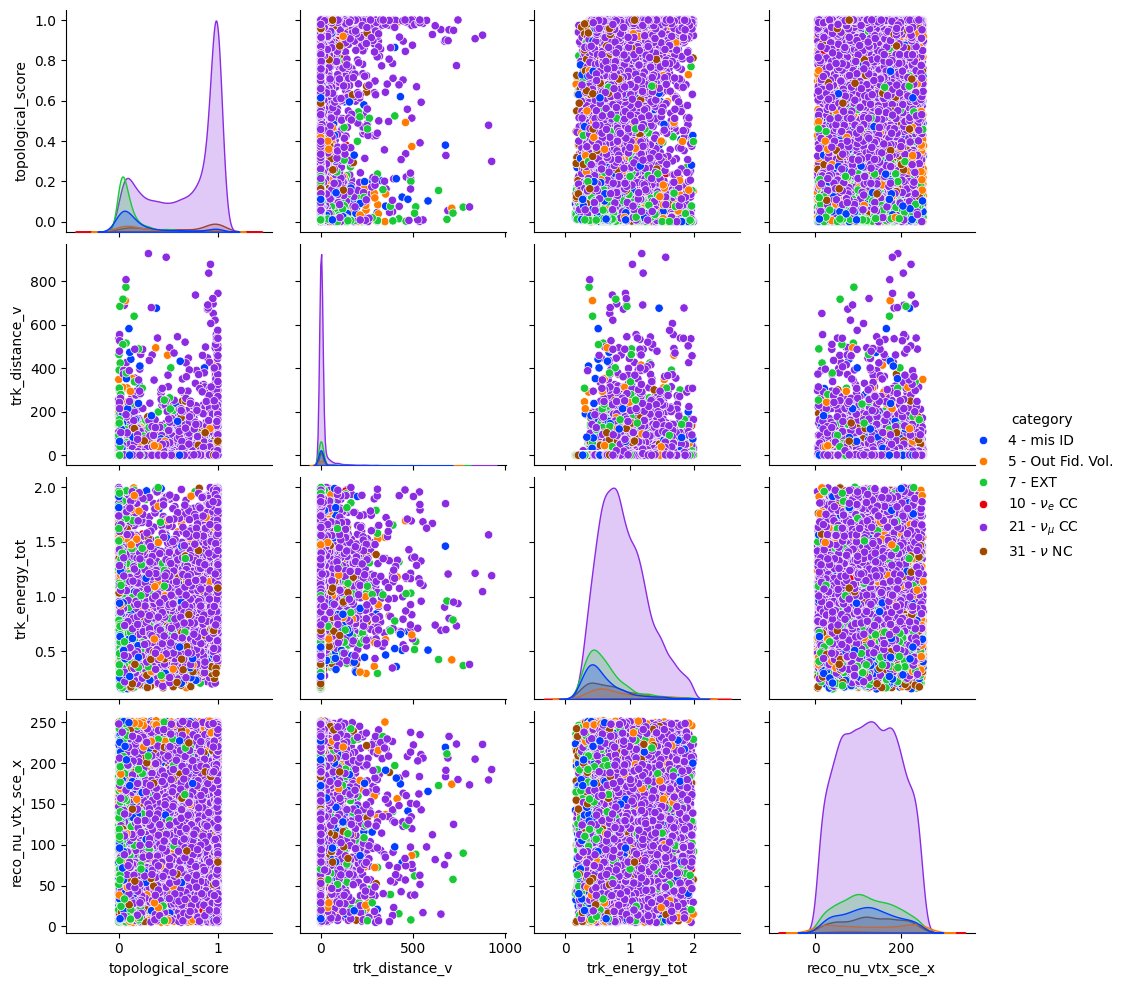

In [6]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text rather than number form 
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. 
# The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [7]:
# Create a deep copy of MC_EXT_VIS without signal events (For our purposes, signal event is muon neutrino event). This leaves us with only background events
MC_EXT_VIS_nosig = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.category == 21].index, inplace = False)

MC_EXT_VIS_nosig.reset_index(drop=True, inplace=True)

print("Length of new data sample: {}".format(len(MC_EXT_VIS_nosig)))
MC_EXT_VIS_nosig.head(10)

Length of new data sample: 3929


_closestNuCosmicDist   trk_len_v trk_distance_v  category  \
0             85.036165   33.348045       0.235975         4   
1              9.724892   18.600988      16.351896         7   
2            195.464176   23.359739        0.13886         7   
3              0.169353  144.632248       0.185822         4   
4            207.654641  184.990082       0.244048         7   
5            234.185086  101.343201       0.200465         7   
6            116.029363     8.56401     194.409103         4   
7              9.933378  163.127457       9.933378        31   
8            200.231211   47.942204       1.217178        31   
9             86.593410   86.183754       1.262974         7   

   topological_score trk_sce_end_z_v trk_sce_end_y_v trk_sce_end_x_v  \
0           0.129425      625.907593      -19.077028      170.482727   
1           0.004466        136.7314       -70.17012      153.839752   
2           0.048093       693.71283      106.217987      103.637283   
3           0.038446      269.900085     -106.740112        92.48175   
4           0.009143      978.436279       -6.894047      168.394989   
5           0.058863      207.967911       75.217842      219.048676   
6           0.070818     1036.566772       50.338562       36.598663   
7           0.118844      277.254211      116.184776      111.498215   
8           0.963986       90.625114       67.802391      112.648674   
9           0.074310        86.30761       86.584923      129.196777   

  trk_score_v trk_llr_pid_score_v trk_sce_start_z_v trk_sce_start_y_v  \
0    0.819816            0.732976         612.81134        -45.339184   
1    0.150174            0.558773        143.044266        -57.851242   
2     0.83541            0.461502        686.148926        100.493355   
3     0.99996            0.964352         243.66748         12.430734   
4         1.0            0.958967        935.519775        107.532333   
5    0.993325            0.930195        192.937103        -24.848579   
6         0.0            0.654266       1033.147949         52.991997   
7    0.999991            0.963858        248.423019        -39.826267   
8    0.989636            0.906585         43.477978         70.767029   
9    0.993478            0.926655         86.220985          4.274788   

  trk_sce_start_x_v  reco_nu_vtx_sce_x  reco_nu_vtx_sce_y  reco_nu_vtx_sce_z  \
0        185.956848         185.947144         -45.353241         612.576538   
1        165.568649         166.097031         -66.824951         157.402054   
2         82.600845          82.703888         100.571091         686.203613   
3        169.776108         169.725922          12.314316         243.815079   
4         29.974604          30.080032         107.315979         935.488464   
5         221.46489         221.469757         -25.002642         192.790619   
6         43.350025         160.758850         -59.128548         927.825623   
7        145.721771         148.304703         -49.109985         245.088211   
8        104.926743         104.771675          70.869118          42.276115   
9        105.629341         105.081009           3.087729          86.406731   

   trk_energy_tot trk_range_muon_mom_v trk_mcs_muon_mom_v    weight    true_E  \
0        0.369272             0.184279              0.181  0.158957  0.686085   
1        1.178125             0.142018                0.1  0.257732  1.000000   
2        0.188403             0.156431              0.119  0.257732  1.000000   
3        0.449956             0.437533           0.560996  0.158957  1.284471   
4        0.535747             0.525357           0.567996  0.257732  1.000000   
5        0.358726             0.343015           0.431998  0.257732  1.000000   
6        0.433986             0.104854              0.091  0.158957  1.371540   
7        1.175437             0.477738           0.426998  0.158957  3.575658   
8        0.553609              0.22112              0.279  0.158957  1.660286   
9        0

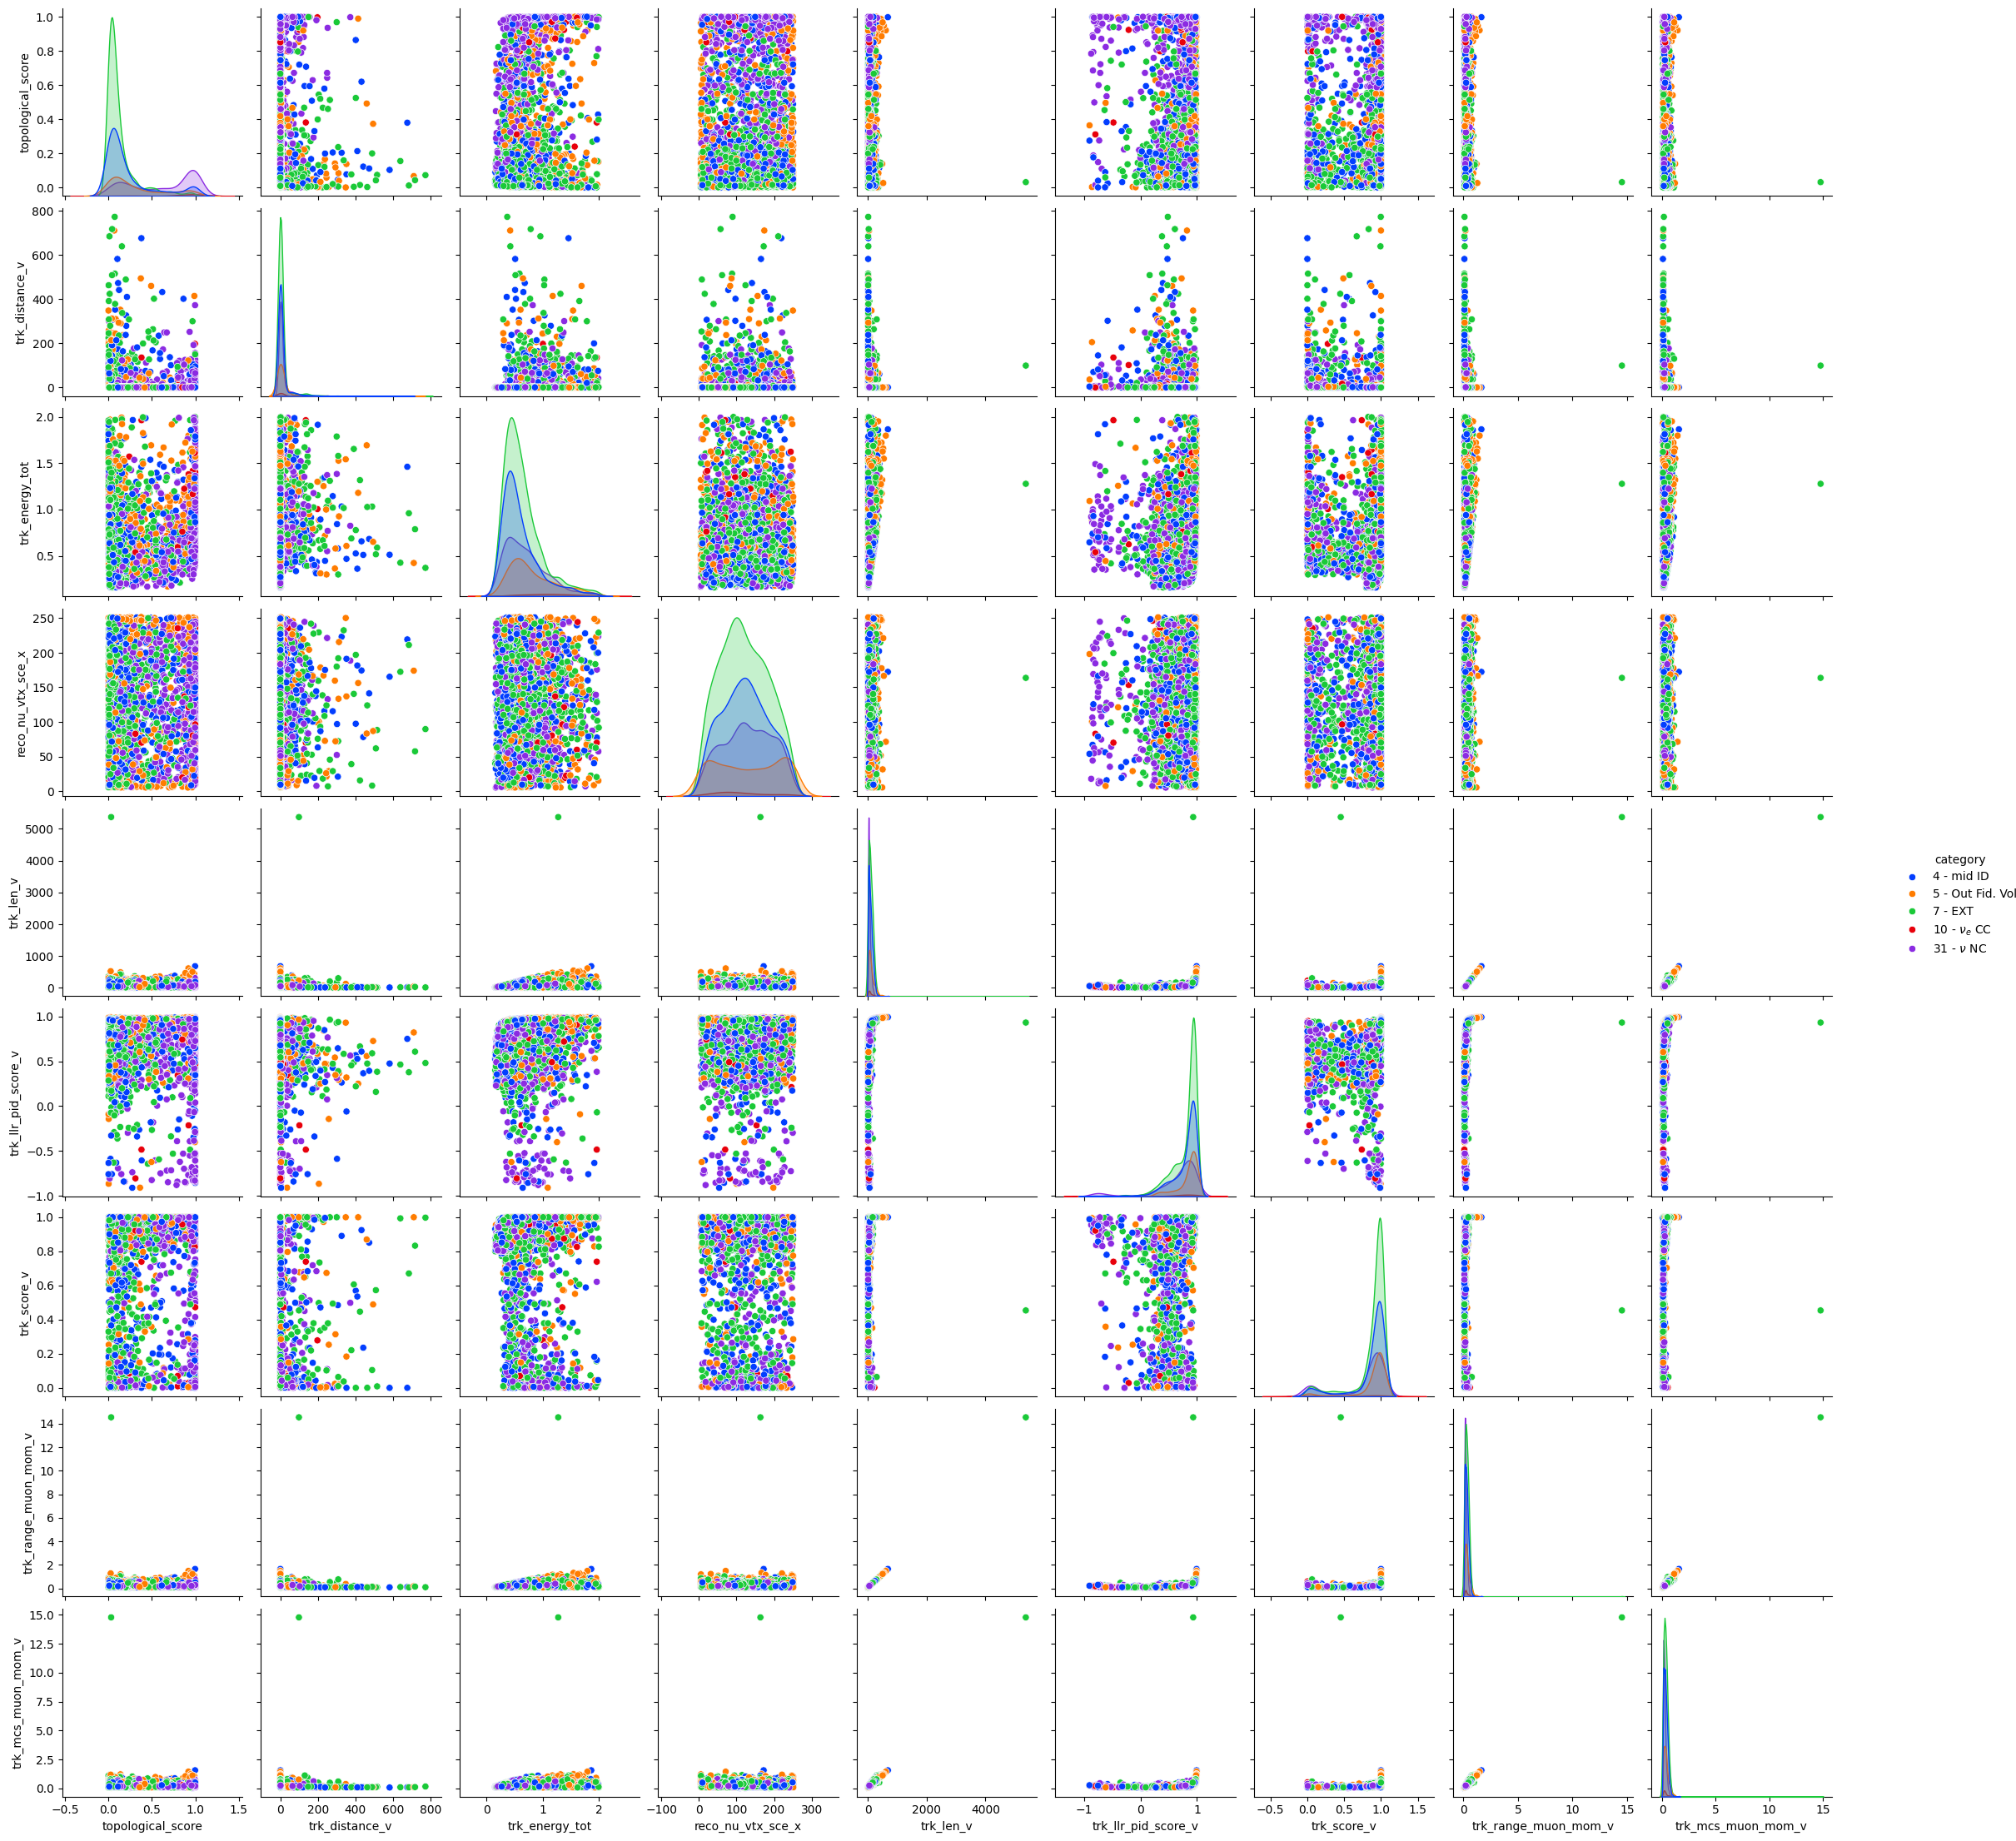

In [8]:
# Plotting the background events using sns.pairplot
variable_list_1 = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x', 'trk_len_v', 'trk_llr_pid_score_v', 'trk_score_v', 'trk_range_muon_mom_v', 'trk_mcs_muon_mom_v']

fig_nosig = sns.pairplot(MC_EXT_VIS_nosig[variable_list_1], hue = 'category', palette = 'bright')

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

fig_nosig._legend.set_bbox_to_anchor((1.05, 0.5))

for t, l in zip(fig_nosig._legend.texts, ptype_no_mu):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [9]:
# Make sure to delete dataframe copies if you no longer need them! This helps increase runtime of the entire code
del MC_EXT_VIS_nosig

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the scikit-learn package.

In [10]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True) # deep copies MC_EXT. This means we will not affect the original MC_EXT we modified

# Repeat same process as earlier and retain one-tenth of the sample 
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10)) 


# Remove muon neutrino and electron neutrino events.This is because they are too dominant in the dataset. 
# We will only focus on classifying the background events for now
MC_EXT_ML = MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 10].index, inplace = False)
MC_EXT_ML.reset_index(drop=True, inplace=True)
MC_EXT_ML = MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 21].index, inplace = False)
MC_EXT_ML.reset_index(drop=True, inplace=True)

#display(MC_EXT_ML)

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  31993


In [11]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print("(X) (y) shape:")
print(np.shape(X), np.shape(y))

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1) # 80/20 training/test split

# Print the shape, should now be 
print("\n(x_train) (y_train) shape: ")
print(np.shape(x_train), np.shape(y_train))


(X) (y) shape:
(31993, 16) (31993,)

(x_train) (y_train) shape: 
(25594, 16) (25594,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [12]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=8, random_state=1)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

Test the accuracies of your results:

In [13]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.6592560756427288
Accuracy on testing dataset: 0.6505704016252539


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

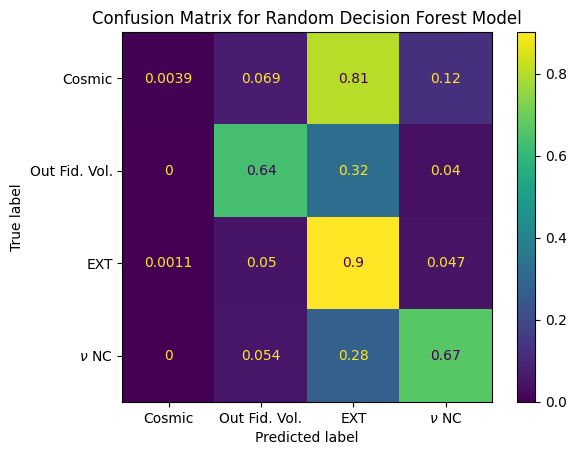

In [14]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
cm = confusion_matrix( y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.title("Confusion Matrix for Random Decision Forest Model")
plt.show()

Plot the importance of your different parameters.

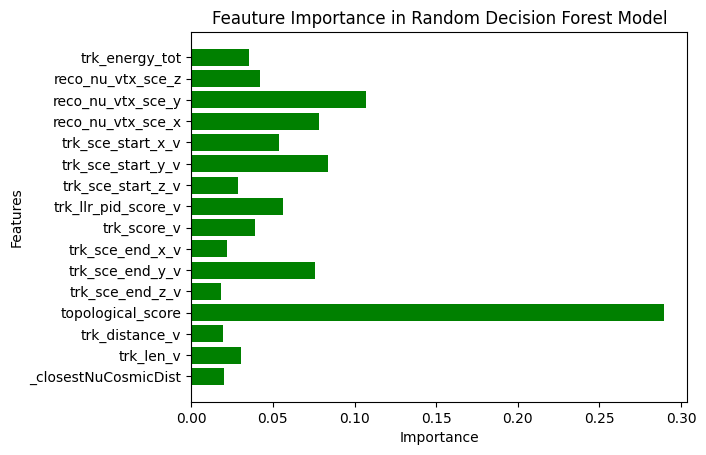

In [25]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance, color = "g")
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feauture Importance in Random Decision Forest Model")
plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [16]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [17]:
def Selections(frame):
    
    # Basic variables present in dataframe 
    trk_sce_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_sce_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_sce_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_sce_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_sce_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_sce_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_nu_vtx_sce_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_nu_vtx_sce_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_nu_vtx_sce_z = frame['reco_nu_vtx_sce_z']               # cm
    topological_score = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_distance_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    trk_llr_pid_score_v = frame['trk_llr_pid_score_v']
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    trk_sce_start_x_v_selection = ((trk_sce_start_x_v > 5) & (trk_sce_start_x_v < 250))
    trk_sce_start_y_v_selection = ((trk_sce_start_y_v > -110) & (trk_sce_start_y_v < 110))
    trk_sce_start_z_v_selection = ((trk_sce_start_z_v > 30) & (trk_sce_start_z_v < 990))
    trk_sce_end_x_v_selection = ((trk_sce_end_x_v > 0) & (trk_sce_end_x_v < 250))
    trk_sce_end_y_v_selection = ((trk_sce_end_y_v > -120) & (trk_sce_end_y_v < 110))
    trk_sce_end_z_v_selection = ((trk_sce_end_z_v > 10) & (trk_sce_end_z_v < 1030))
    trk_distance_v_selection = (trk_distance_v < 10)
    reco_nu_vtx_sce_x_selection = ((reco_nu_vtx_sce_x > 5) & (reco_nu_vtx_sce_x < 250))
    reco_nu_vtx_sce_y_selection = ((reco_nu_vtx_sce_y > -110) & (reco_nu_vtx_sce_y < 105))
    reco_nu_vtx_sce_z_selection = ((reco_nu_vtx_sce_z > 30) & (reco_nu_vtx_sce_z < 980))
    trk_len_v_selection =  ((trk_len_v > 0) & (trk_len_v < 1037))
    trk_score_v_selection = (trk_score_v > 0)
    topological_score_selection = (topological_score > 0.4)
    trk_llr_pid_score_v_selection = (trk_llr_pid_score_v > -1)
    trk_energy_tot_selection = (trk_energy_tot < 2)
    
    
    # Apply selection on dataframe
    frame = frame[trk_energy_tot_selection]

    total_events = len(frame.index)
    muon_total_events = len(frame[frame['category']==21].index)

    frame = frame[topological_score_selection]
    topological_score_events = len(frame.index)
    muon_topological_score_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_start_x_v_selection]
    #trk_sce_start_x_v_events = len(frame.index)
    #muon_trk_sce_start_x_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_start_y_v_selection]
    #trk_sce_start_y_v_events = len(frame.index)
    #muon_trk_sce_start_y_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_start_z_v_selection]
    #trk_sce_start_z_v_events = len(frame.index)
    #muon_trk_sce_start_z_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_end_x_v_selection]
    #trk_sce_end_x_v_events = len(frame.index)
    #muon_trk_sce_end_x_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_end_y_v_selection]
    #trk_sce_end_y_v_events = len(frame.index)
    #muon_trk_sce_end_y_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_sce_end_z_v_selection]
    #trk_sce_end_z_v_events = len(frame.index)
    #muon_trk_sce_end_z_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_distance_v_selection]
    #trk_distance_v_events = len(frame.index)
    #muon_trk_distance_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[reco_nu_vtx_sce_x_selection]
    #reco_nu_vtx_sce_x_events = len(frame.index)
    #muon_reco_nu_vtx_sce_x_events = len(frame[frame['category']==21].index)
    
    #frame = frame[reco_nu_vtx_sce_y_selection]
    #reco_nu_vtx_sce_y_events = len(frame.index)
    #muon_reco_nu_vtx_sce_y_events = len(frame[frame['category']==21].index)
    
    #frame = frame[reco_nu_vtx_sce_z_selection]
    #reco_nu_vtx_sce_z_events = len(frame.index)
    #muon_reco_nu_vtx_sce_z_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_len_v_selection]
    #trk_len_v_events = len(frame.index)
    #muon_trk_len_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_score_v_selection]
    #trk_score_v_events = len(frame.index)
    #muon_trk_score_v_events = len(frame[frame['category']==21].index)
    
    #frame = frame[trk_llr_pid_score_v_selection]
    #trk_llr_pid_score_v_events = len(frame.index)
    #muon_trk_llr_pid_score_v_events = len(frame[frame['category']==21].index)

    events = [total_events, topological_score_events]
#trk_sce_start_x_v_events, trk_sce_start_y_v_events, trk_sce_start_z_v_events, trk_sce_end_x_v_events, 
 #             trk_sce_end_y_v_events, trk_sce_end_z_v_events, trk_distance_v_events, reco_nu_vtx_sce_x_events, reco_nu_vtx_sce_y_events,
  #            reco_nu_vtx_sce_z_events, trk_len_v_events, trk_score_v_events, trk_llr_pid_score_v_events]
    muon_events = [muon_total_events, muon_topological_score_events]
#muon_trk_sce_start_x_v_events, muon_trk_sce_start_y_v_events, muon_trk_sce_start_z_v_events, muon_trk_sce_end_x_v_events, 
 #             muon_trk_sce_end_y_v_events, muon_trk_sce_end_z_v_events, muon_trk_distance_v_events, muon_reco_nu_vtx_sce_x_events, muon_reco_nu_vtx_sce_y_events,
  #            muon_reco_nu_vtx_sce_z_events, muon_trk_len_v_events, muon_trk_score_v_events, muon_trk_llr_pid_score_v_events]
    
    return frame, events, muon_events

## Calls the selection function on the dataframes

In [18]:
selections = Selections(MC_EXT)
MC_EXT_cuts = selections[0]
data_frame = Selections(data)[0]

events = np.array(selections[1])
print(events)
muon_events = np.array(selections[2])
efficiency = events/events[0]
purity = muon_events/events
print(efficiency)
print(purity)

C:\Users\louis\AppData\Local\Temp\ipykernel_11008\2357477364.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[topological_score_selection]


[144211  87588]
[1.         0.60736005]
[0.72869615 0.88307759]


C:\Users\louis\AppData\Local\Temp\ipykernel_11008\2357477364.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[topological_score_selection]


In [19]:
selections = Selections(MC_EXT)
MC_EXT_cuts = selections[0]
data_frame = Selections(data)[0]

events = np.array(selections[1])
print(events)
muon_events = np.array(selections[2])
efficiency = events/events[0]
purity = muon_events/events
print(efficiency)
print(purity)

C:\Users\louis\AppData\Local\Temp\ipykernel_11008\2357477364.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[topological_score_selection]


[144211  87588]
[1.         0.60736005]
[0.72869615 0.88307759]


C:\Users\louis\AppData\Local\Temp\ipykernel_11008\2357477364.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[topological_score_selection]


# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [20]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT_cuts)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_distance_v', 'trk_len_v', 'trk_sce_end_z_v', 'trk_sce_end_x_v', 'trk_llr_pid_score_v', 'trk_score_v', 'trk_sce_start_y_v', 'trk_range_muon_mom_v', 'reco_nu_vtx_sce_y', 'trk_mcs_muon_mom_v', 'reco_nu_vtx_sce_z', 'trk_sce_end_y_v', 'topological_score', '_closestNuCosmicDist', 'trk_sce_start_z_v', 'trk_sce_start_x_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x', 'category']


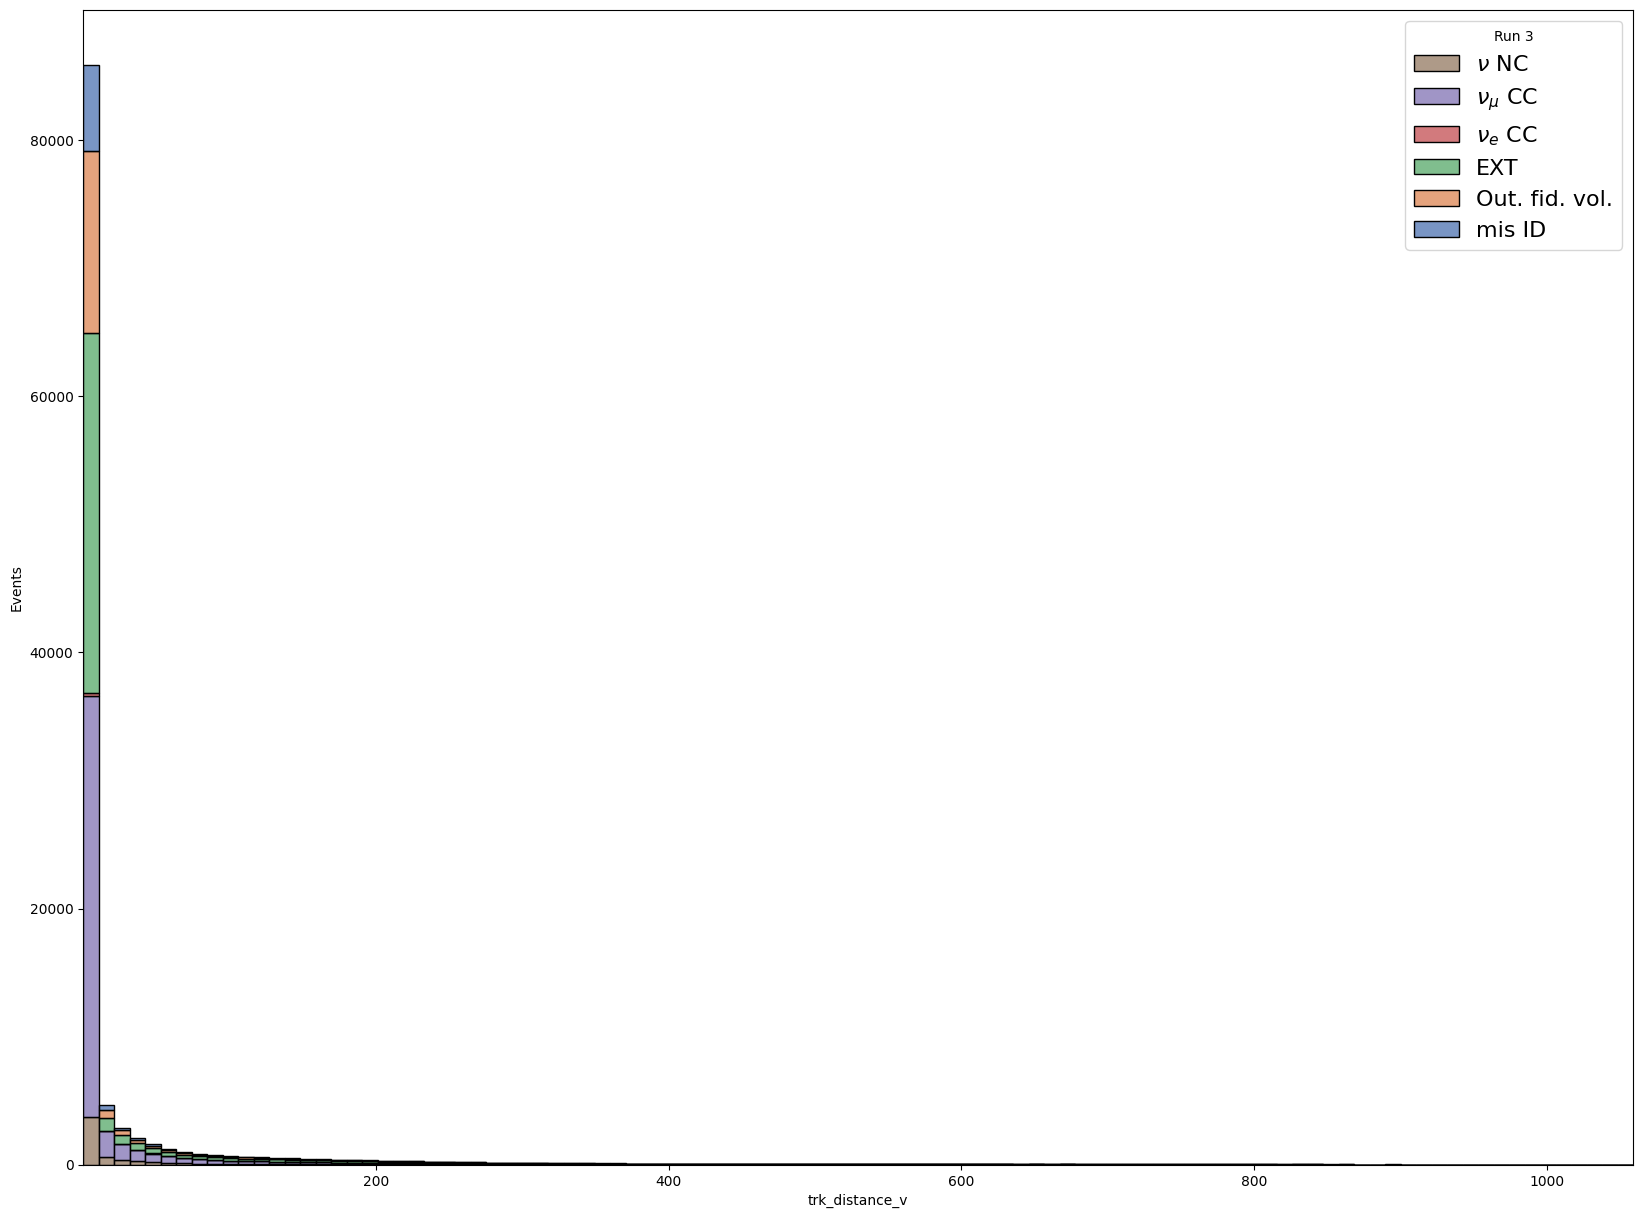

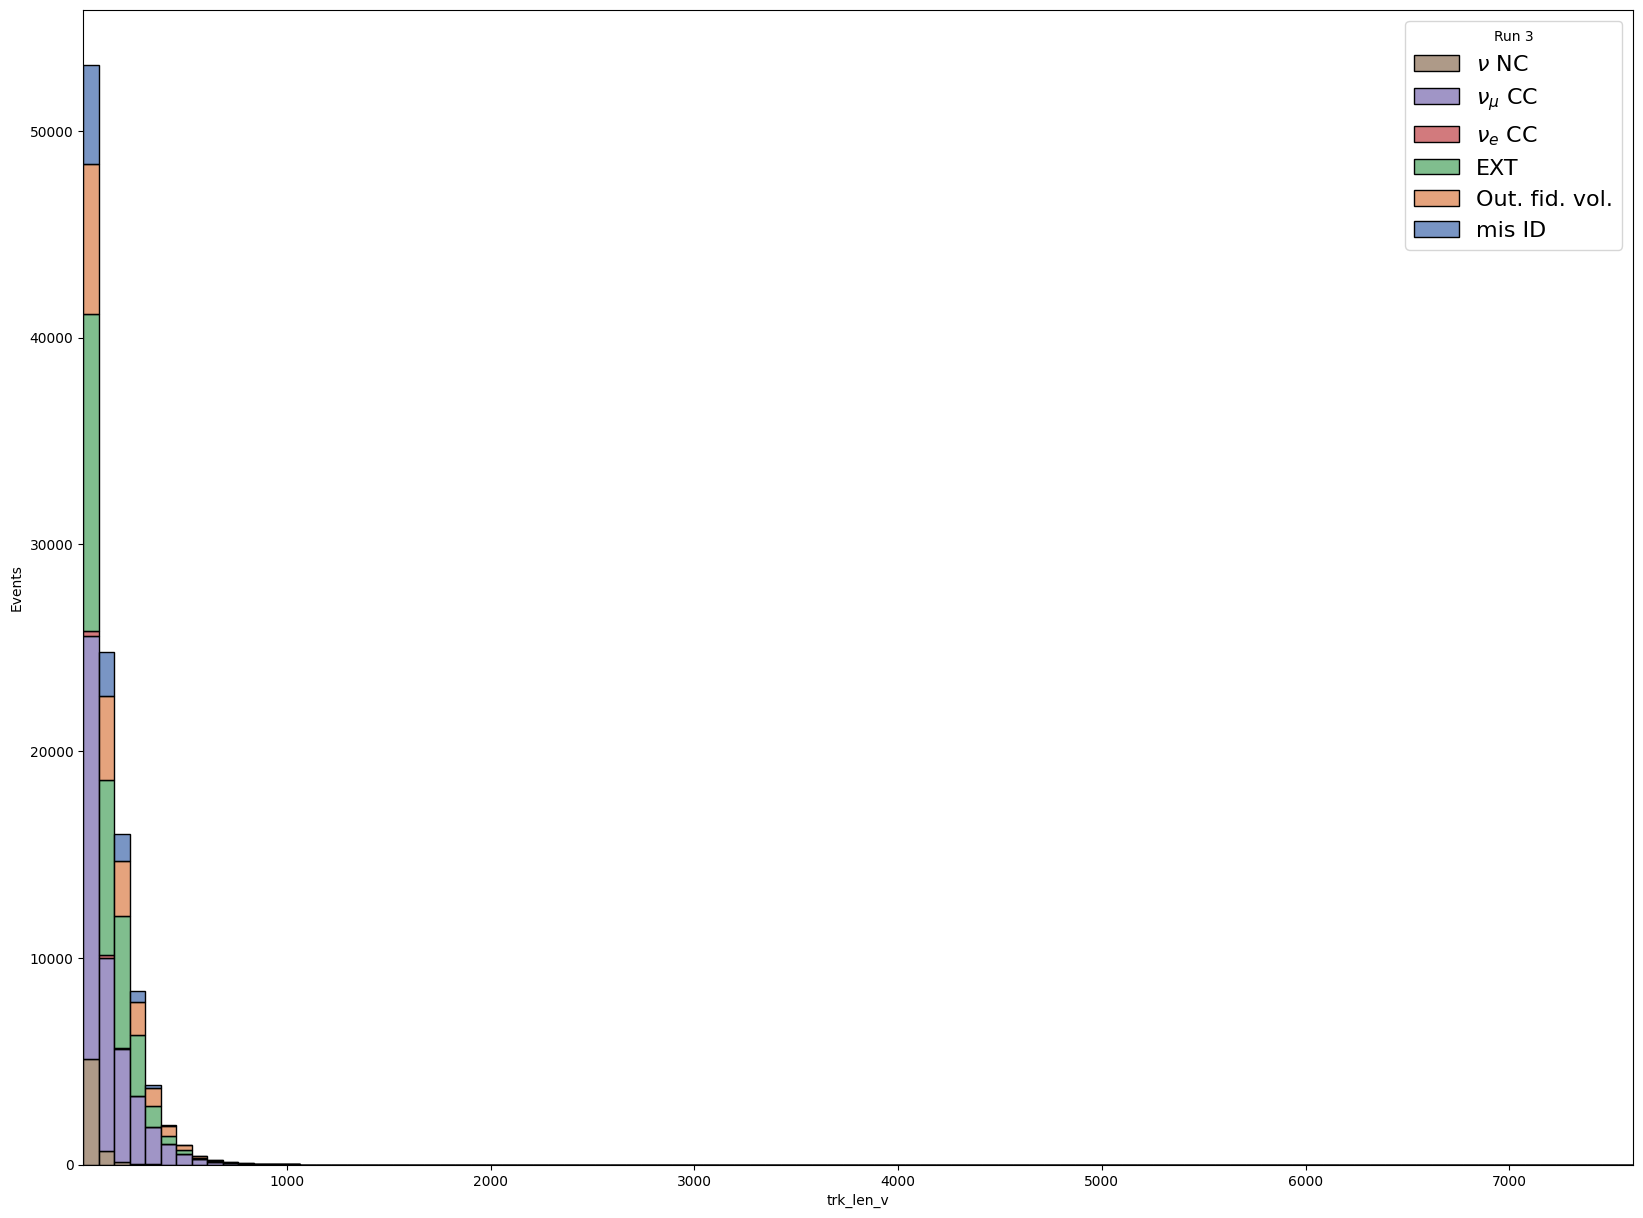

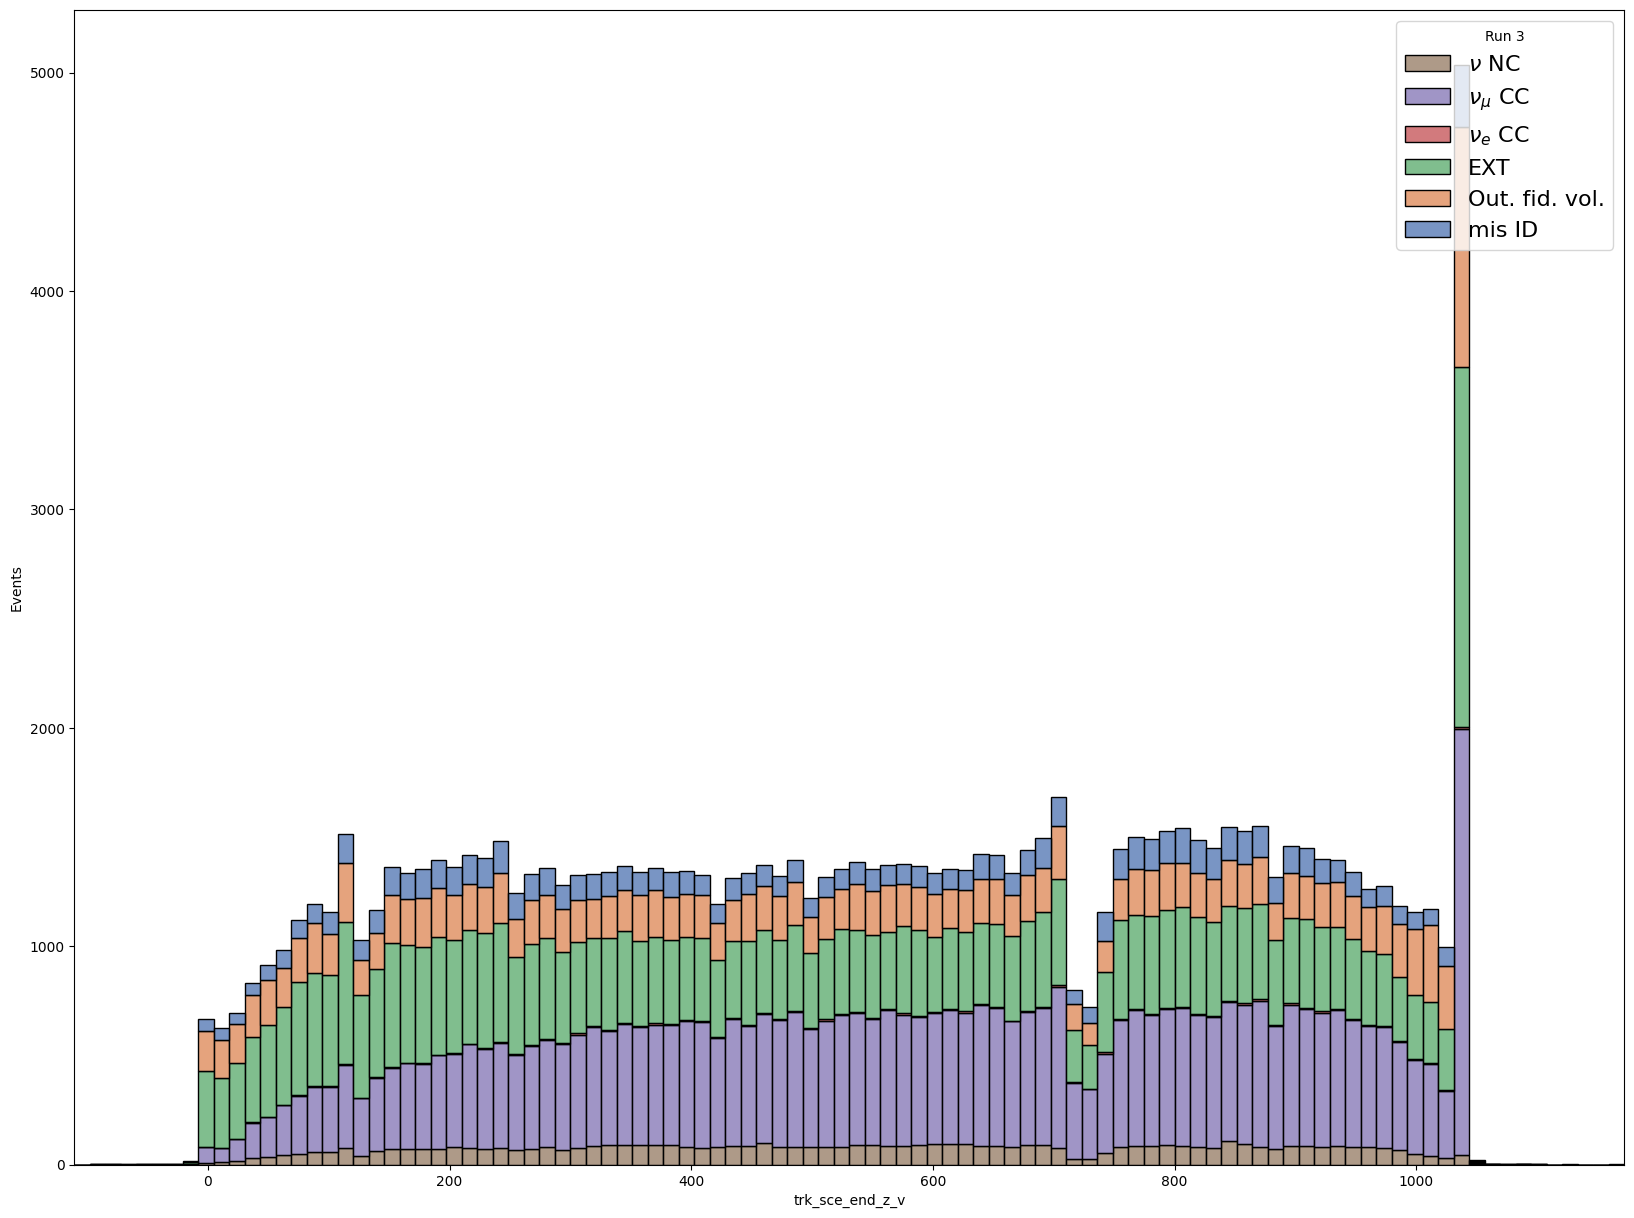

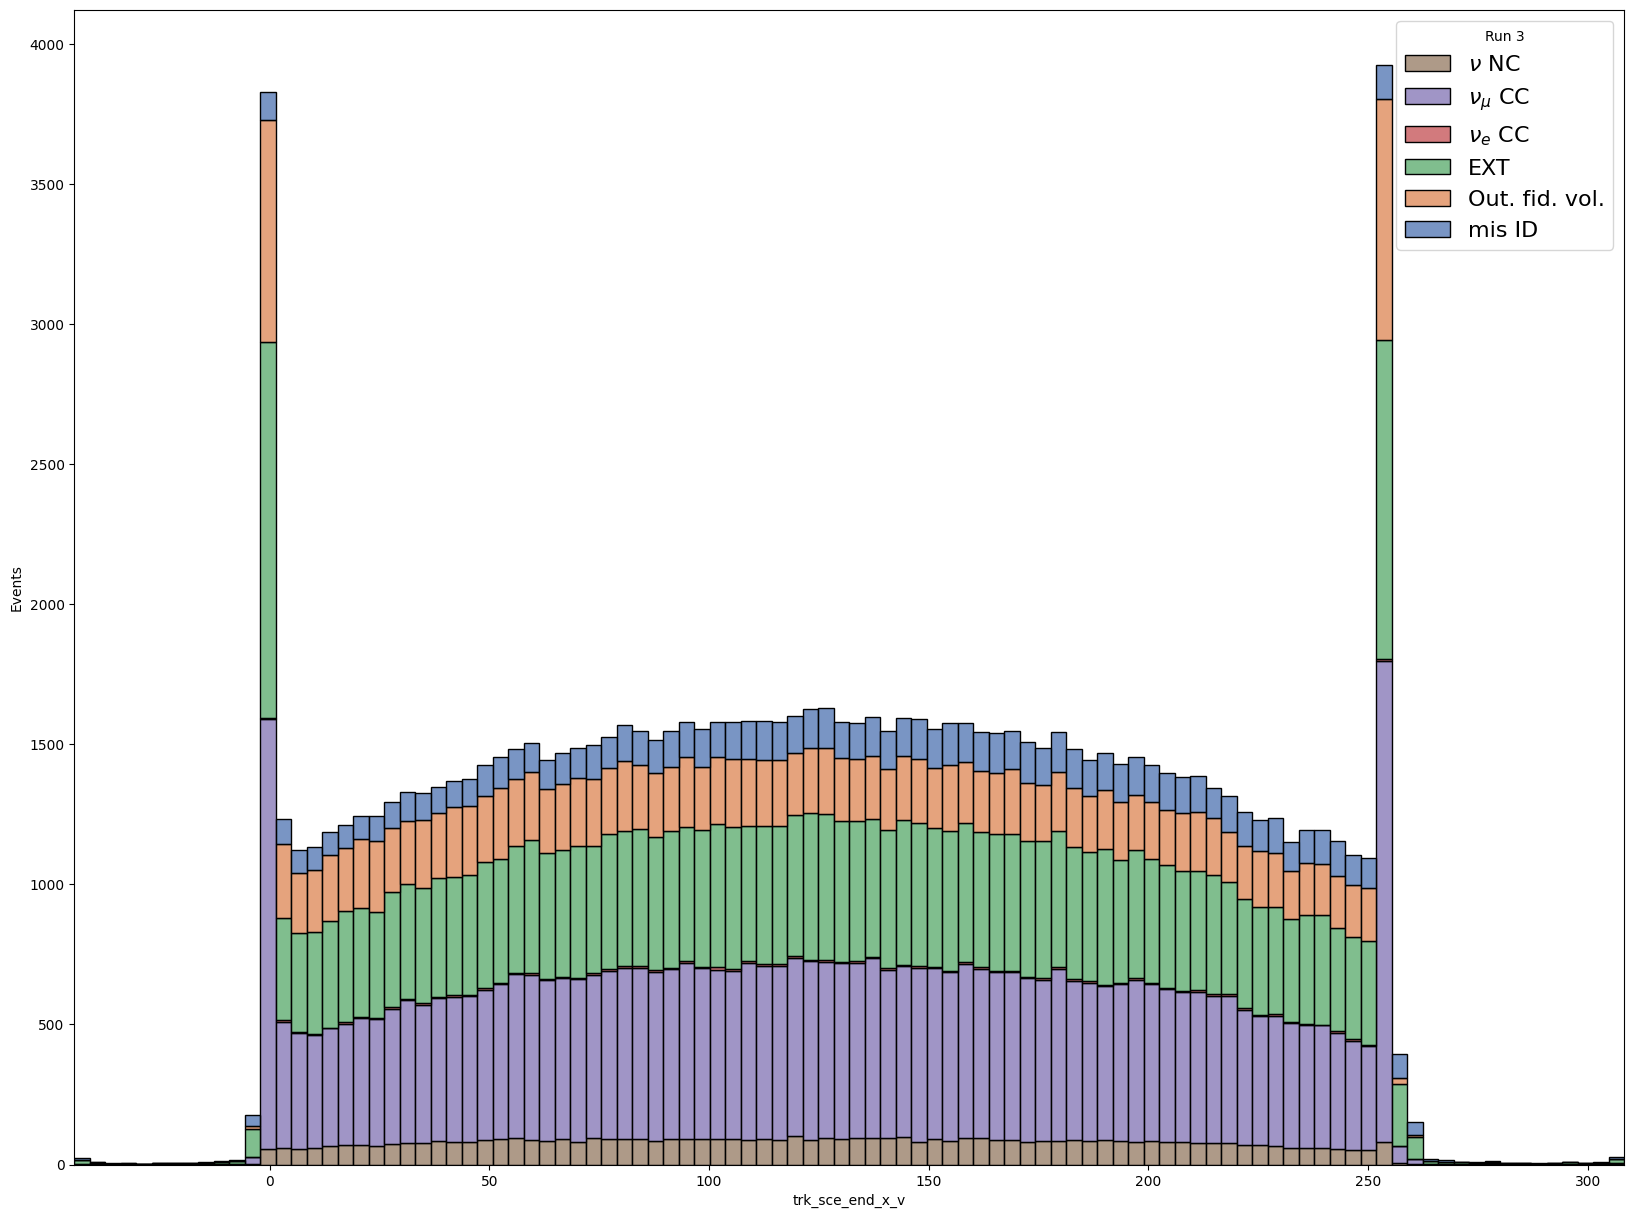

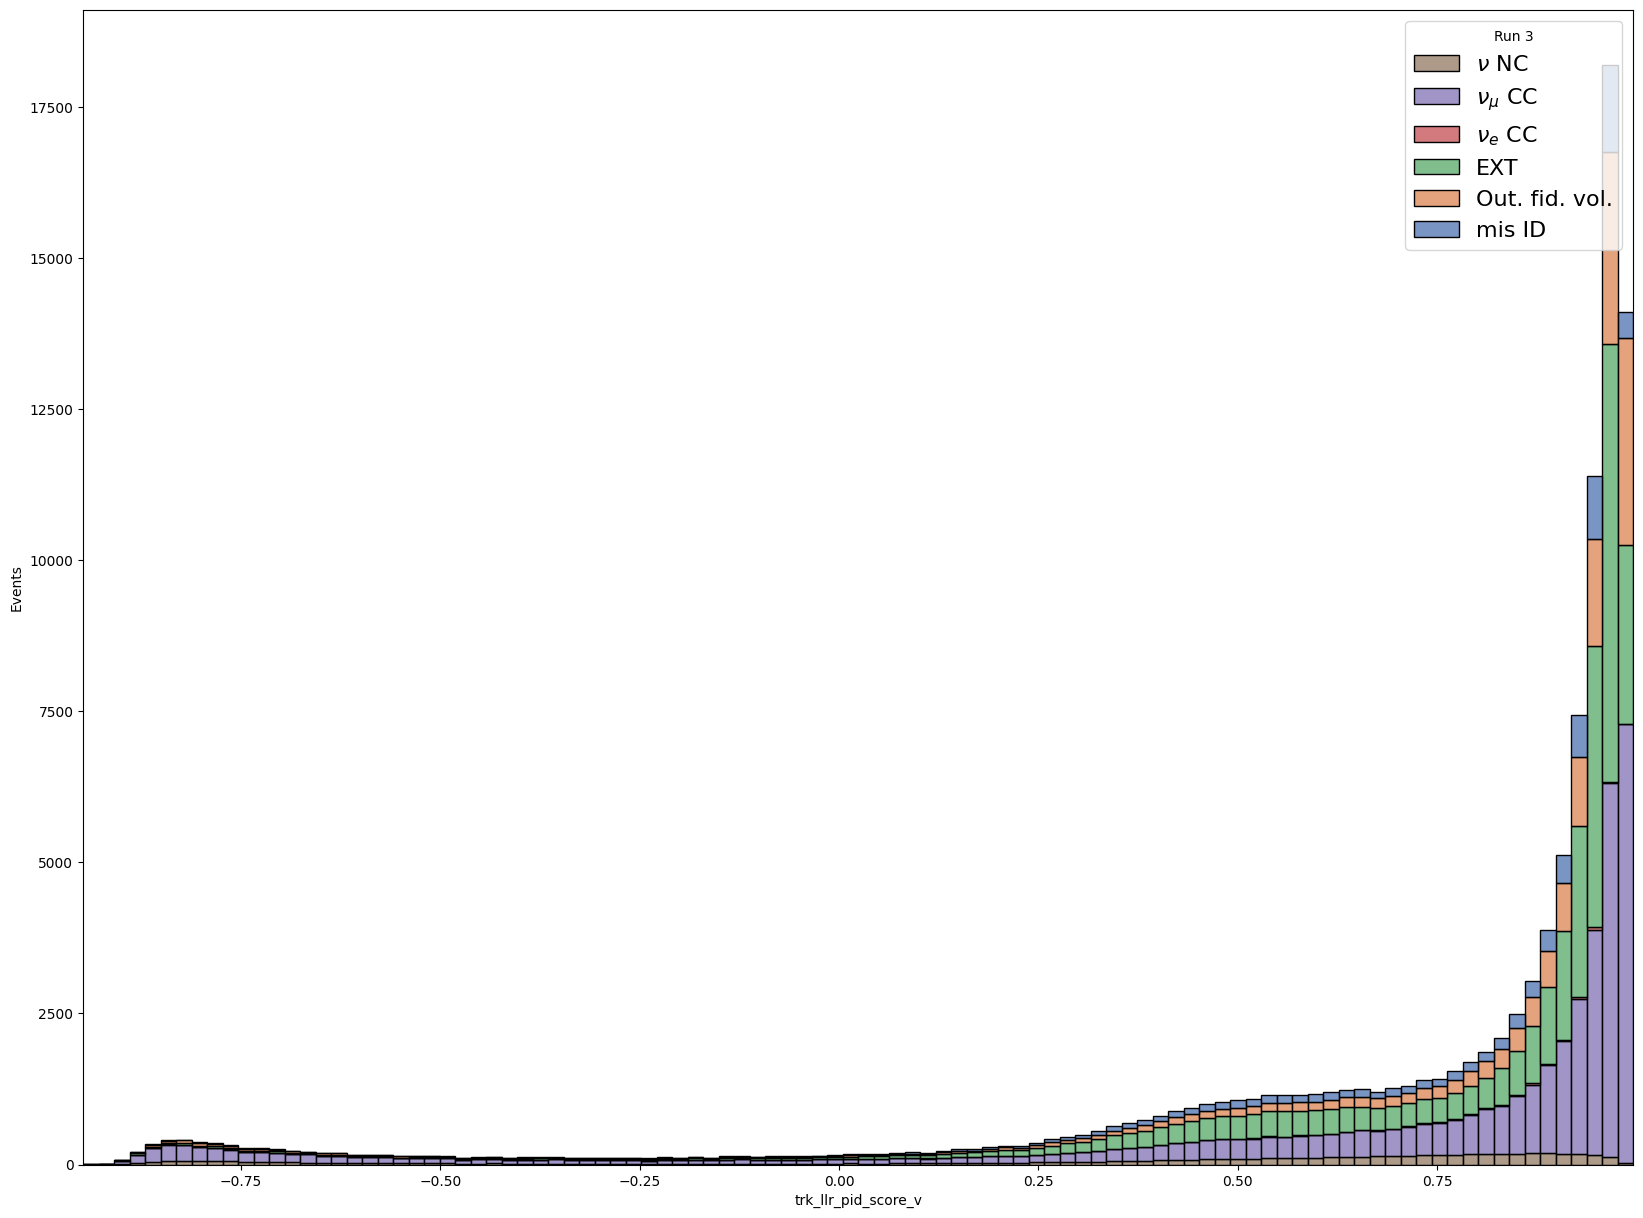

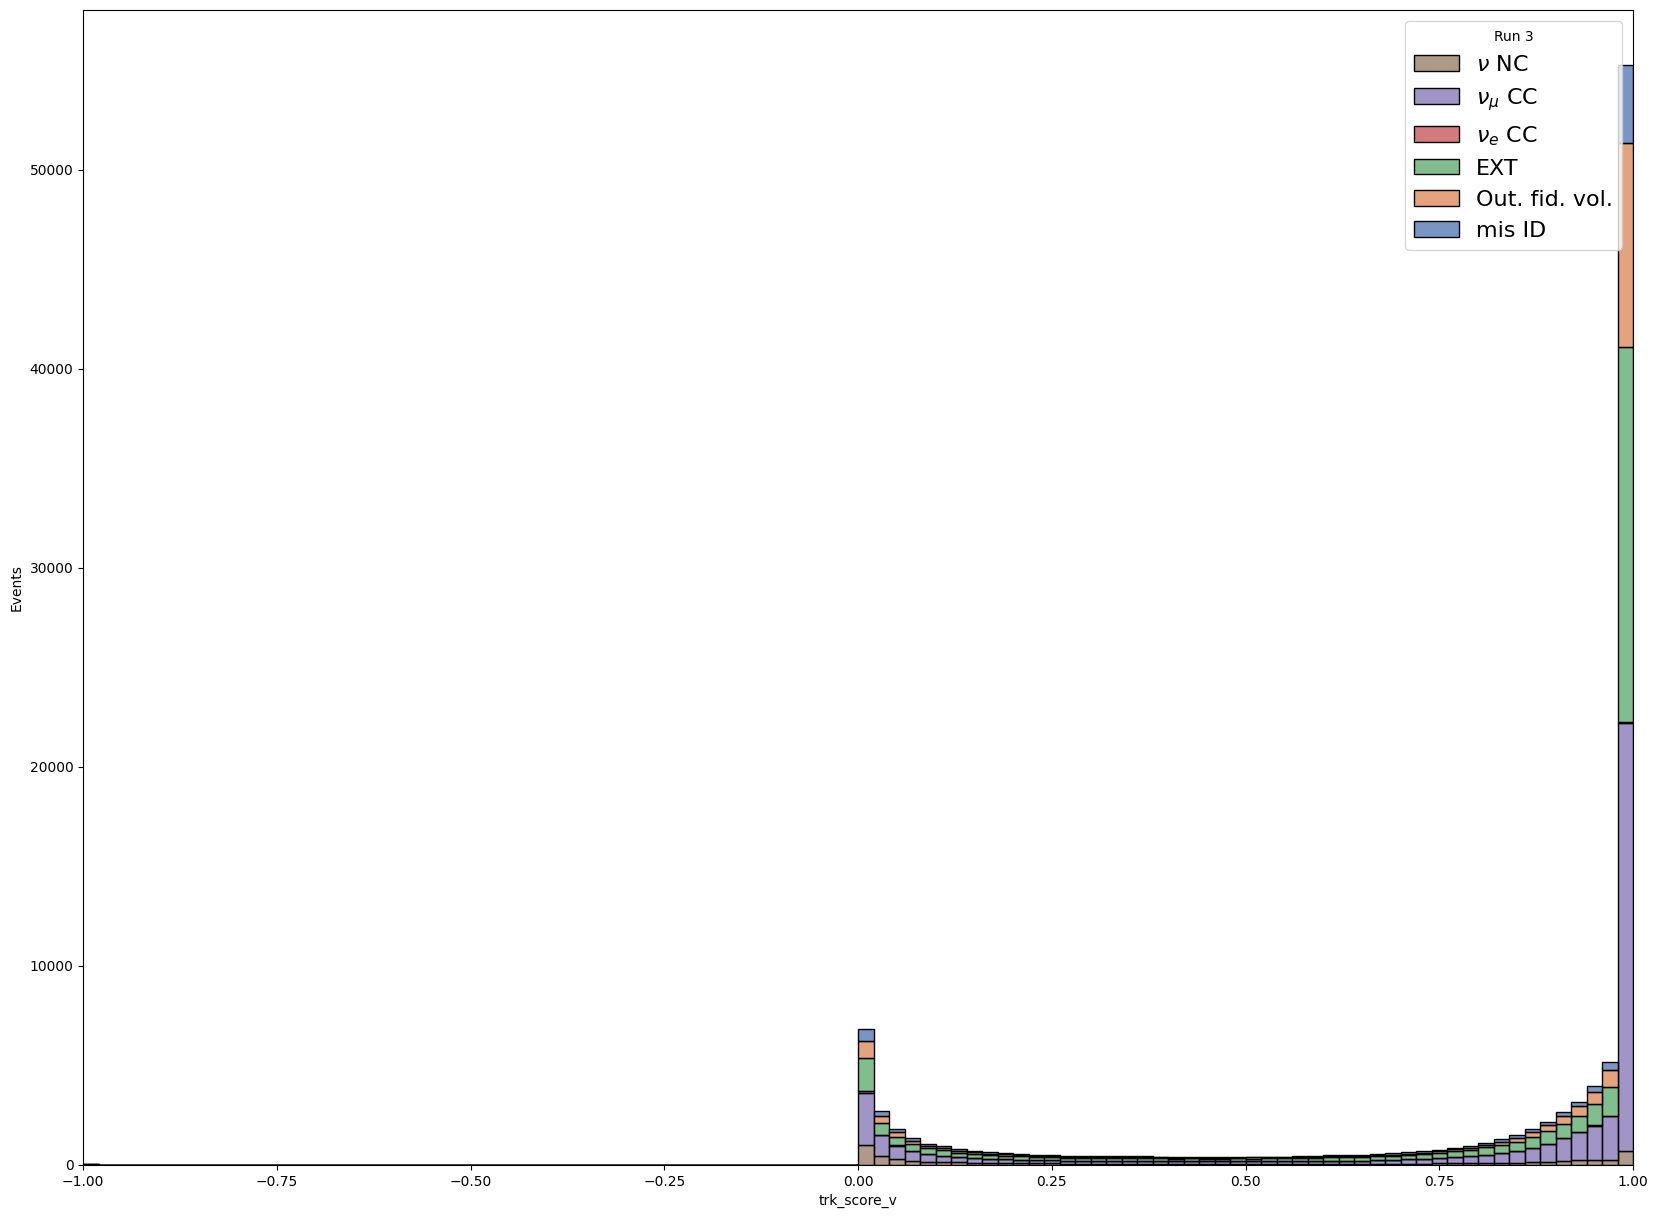

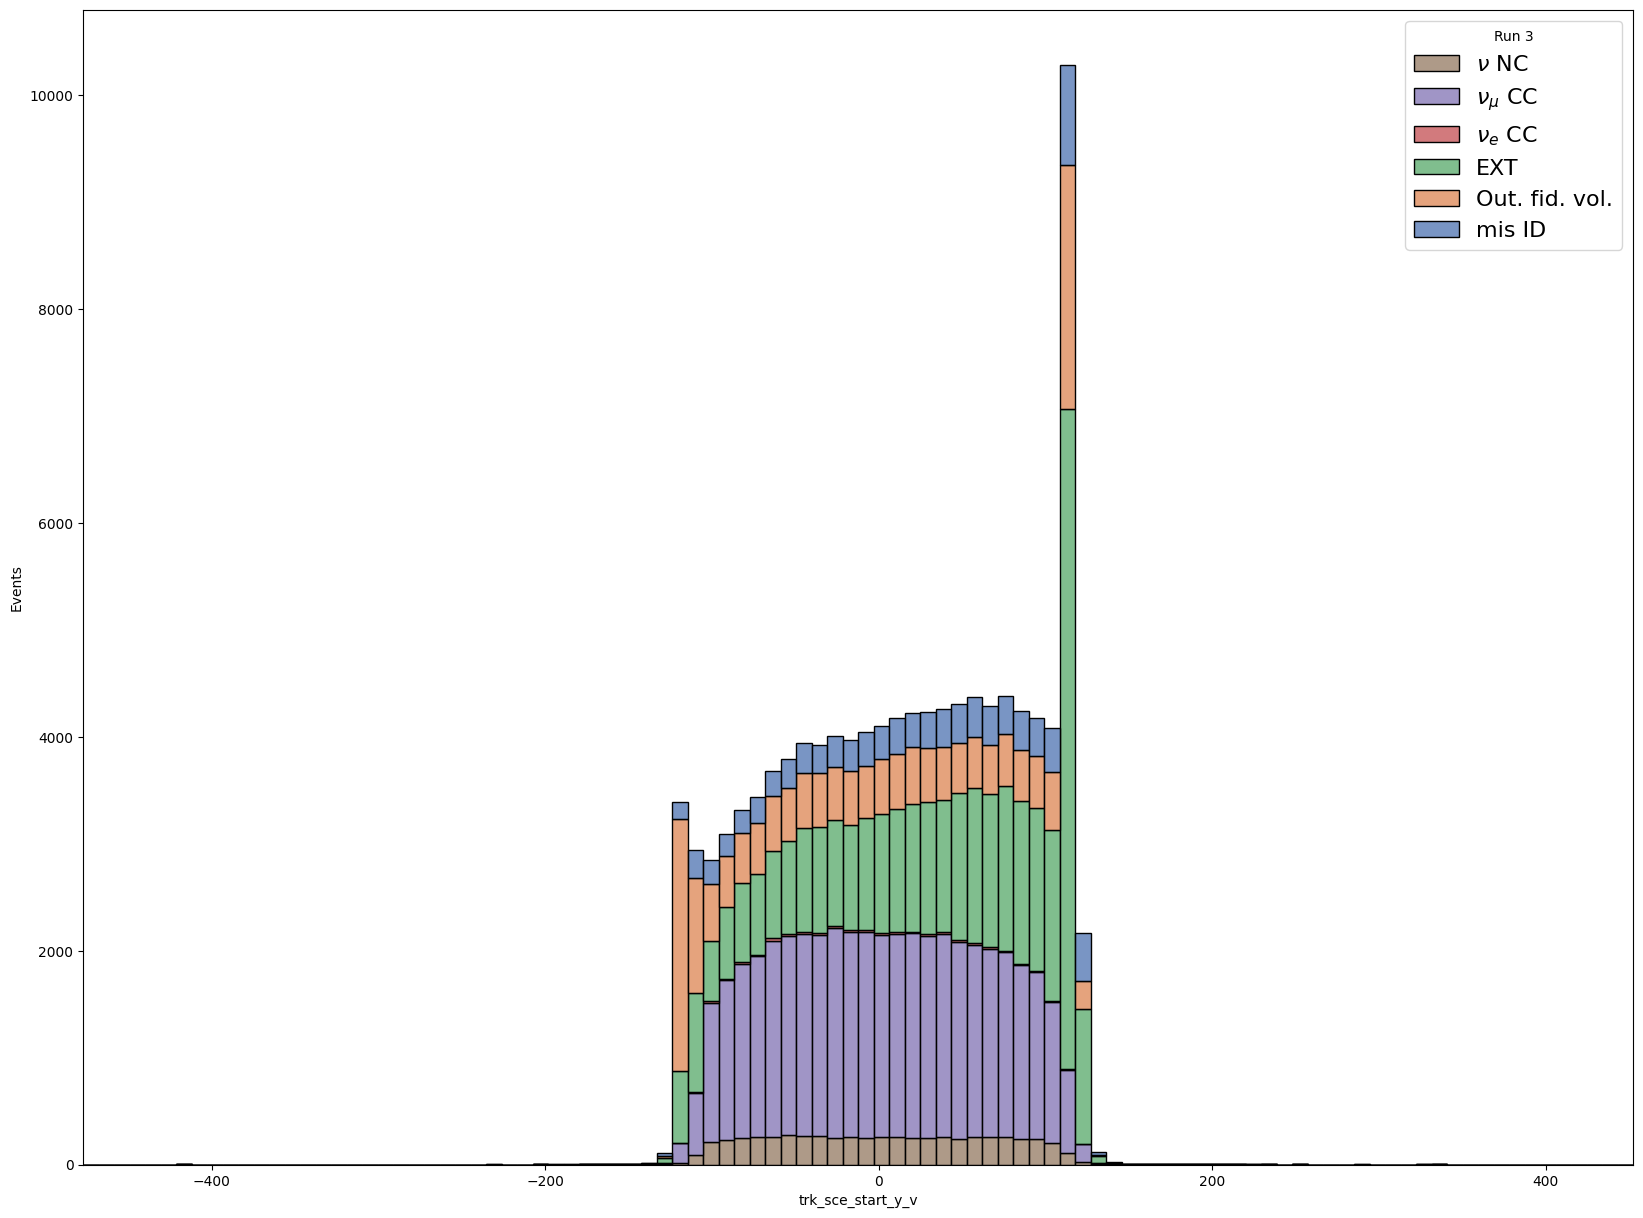

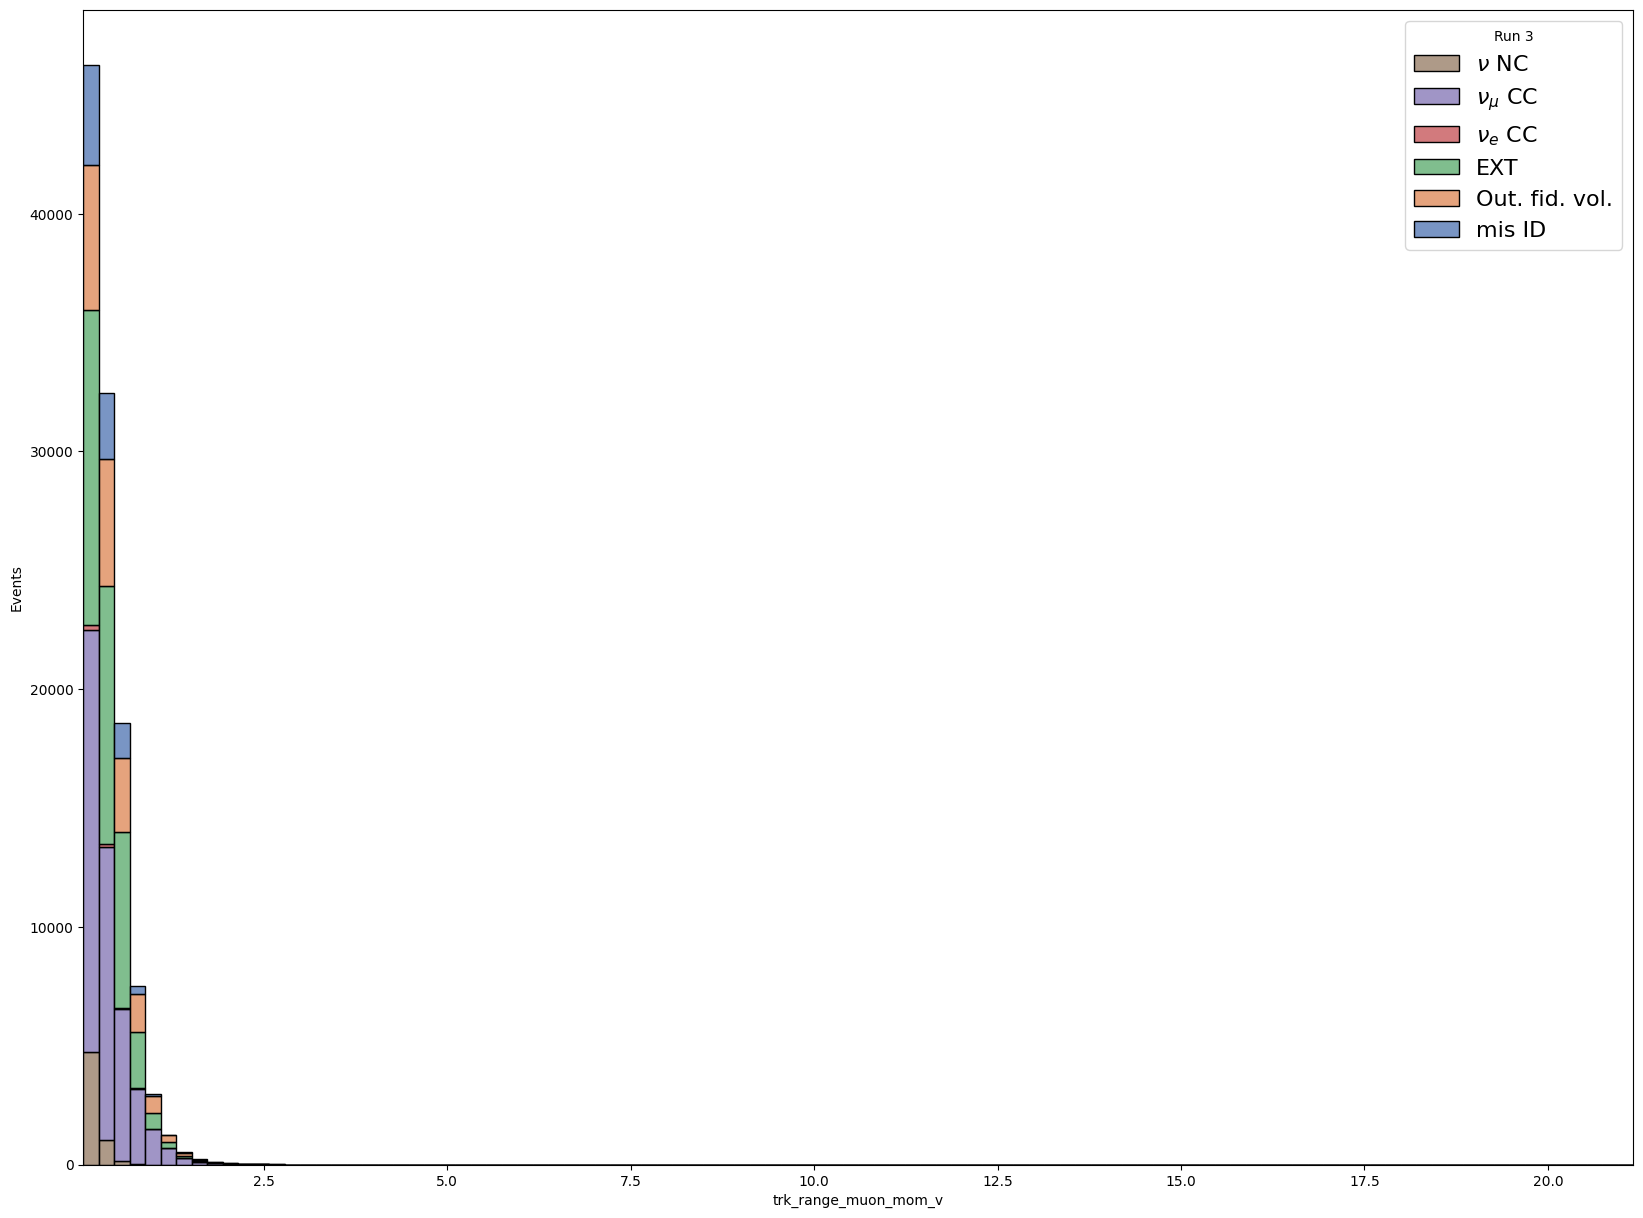

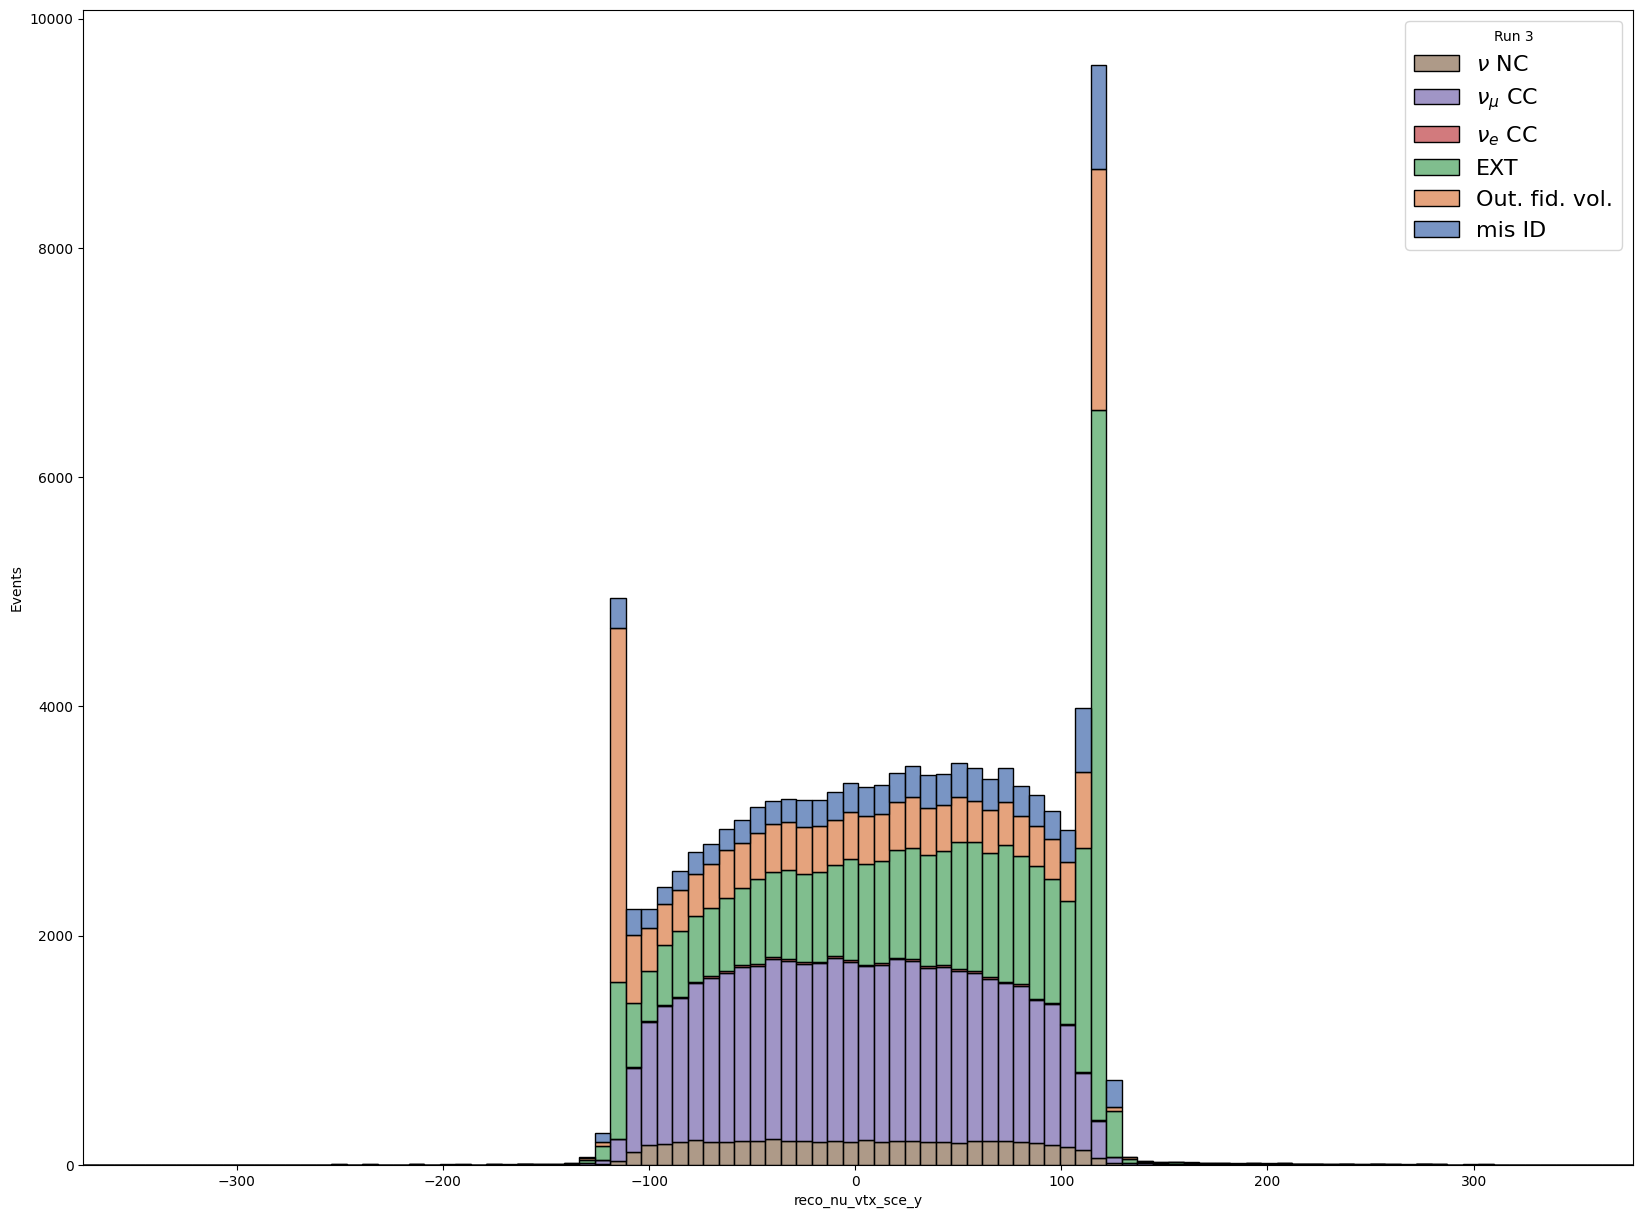

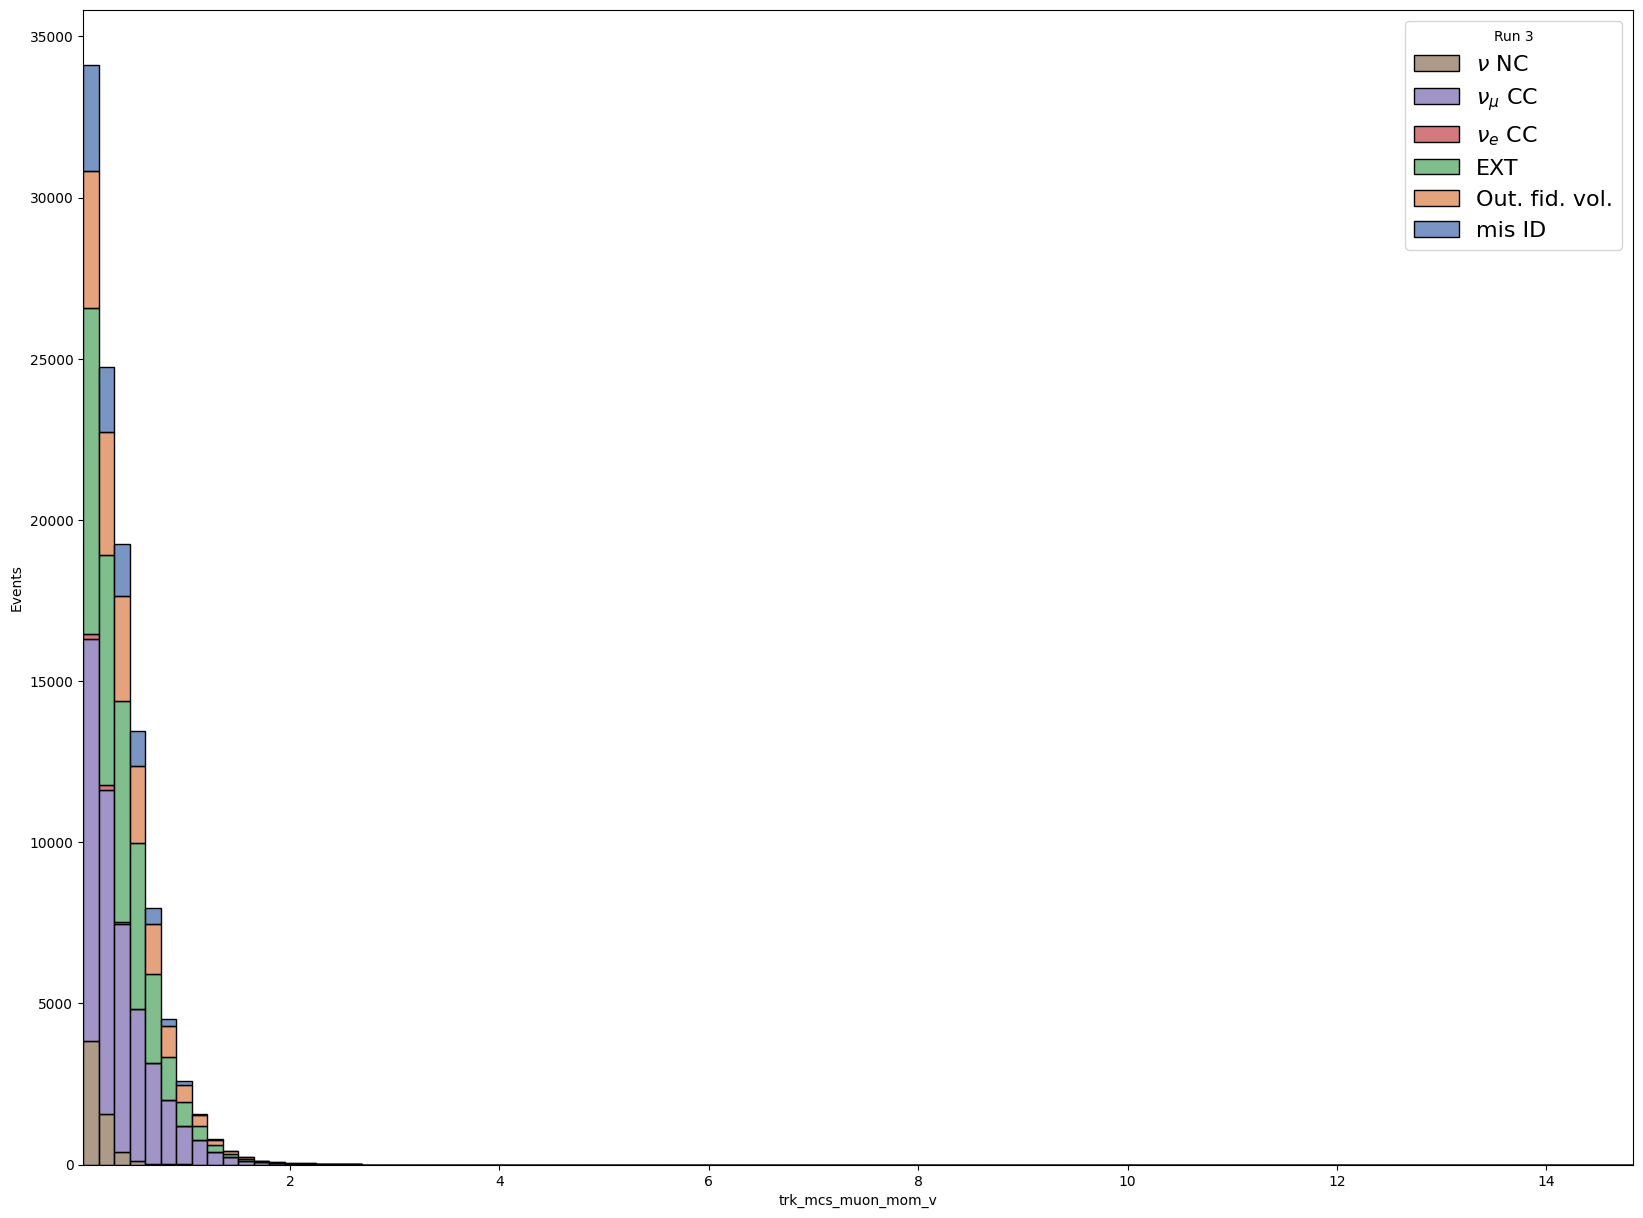

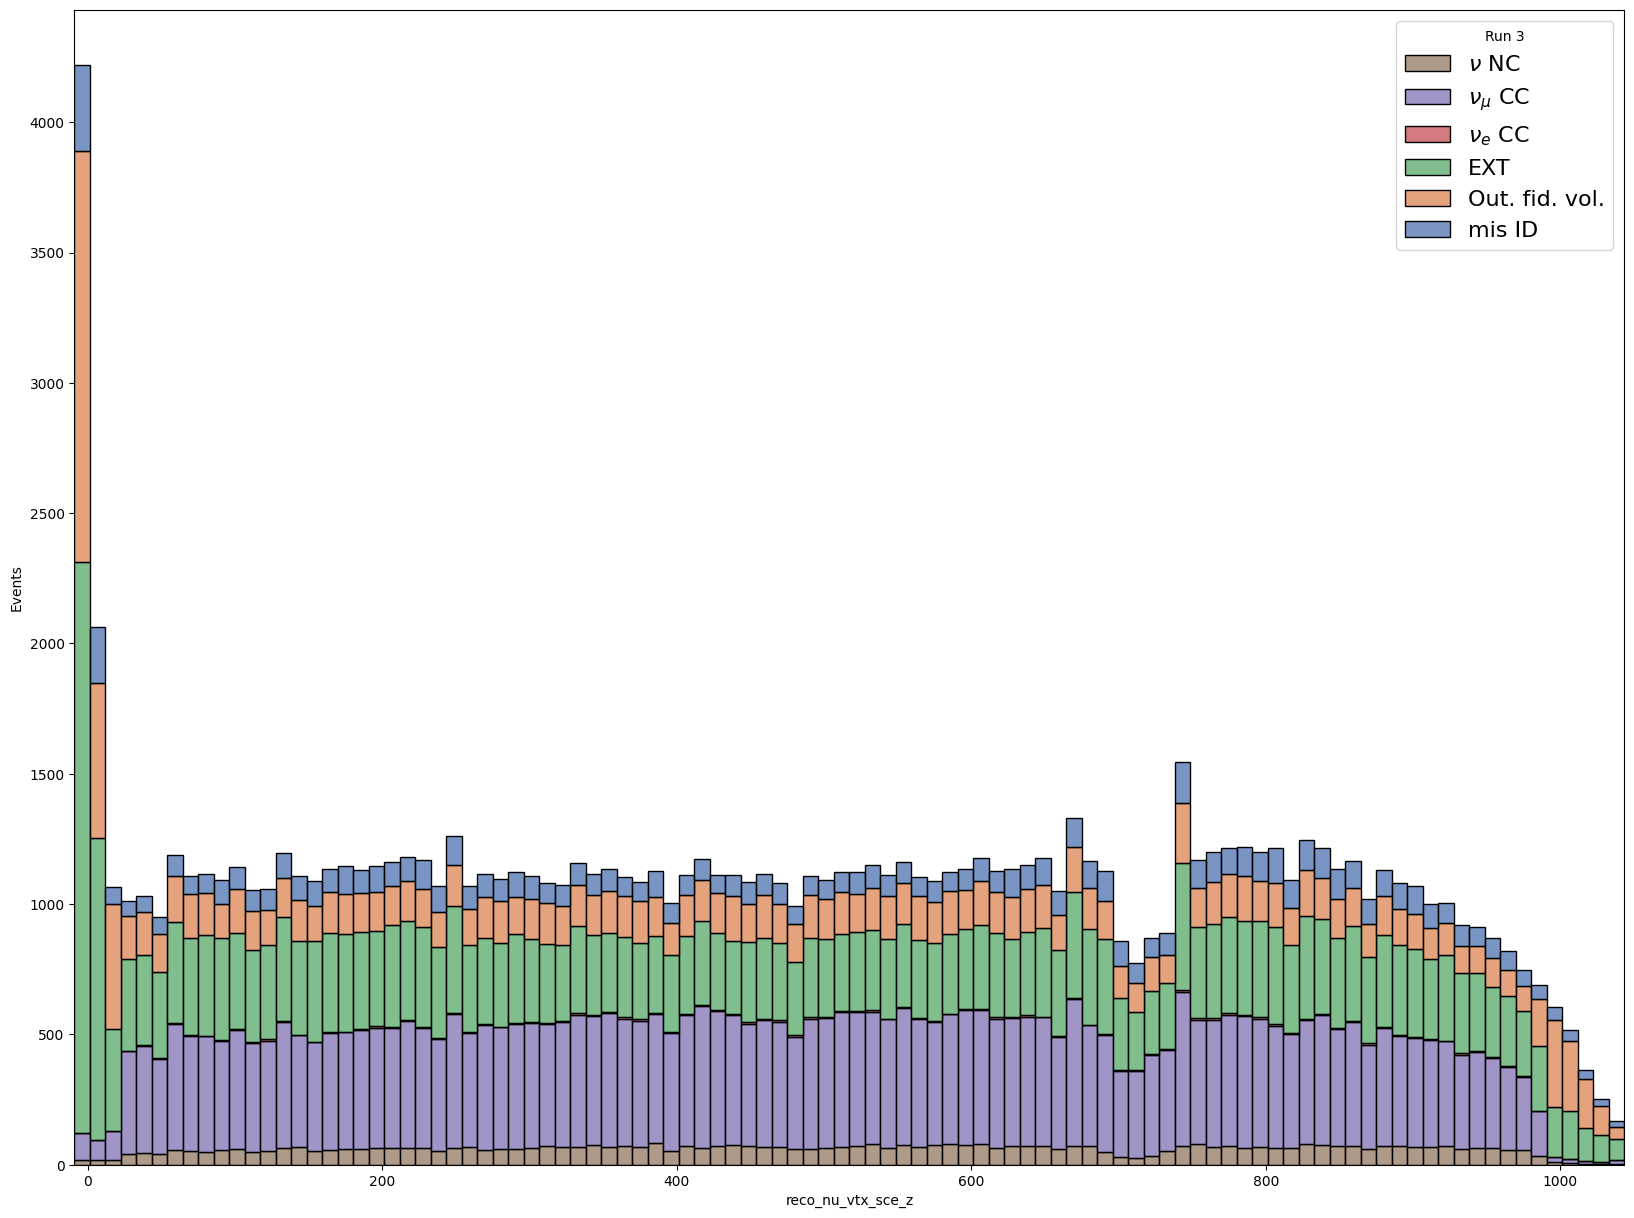

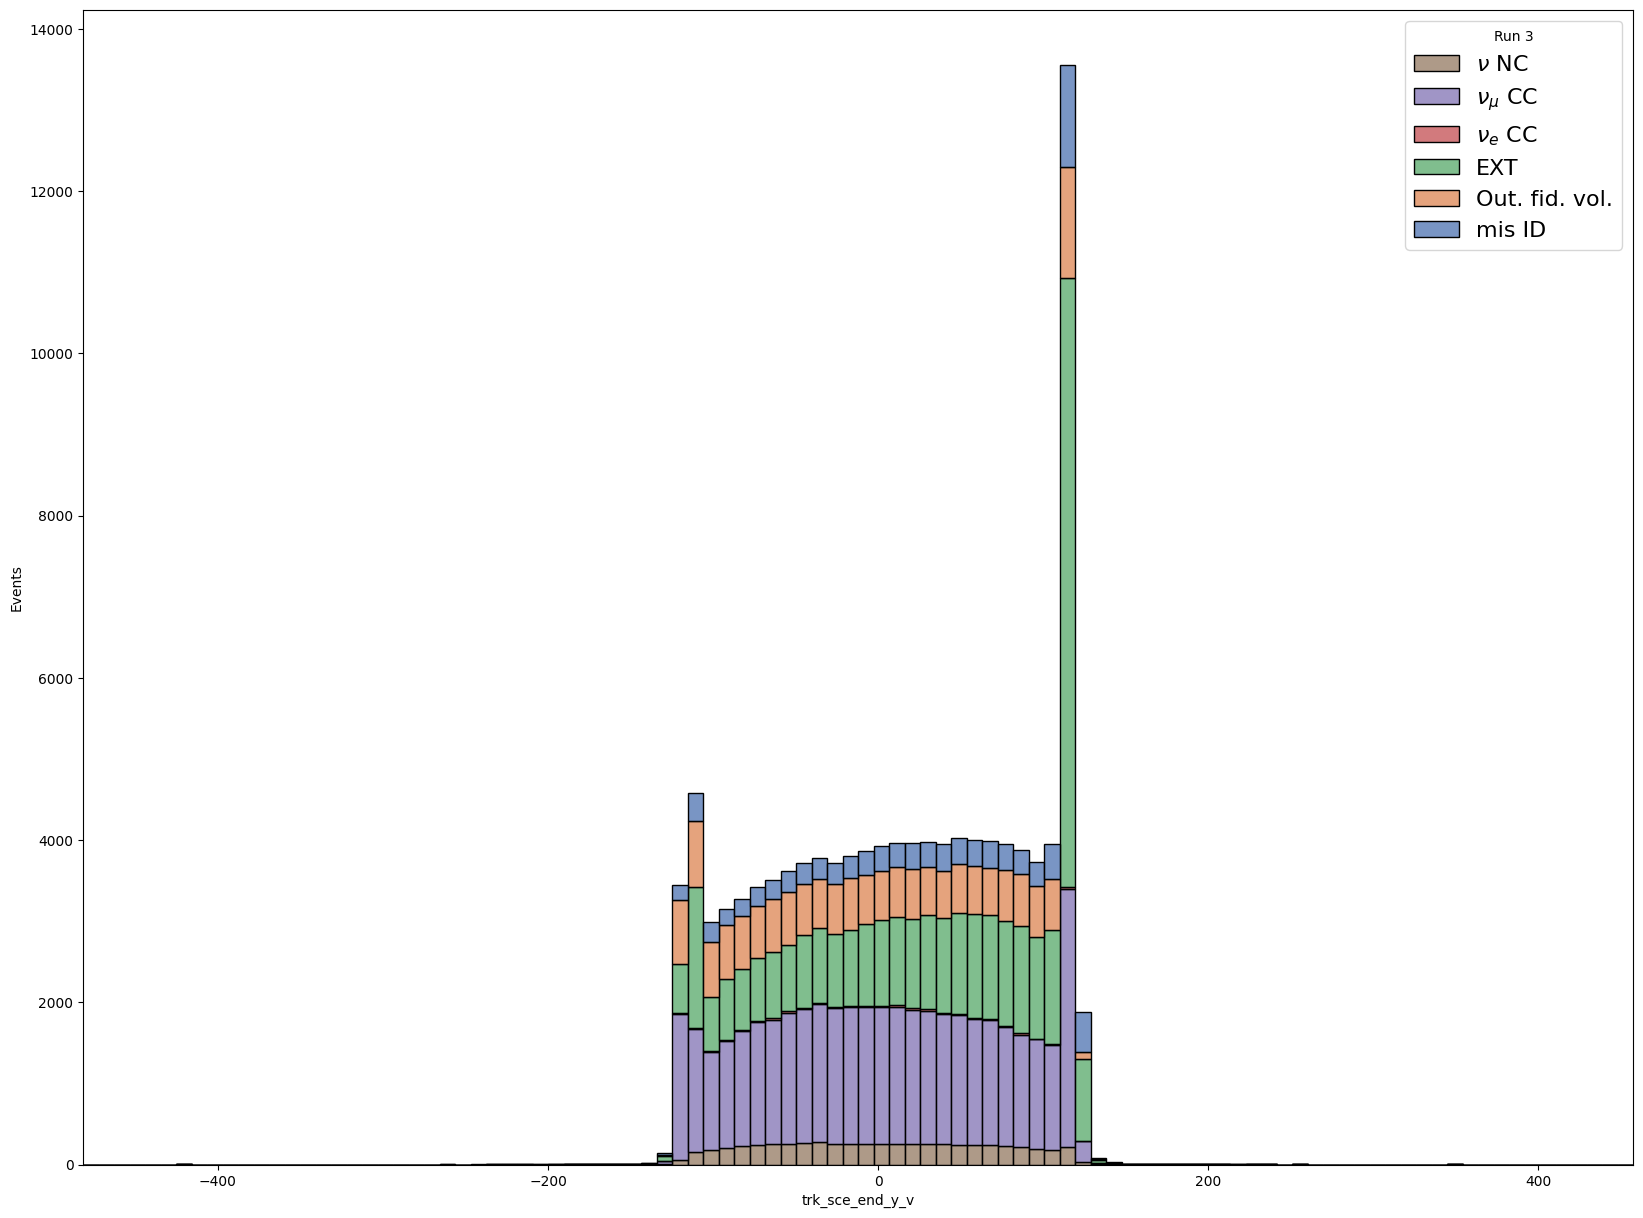

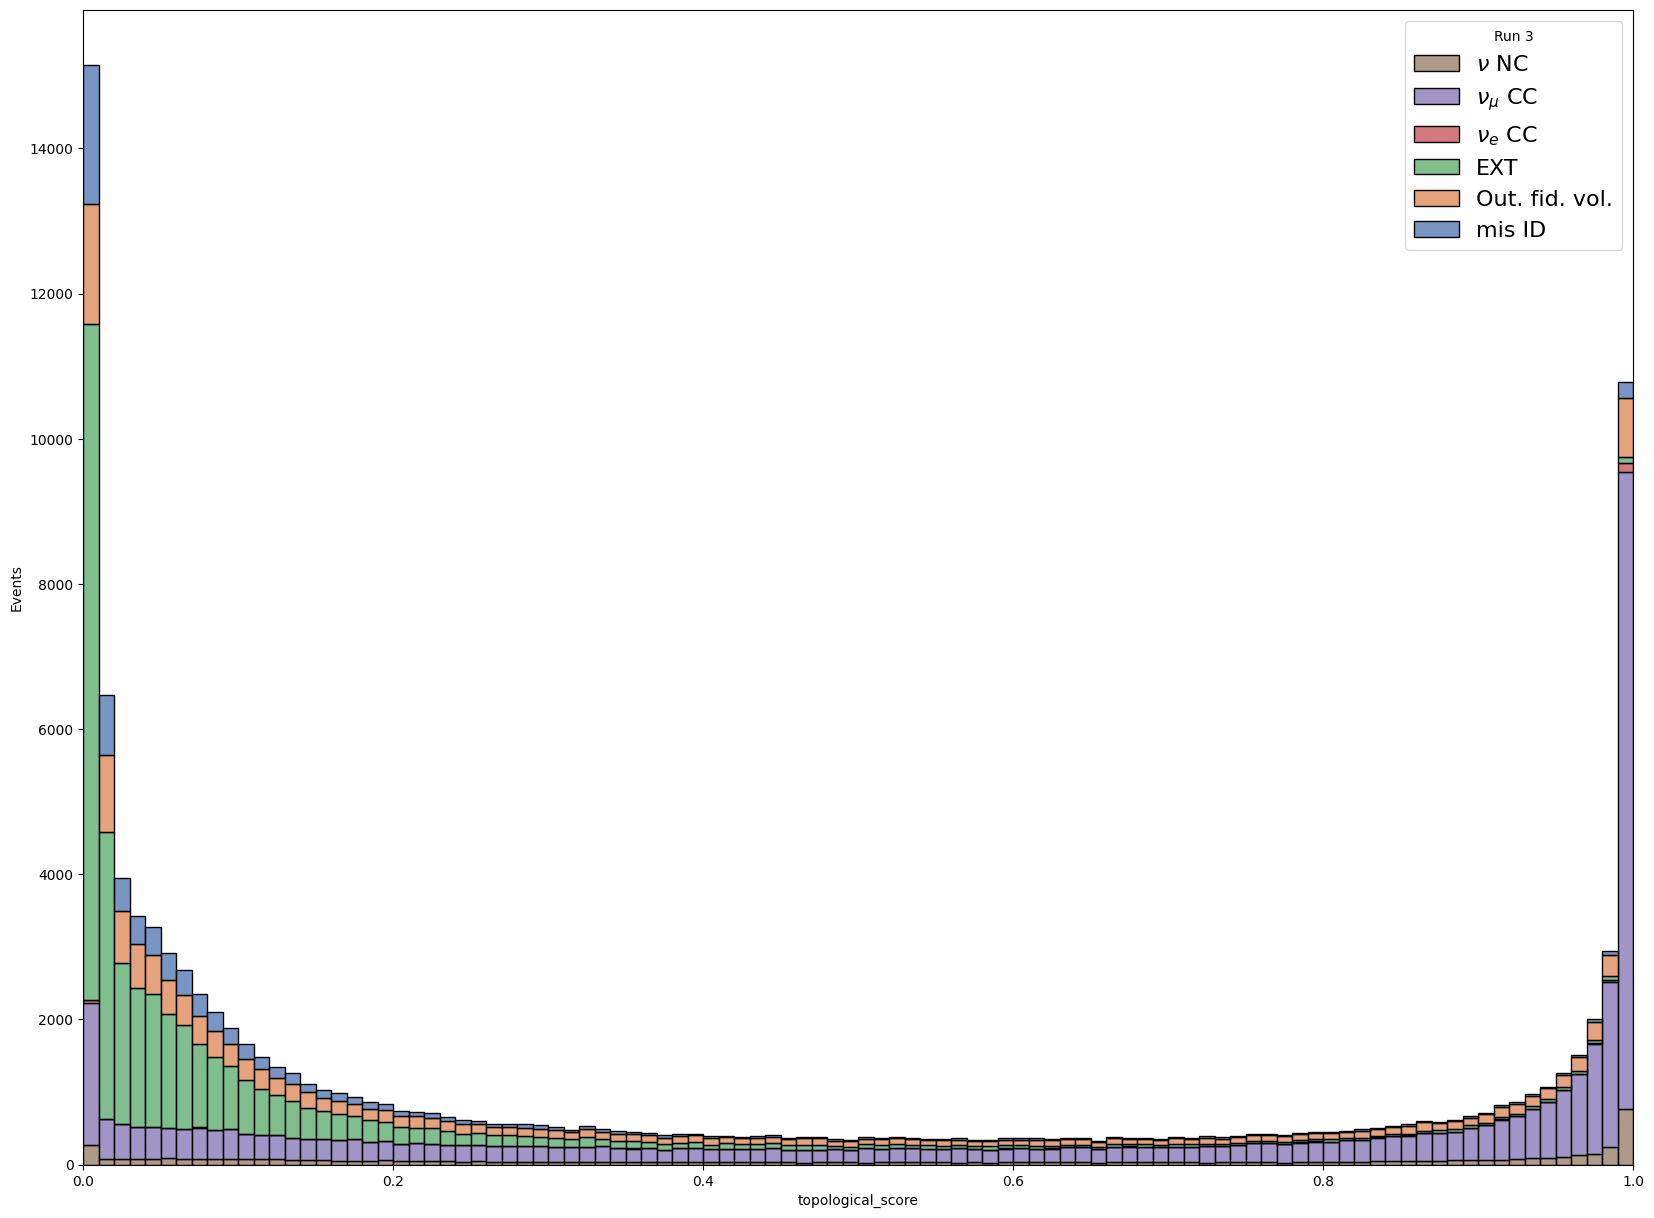

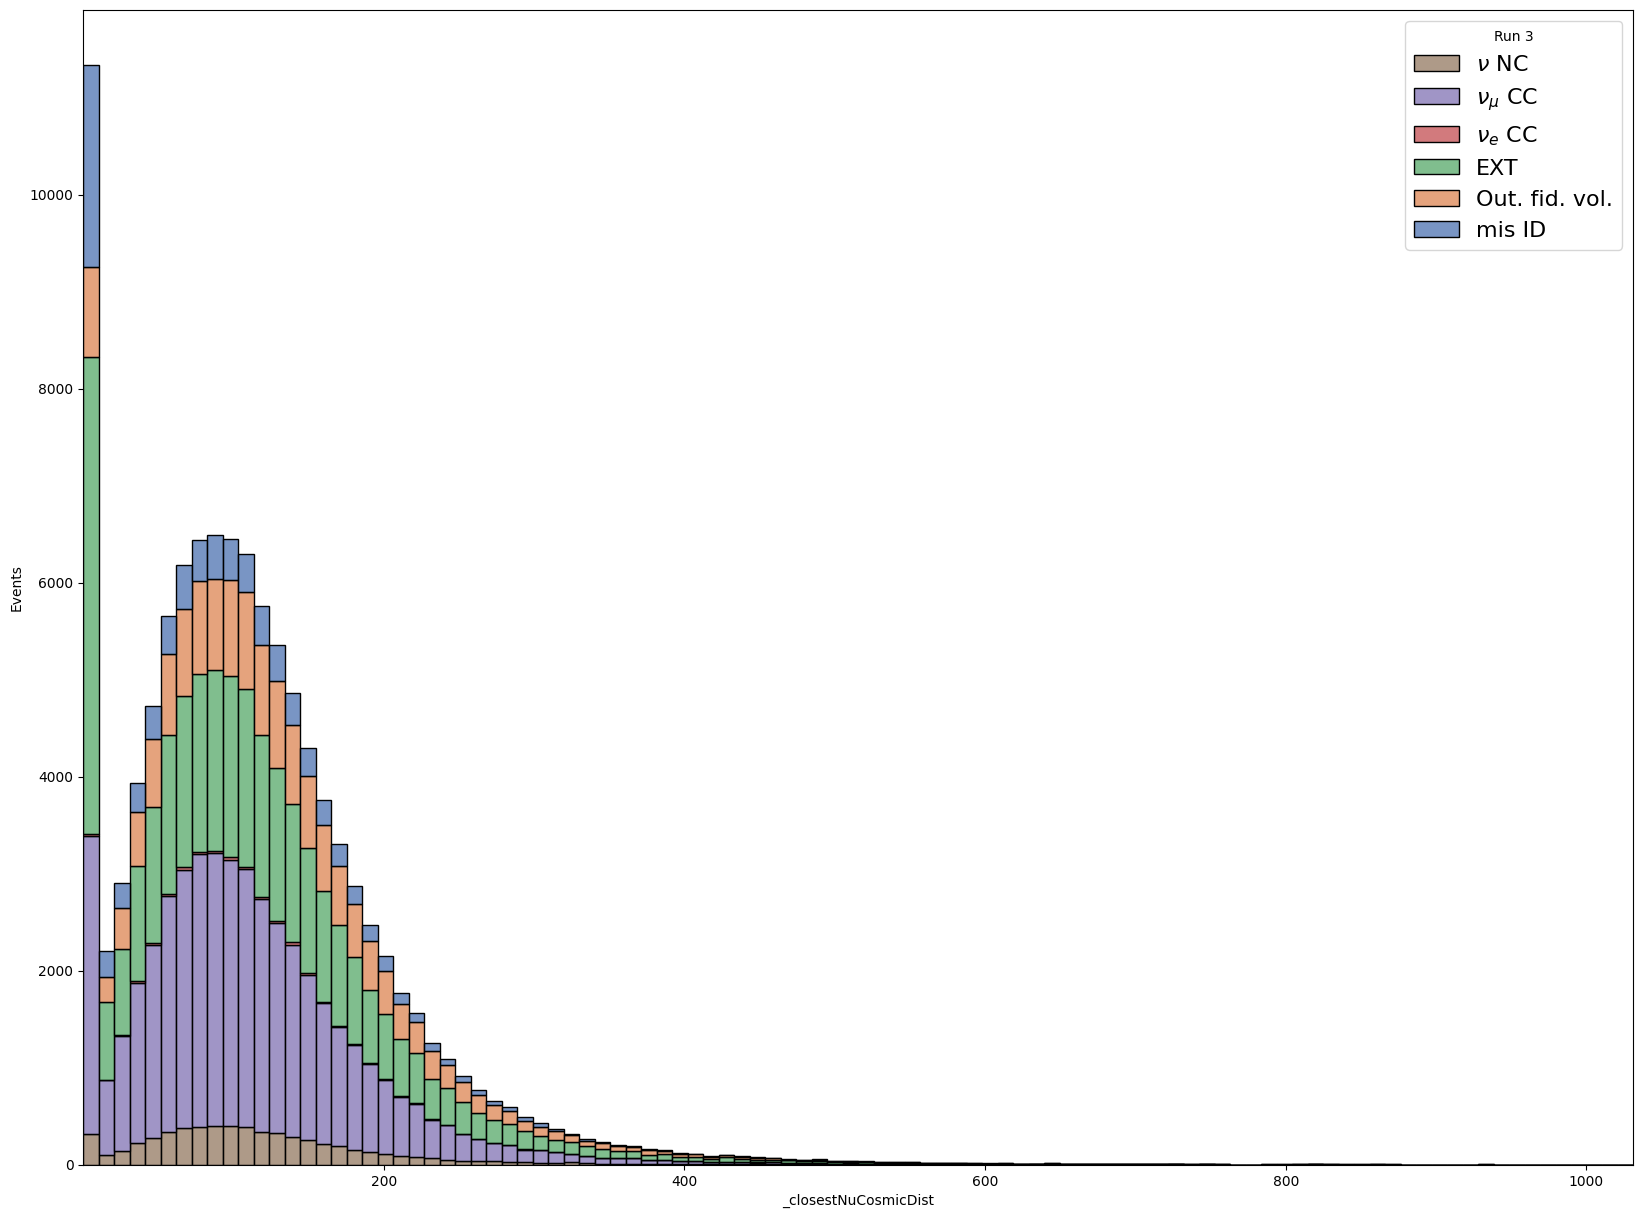

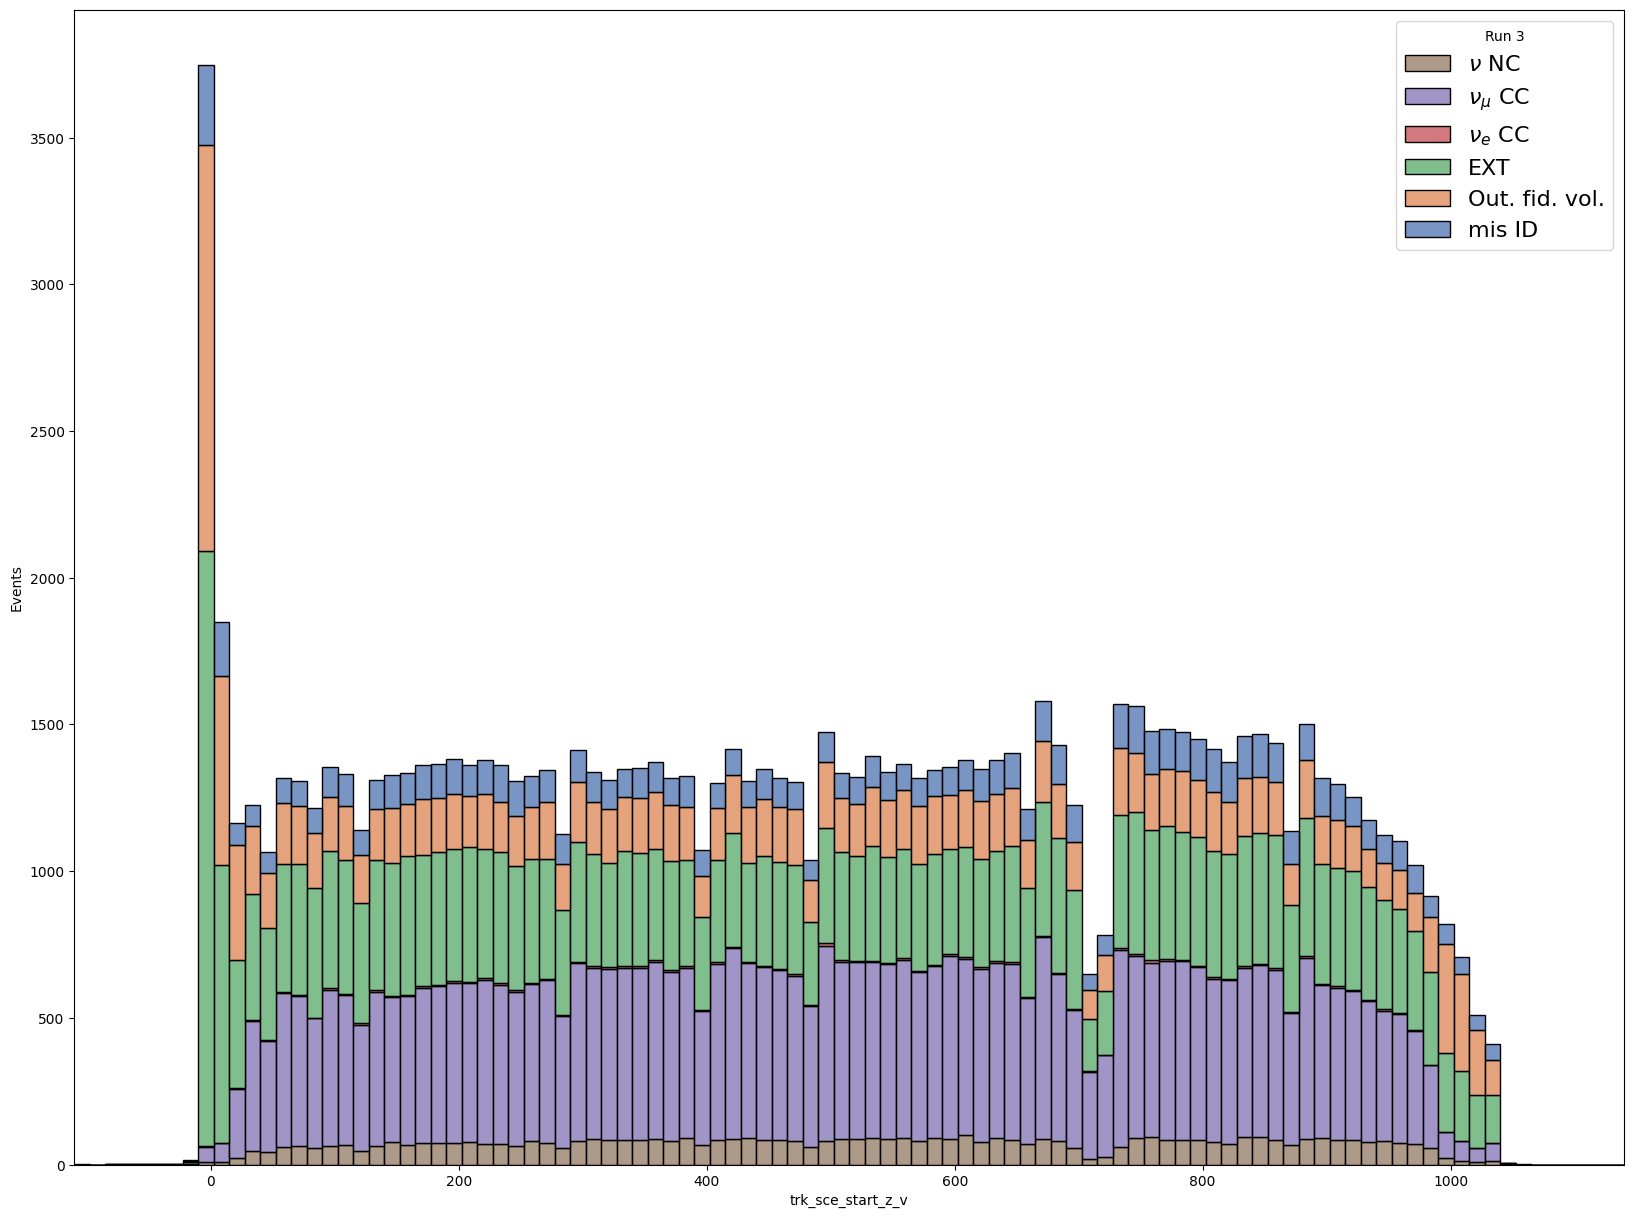

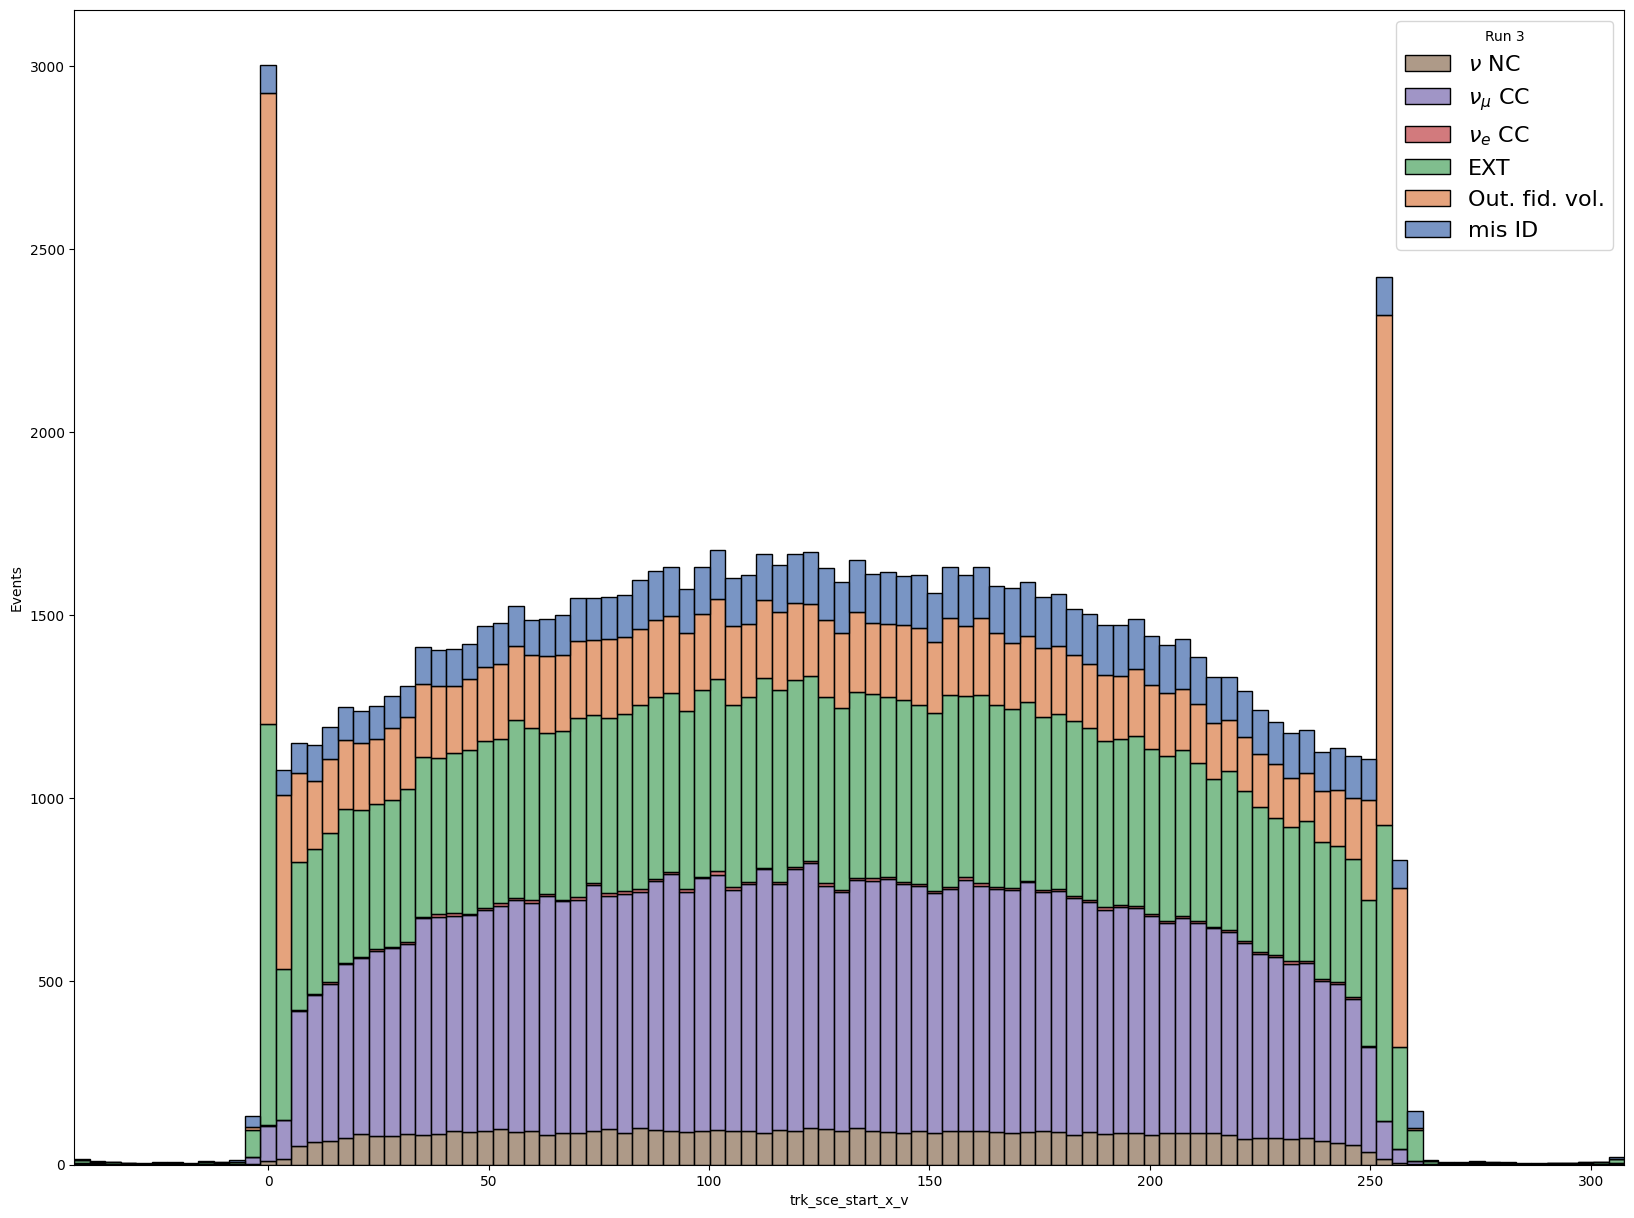

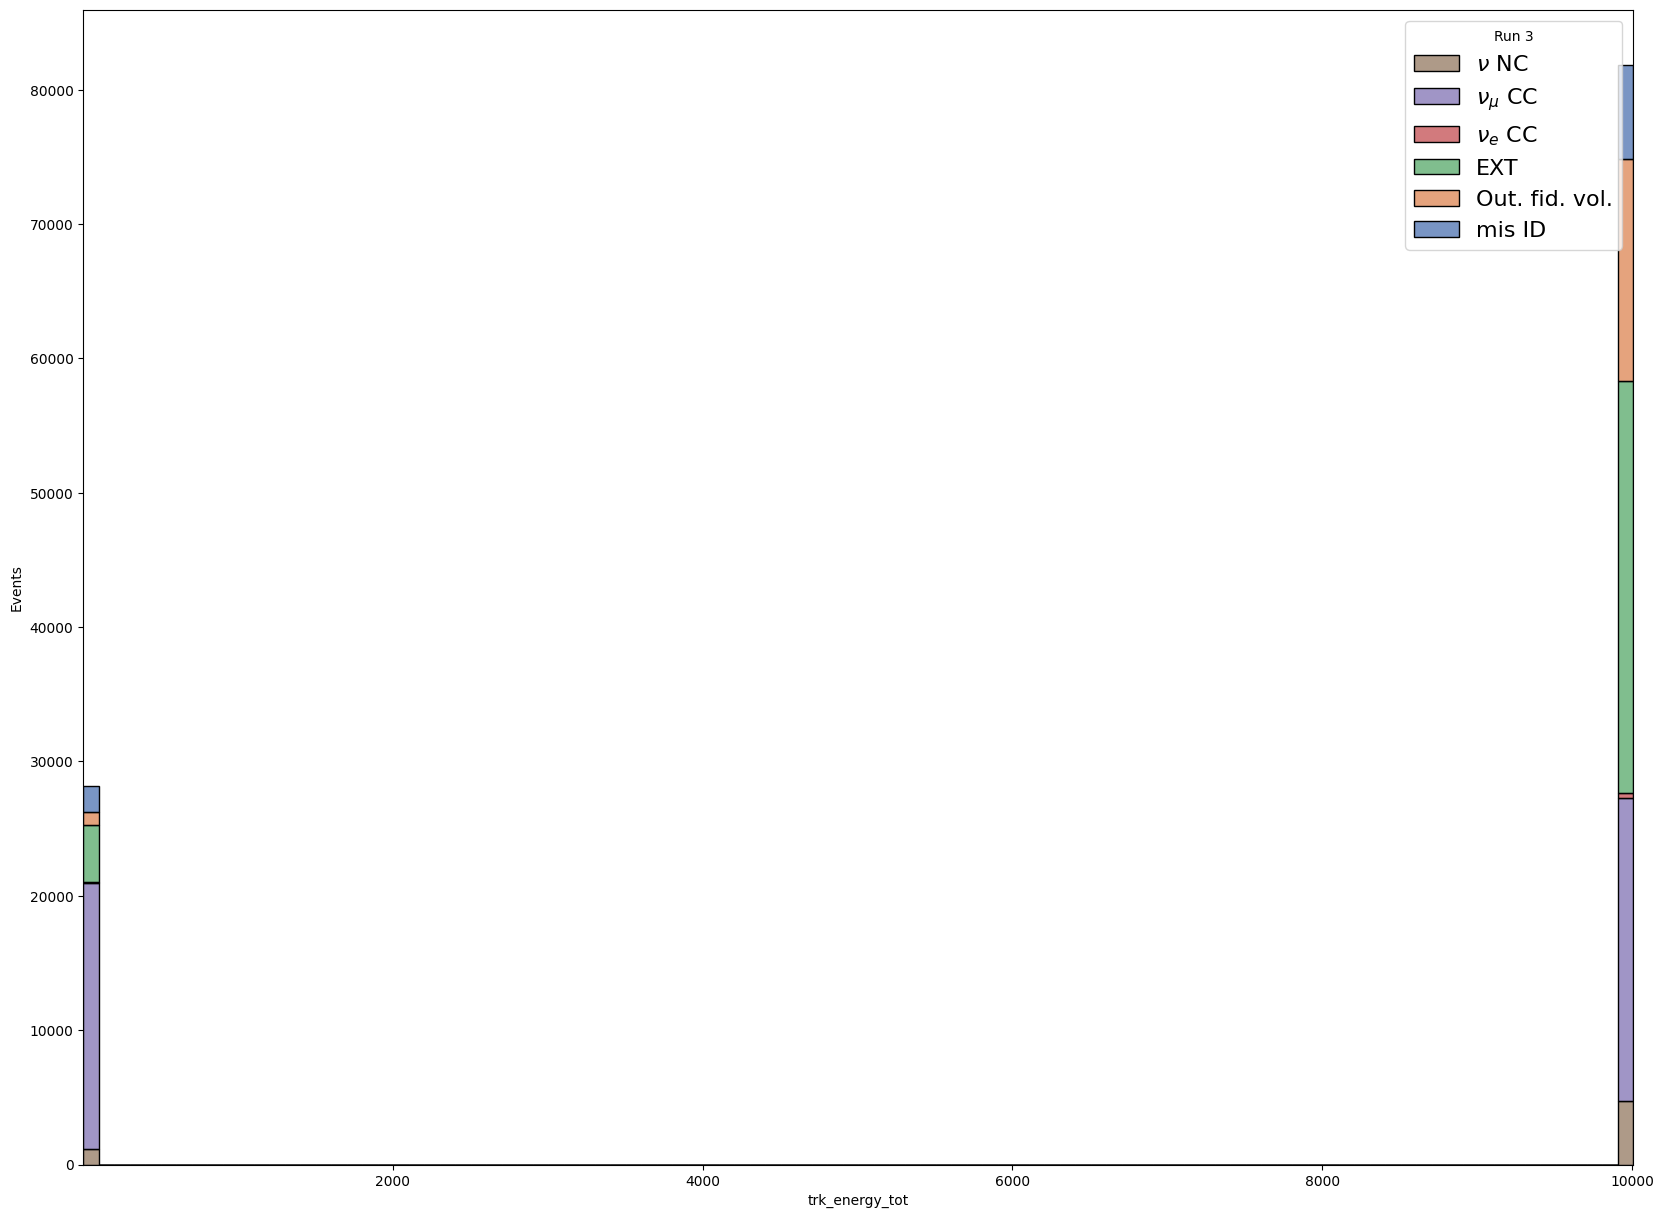

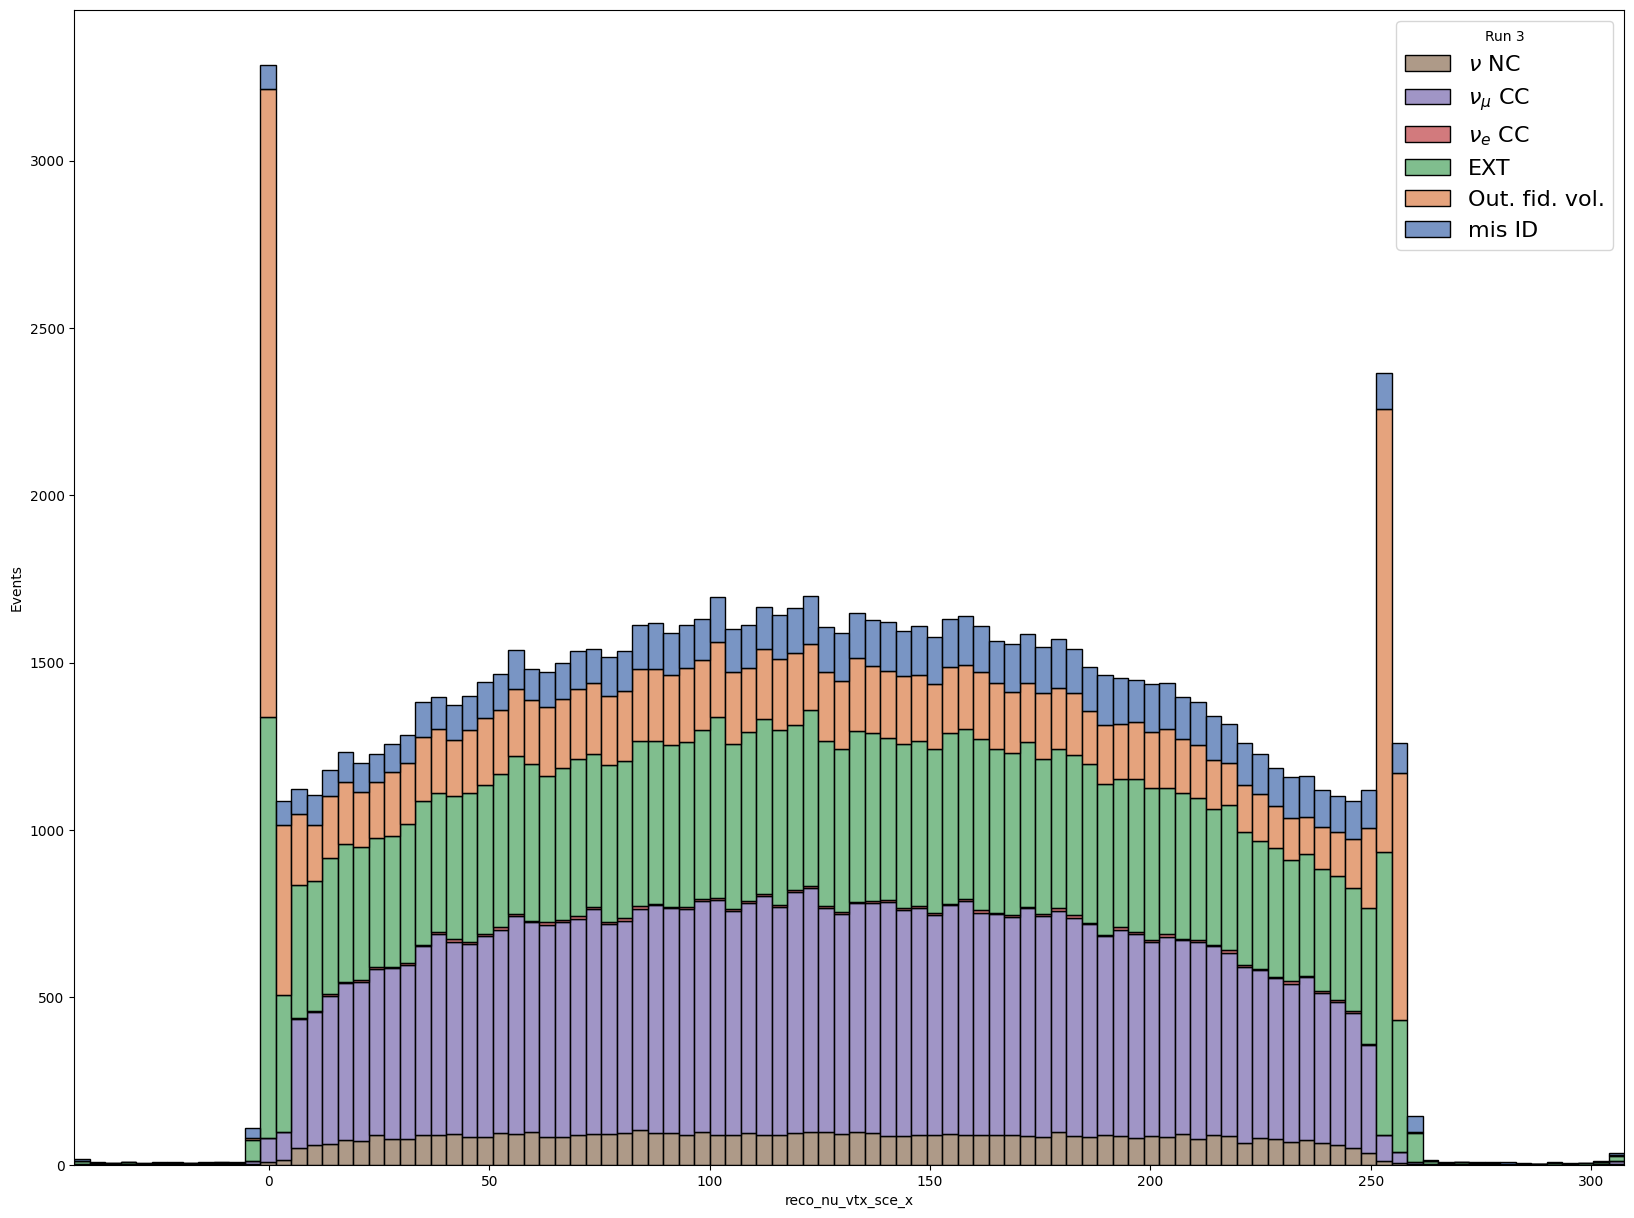

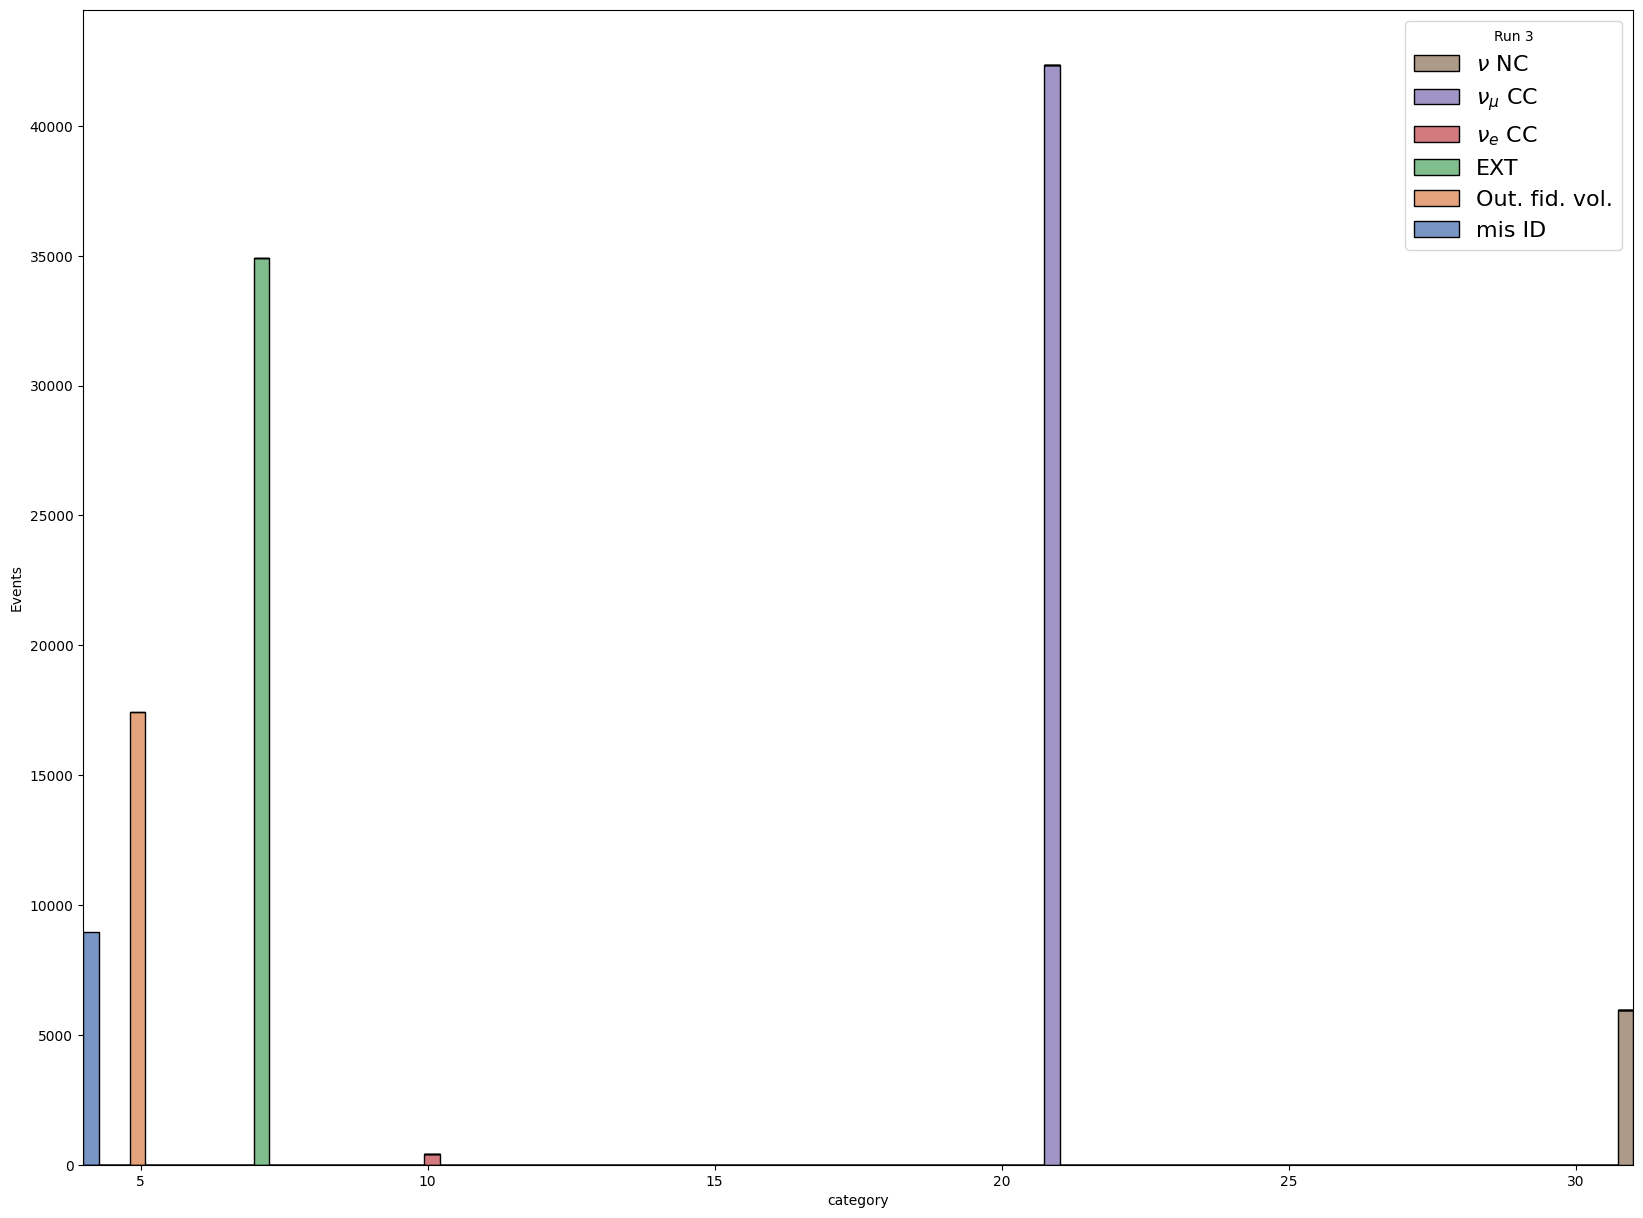

In [26]:
for variable in all_variables_to_plot:
    BIN = 100
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=variable, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=variable, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[variable]), np.max(MC_EXT[variable])])
    #plt.xticks(np.arange(np.min(MC_EXT[variable]), np.max(MC_EXT[variable]), 0.1))
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    plt.show(i)

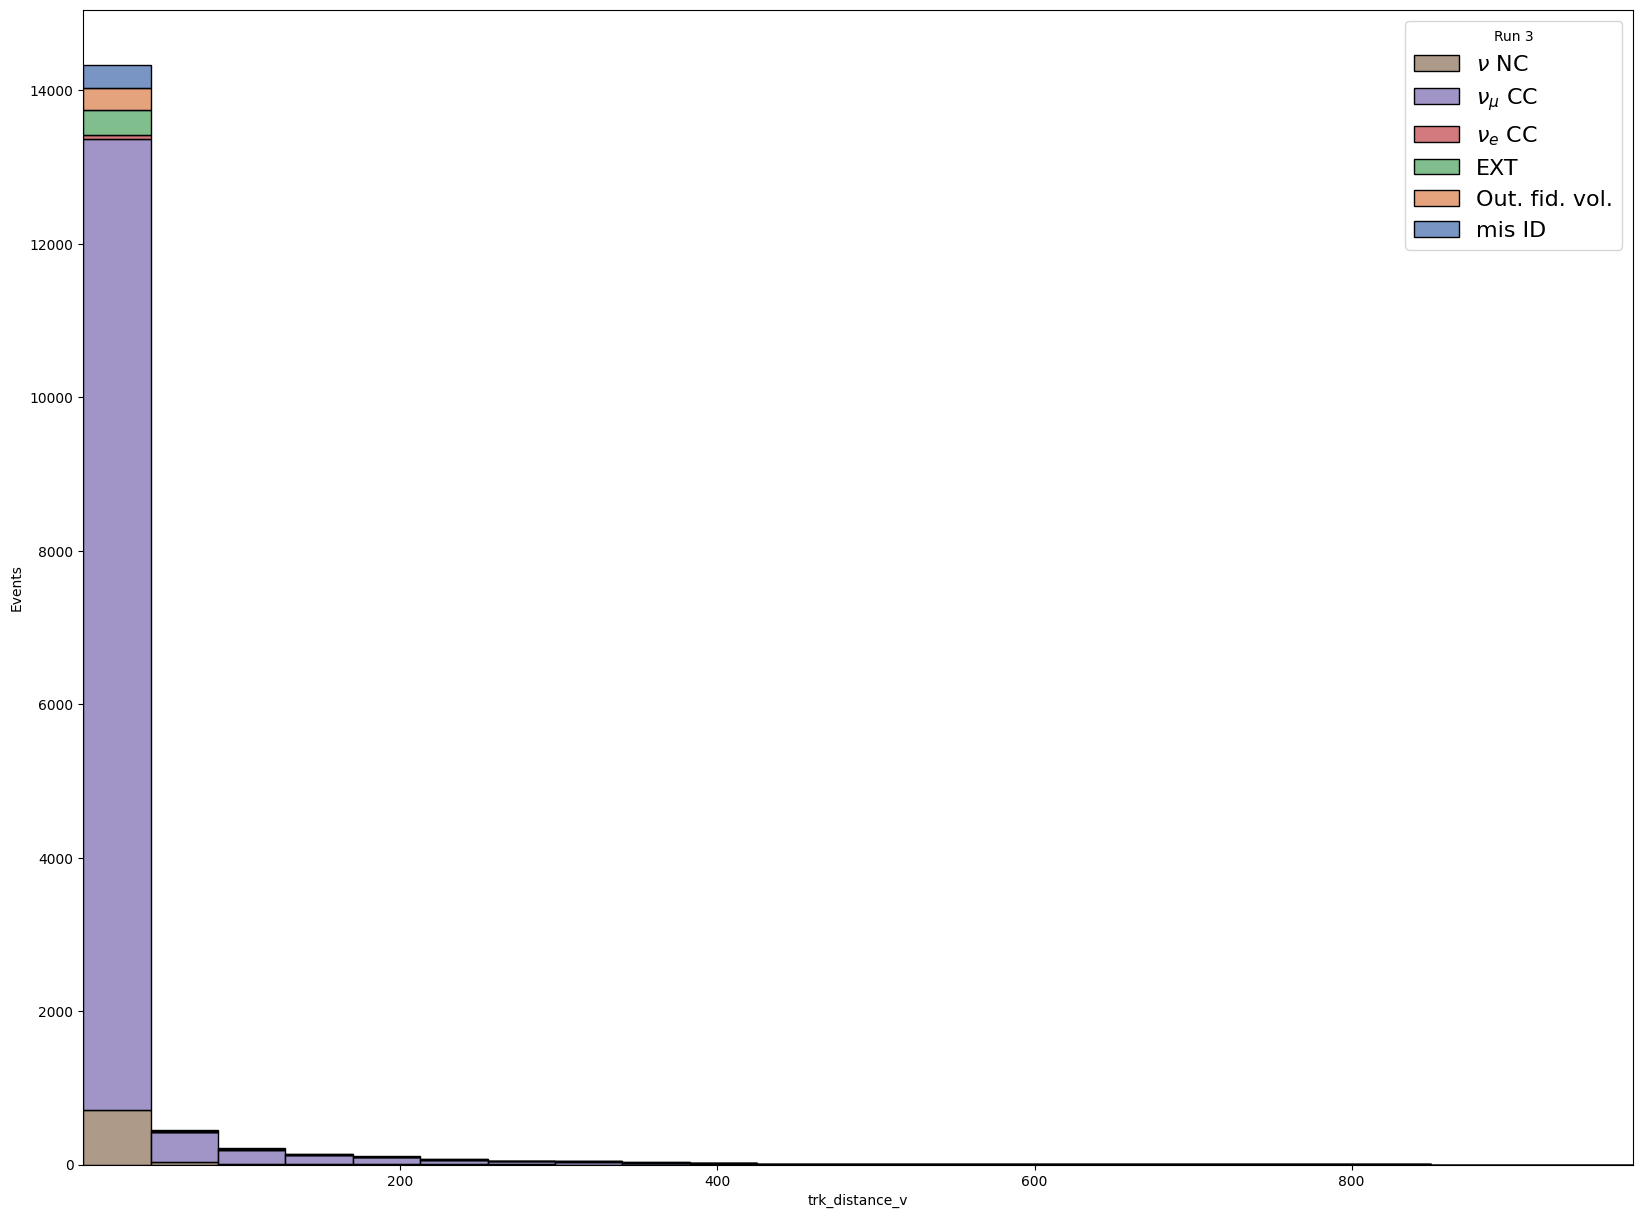

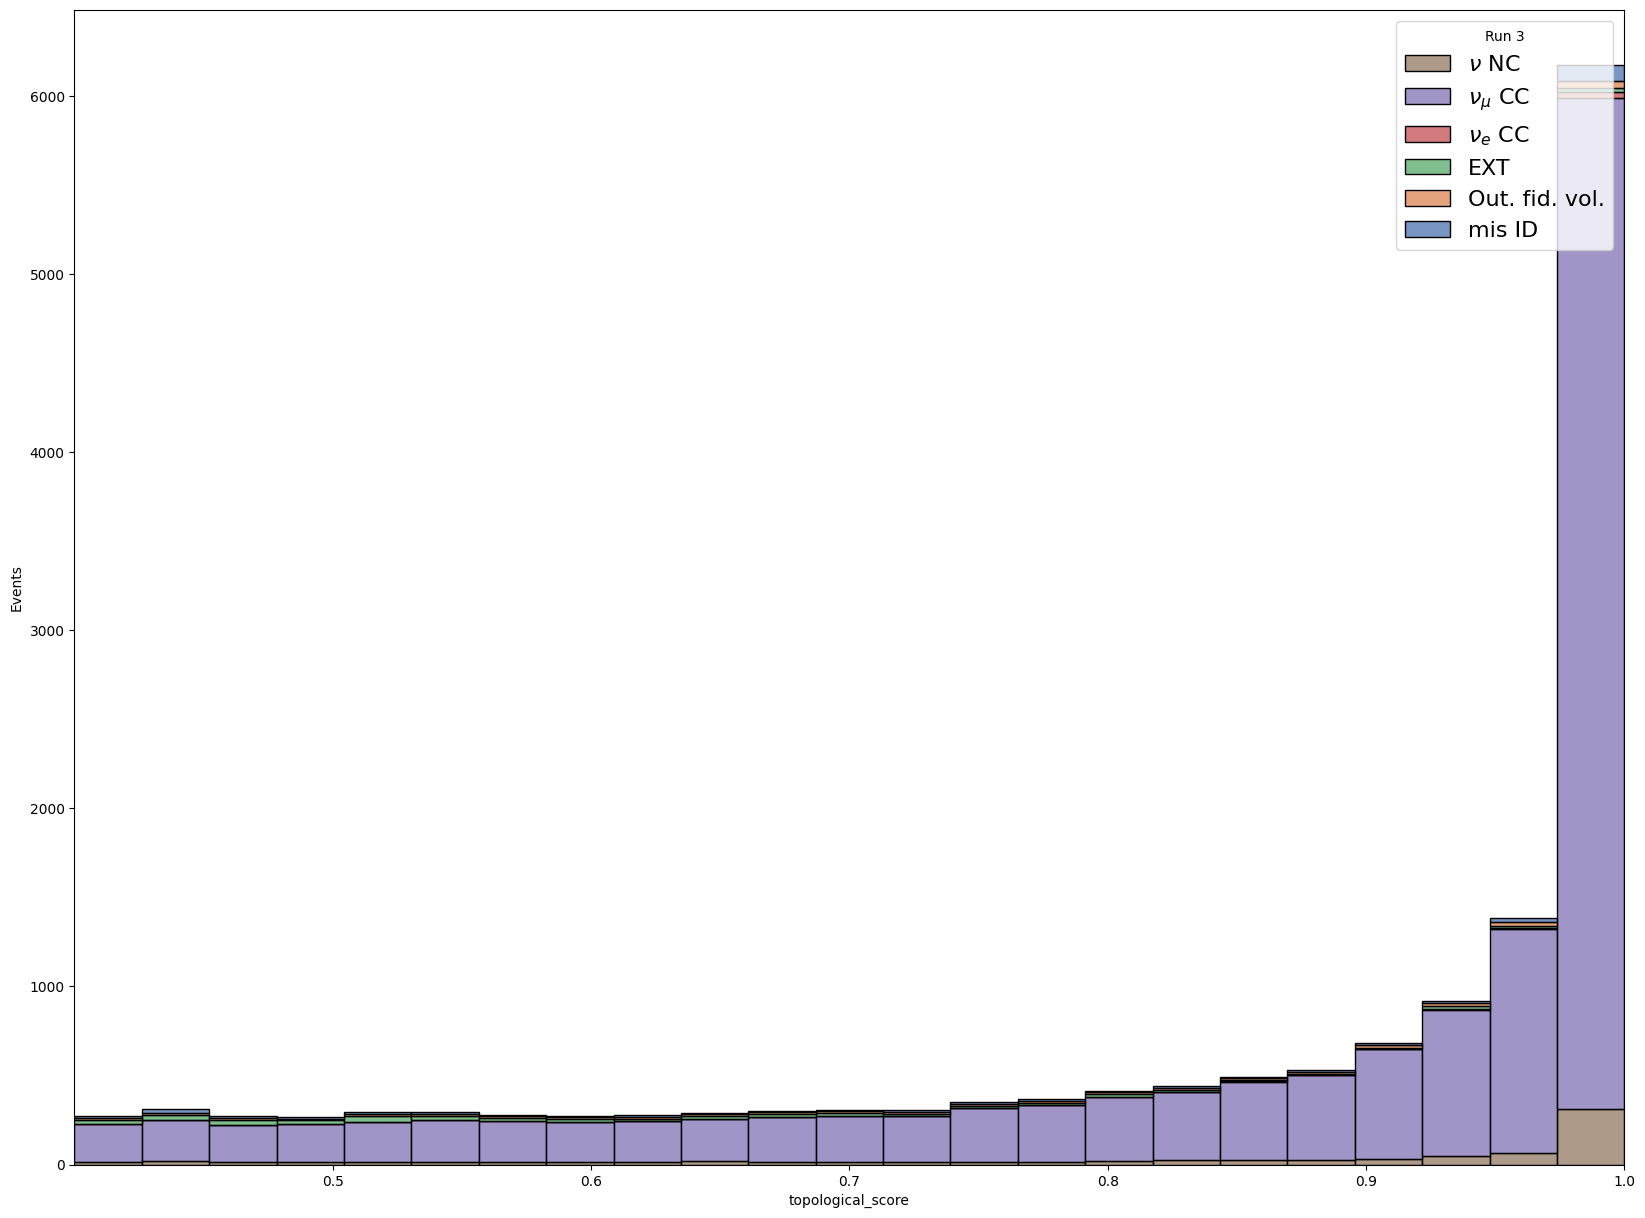

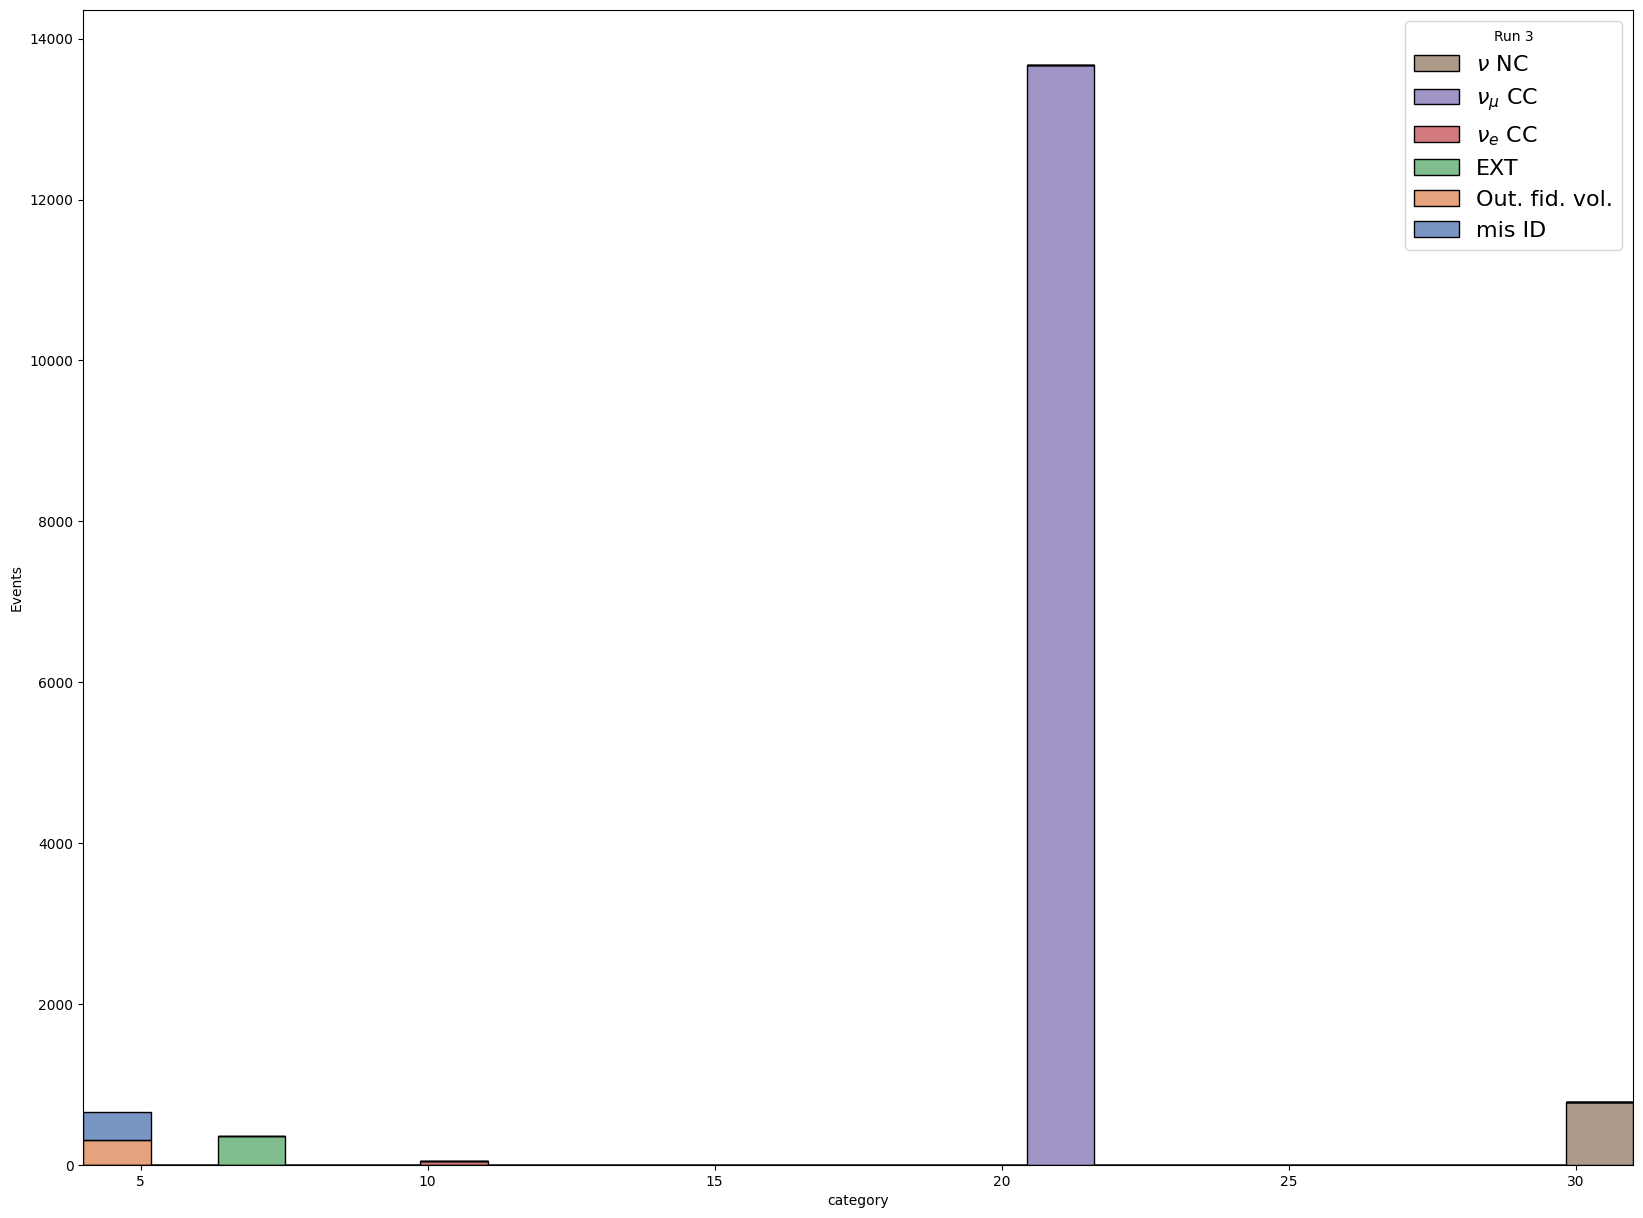

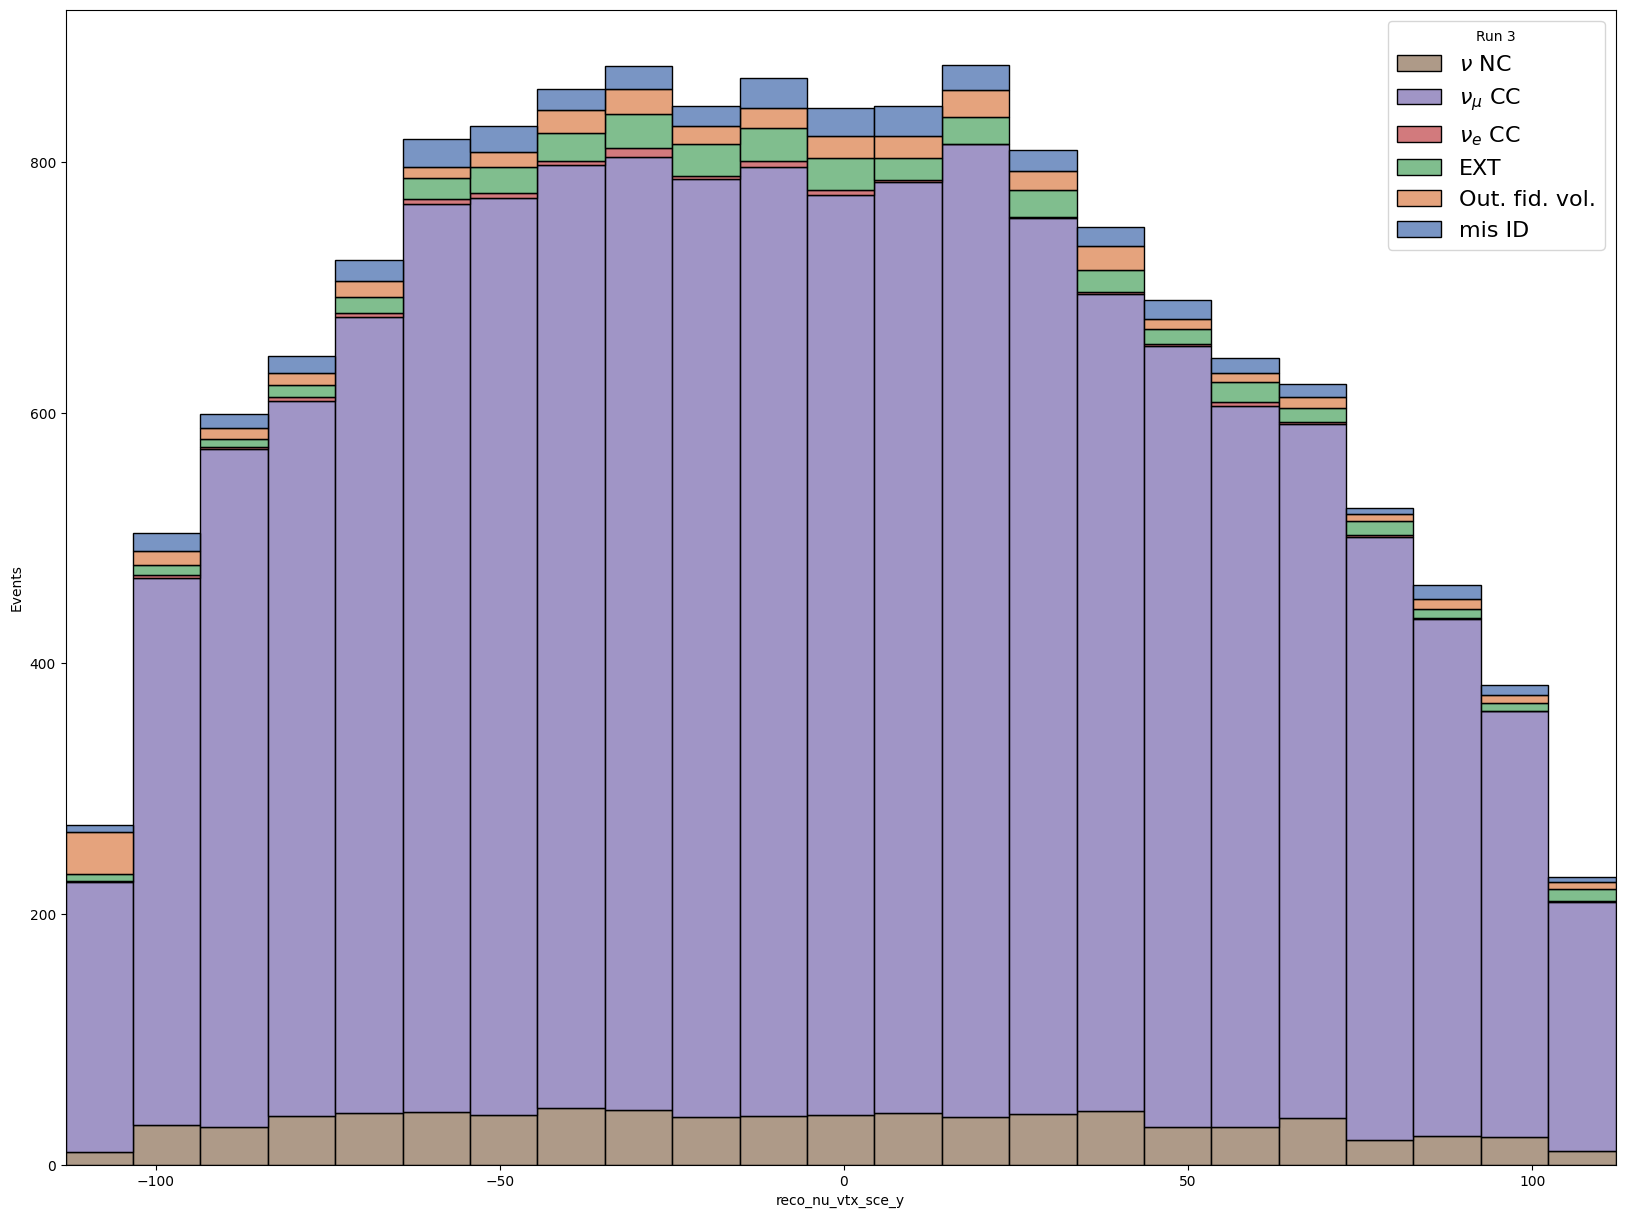

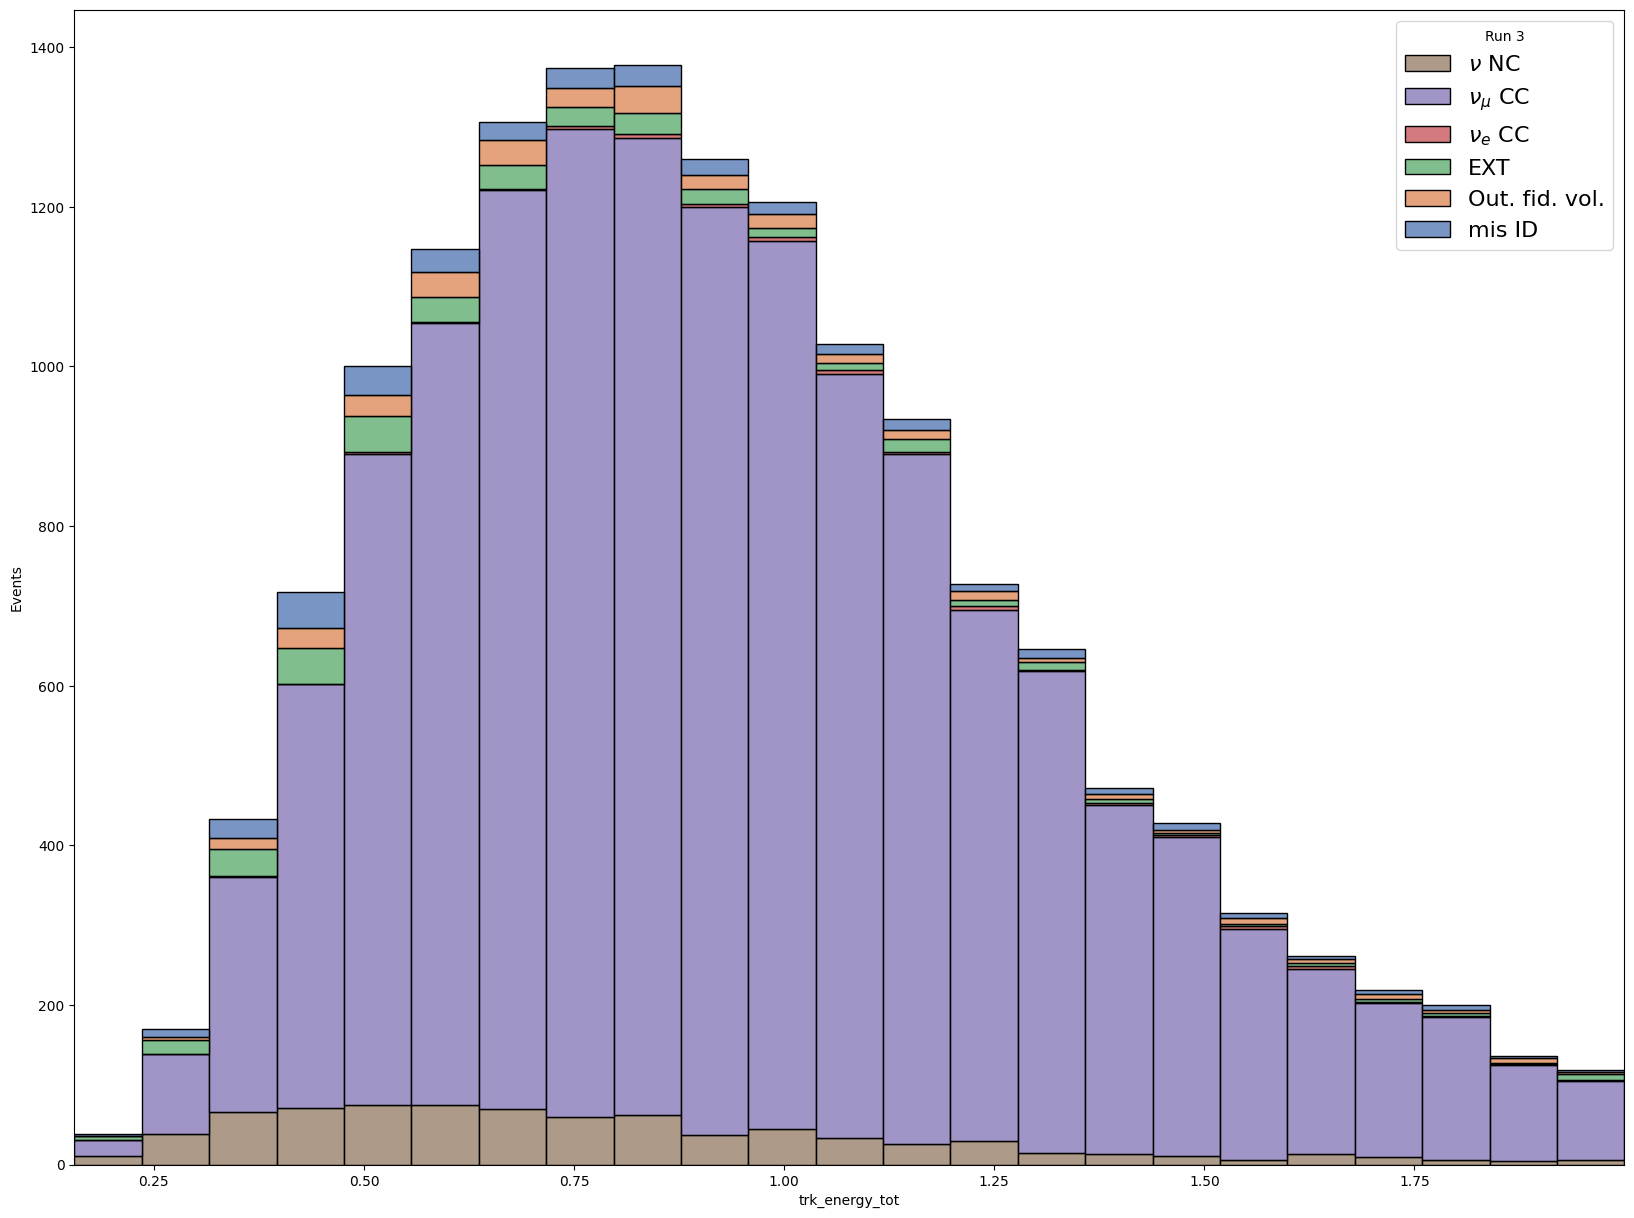

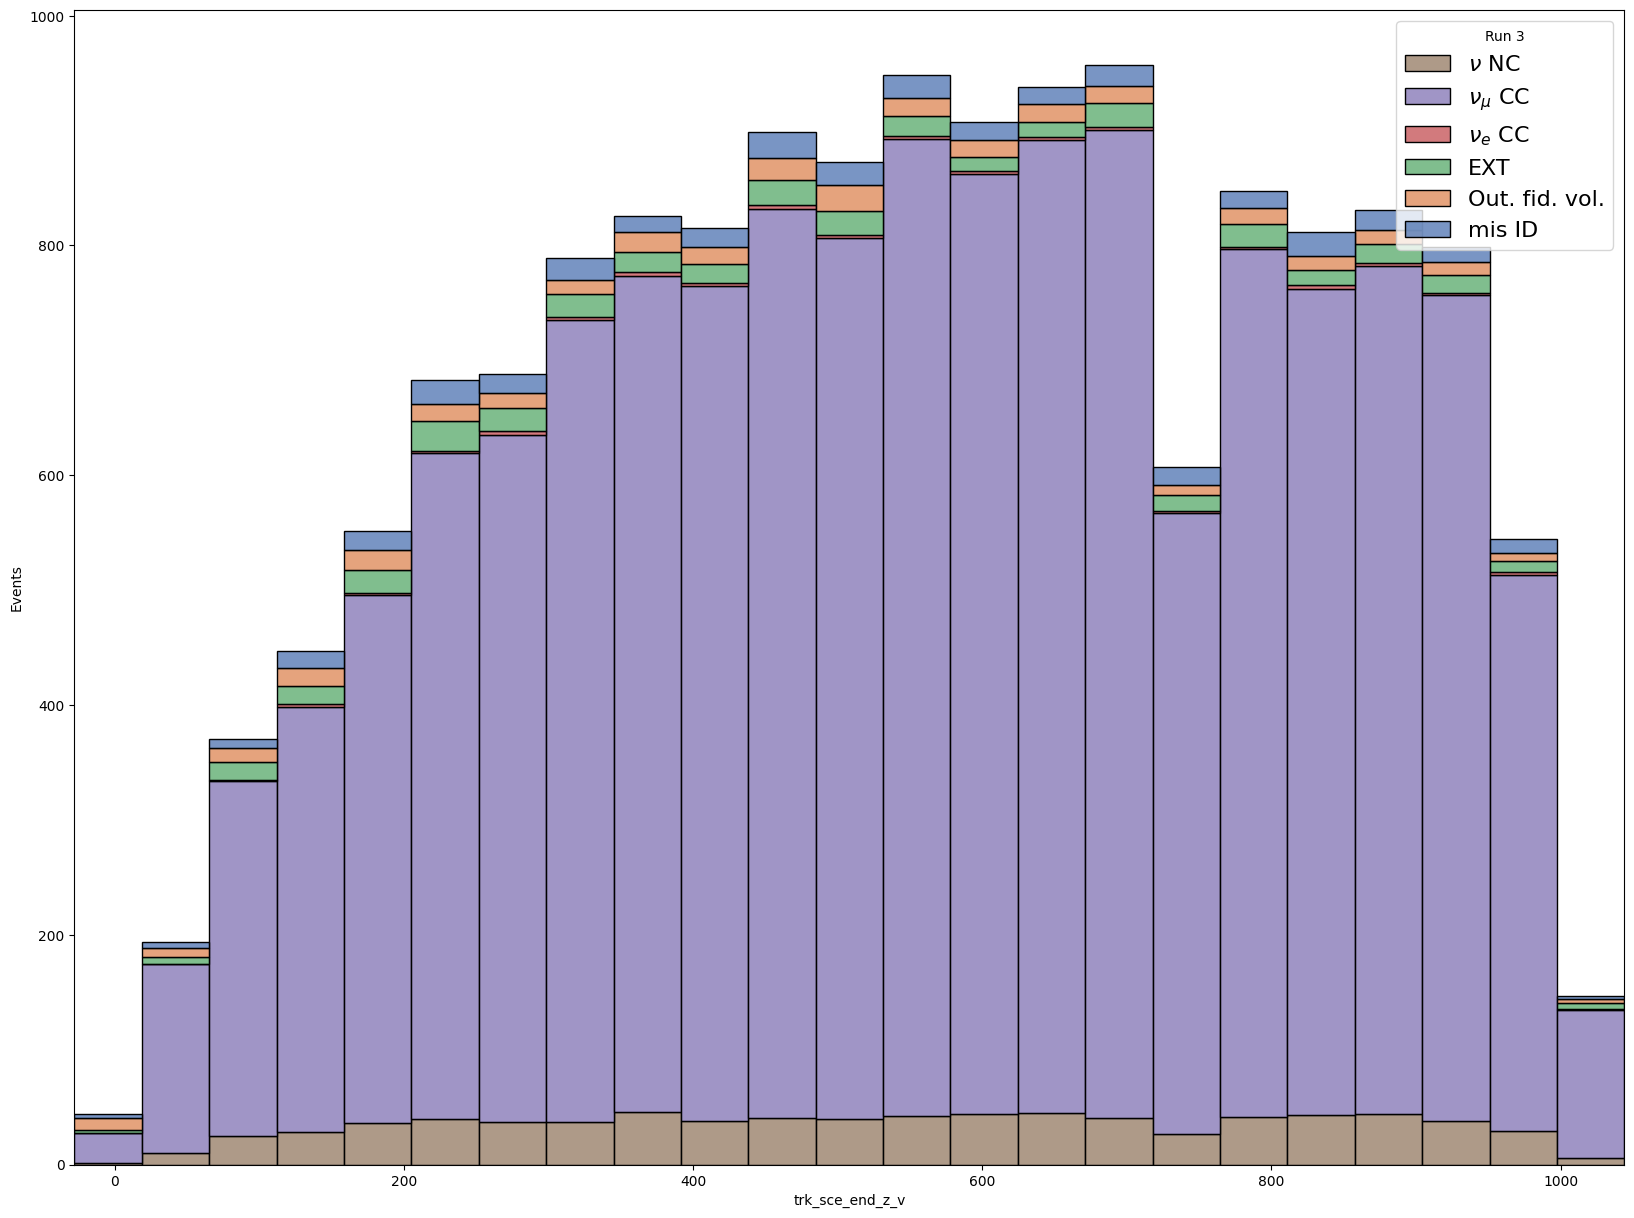

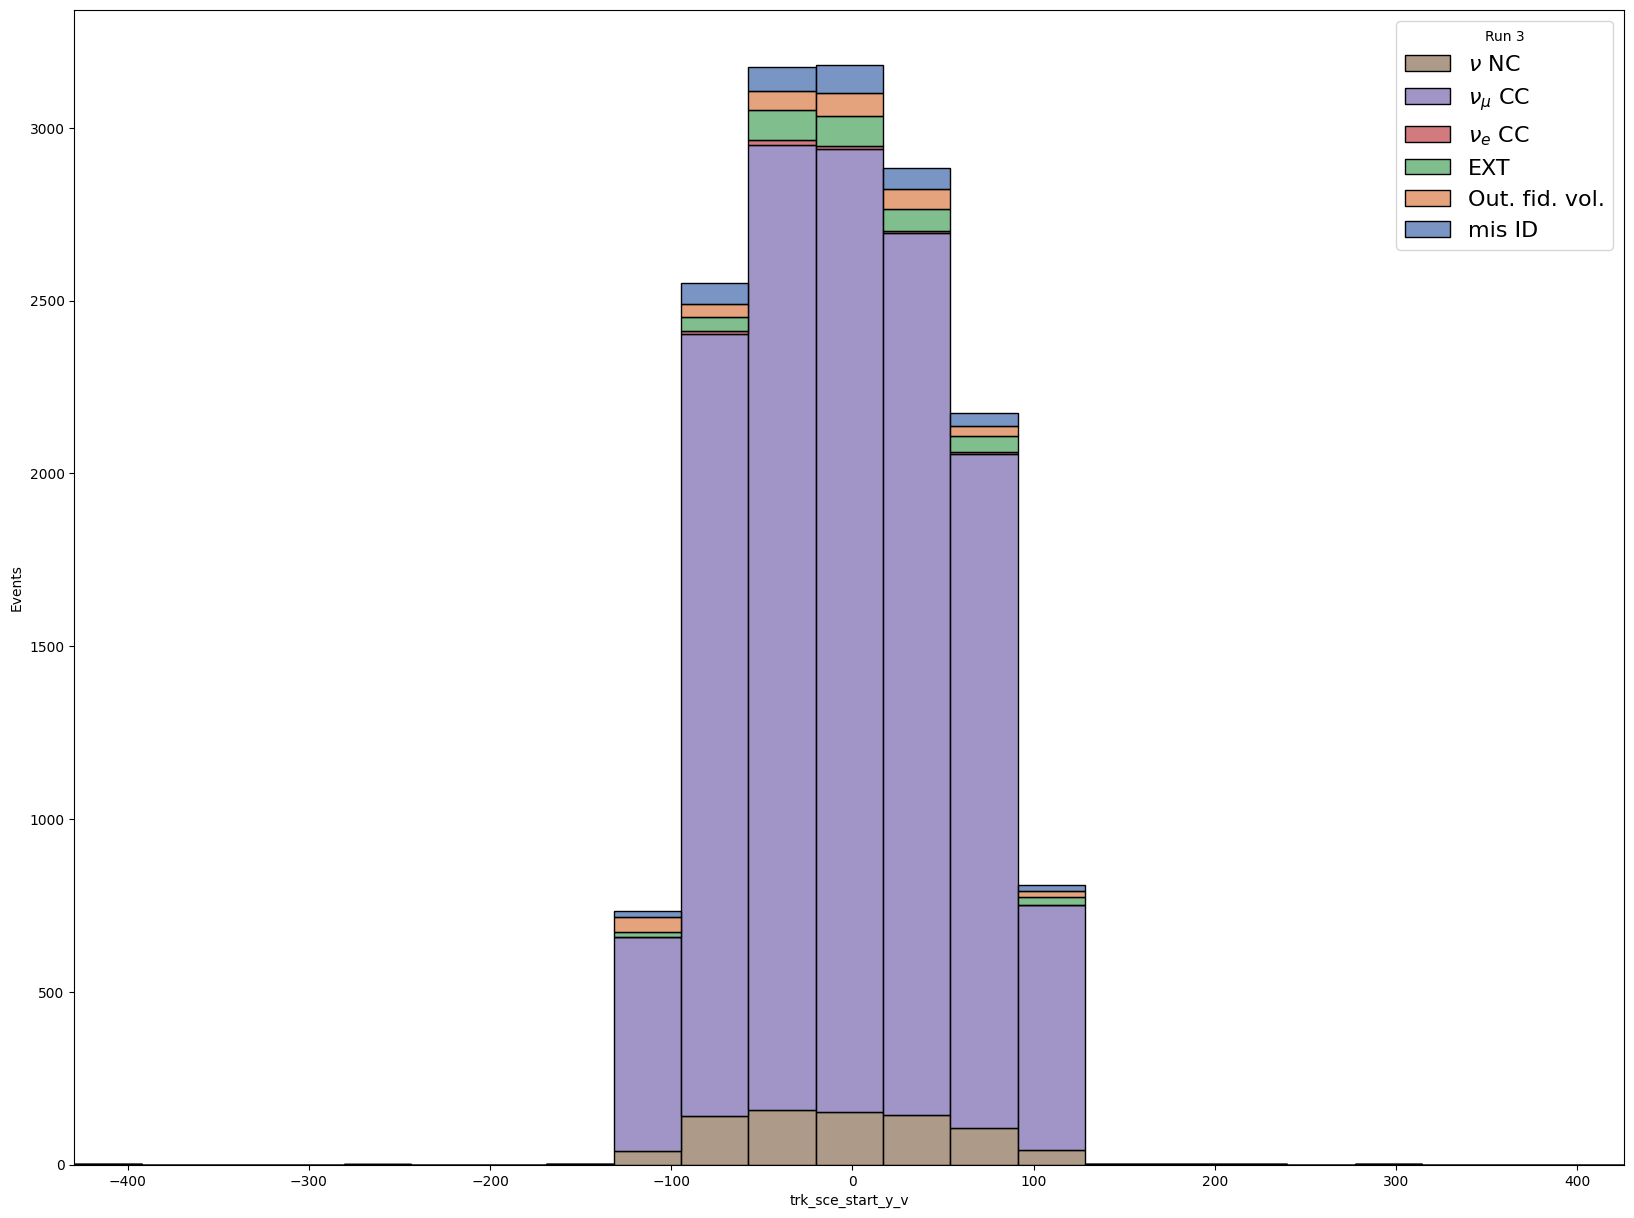

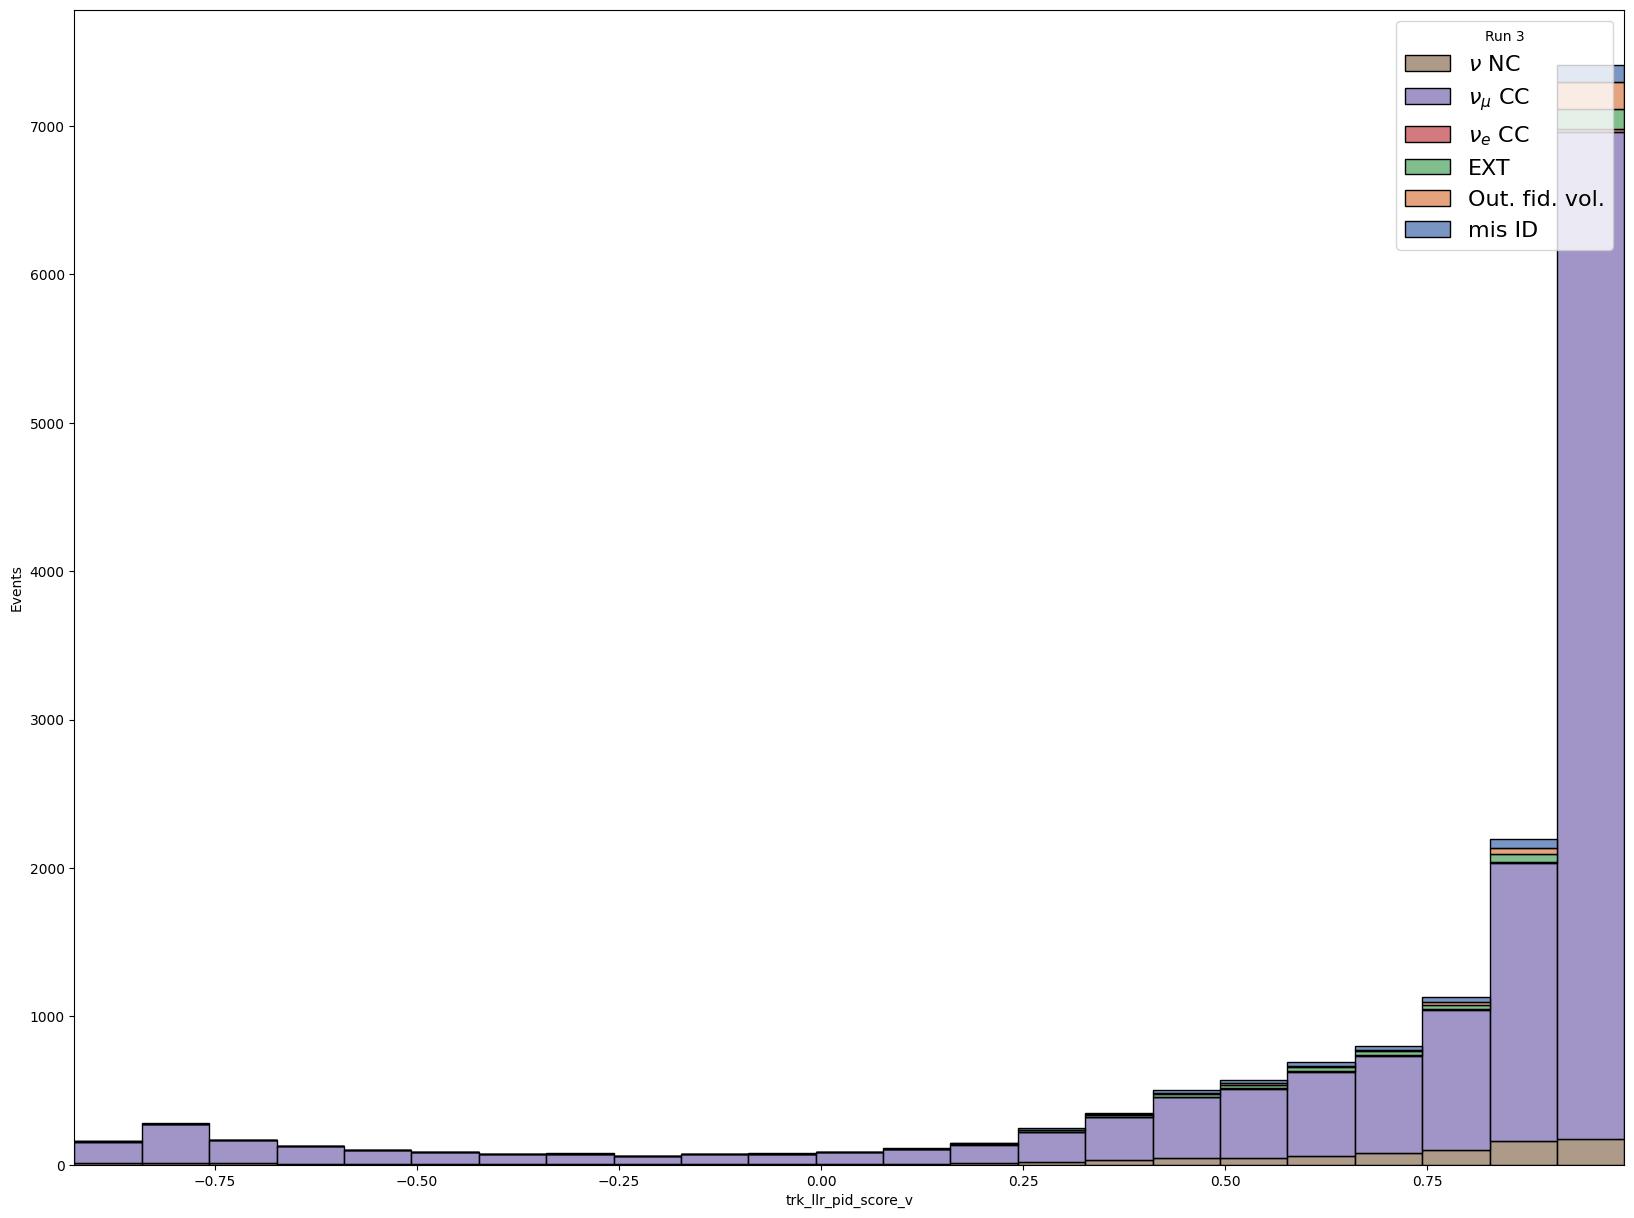

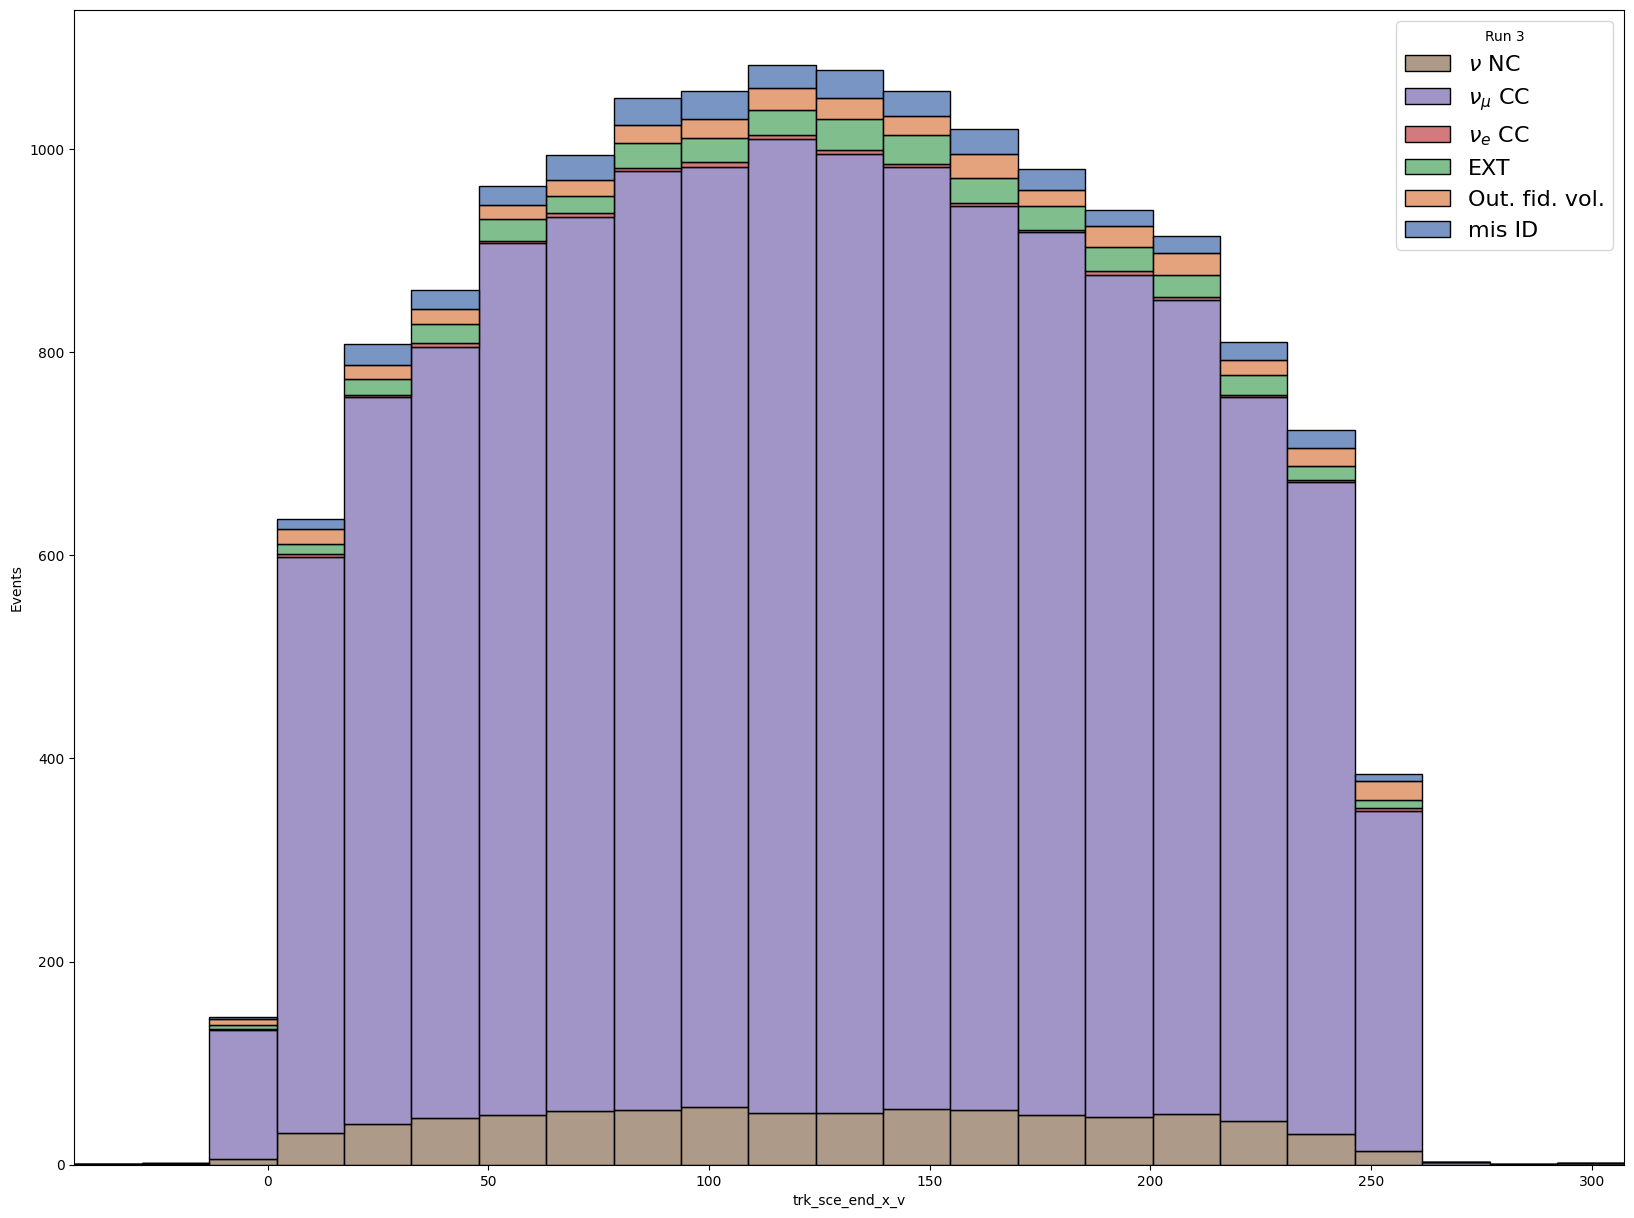

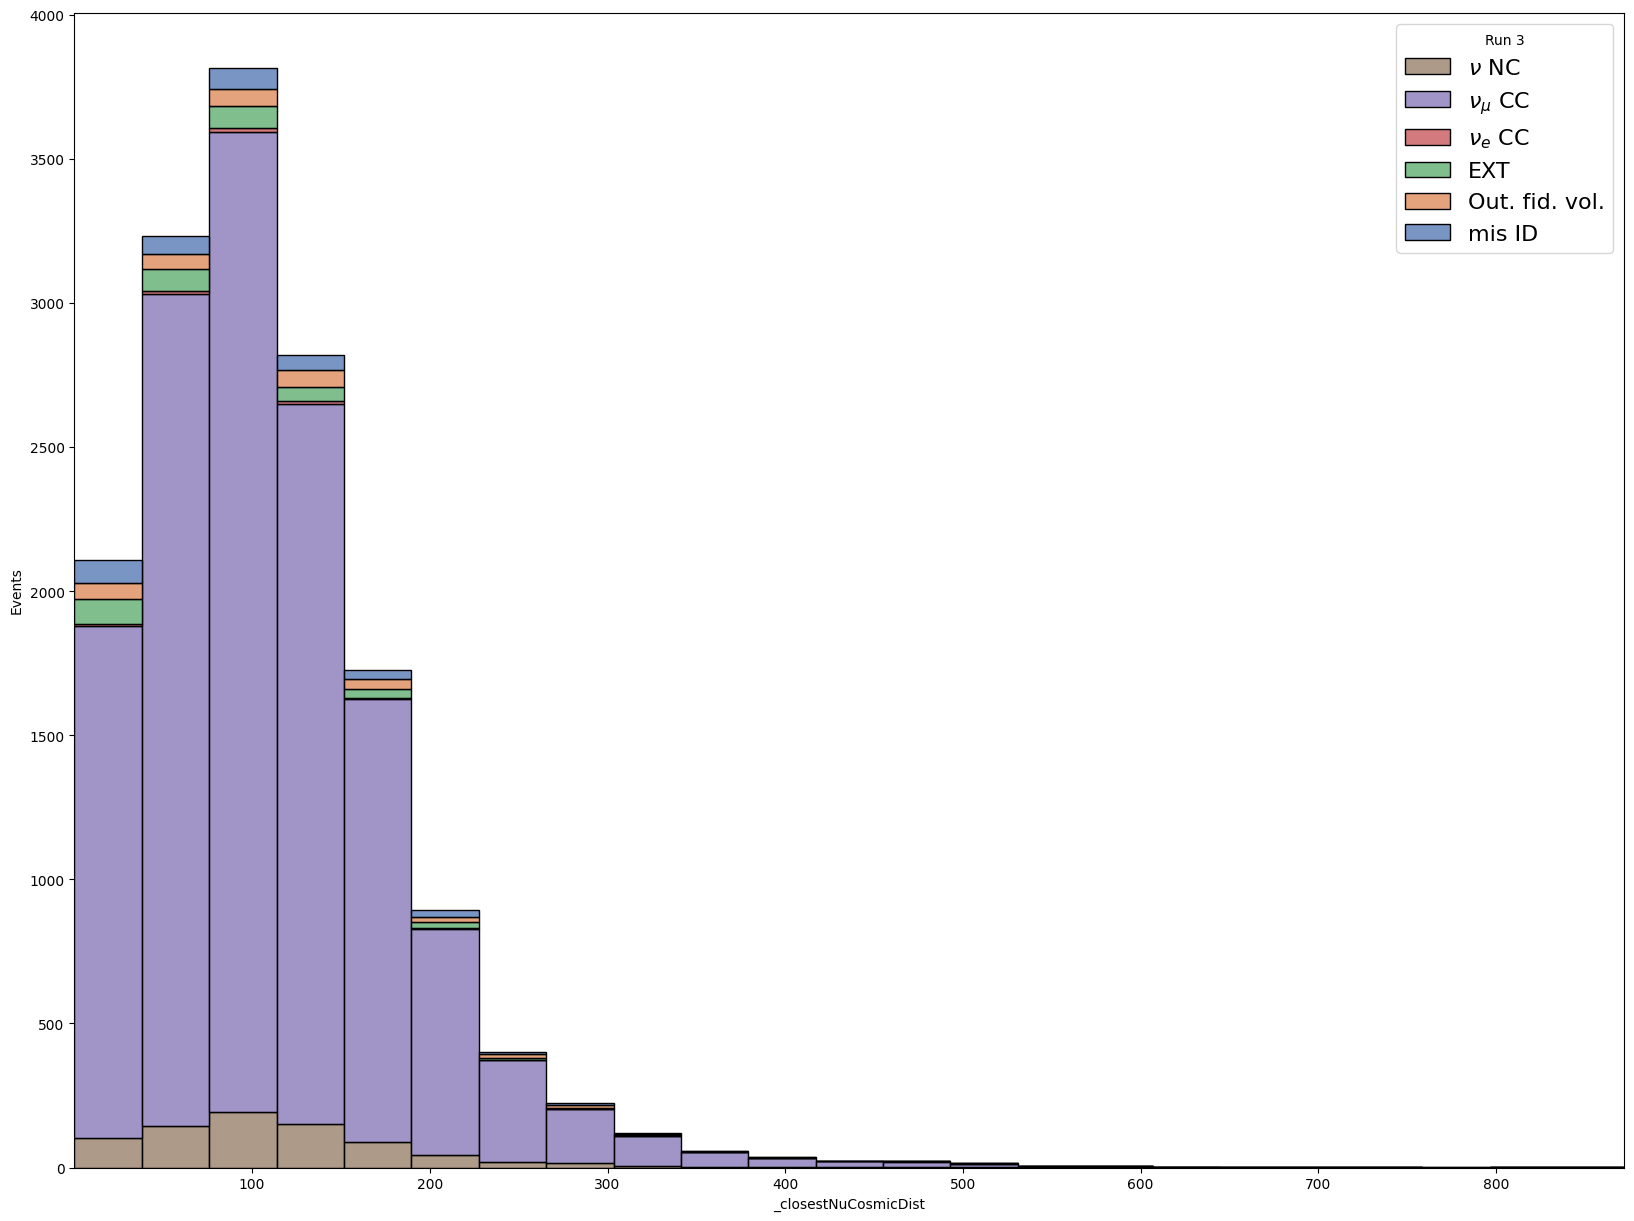

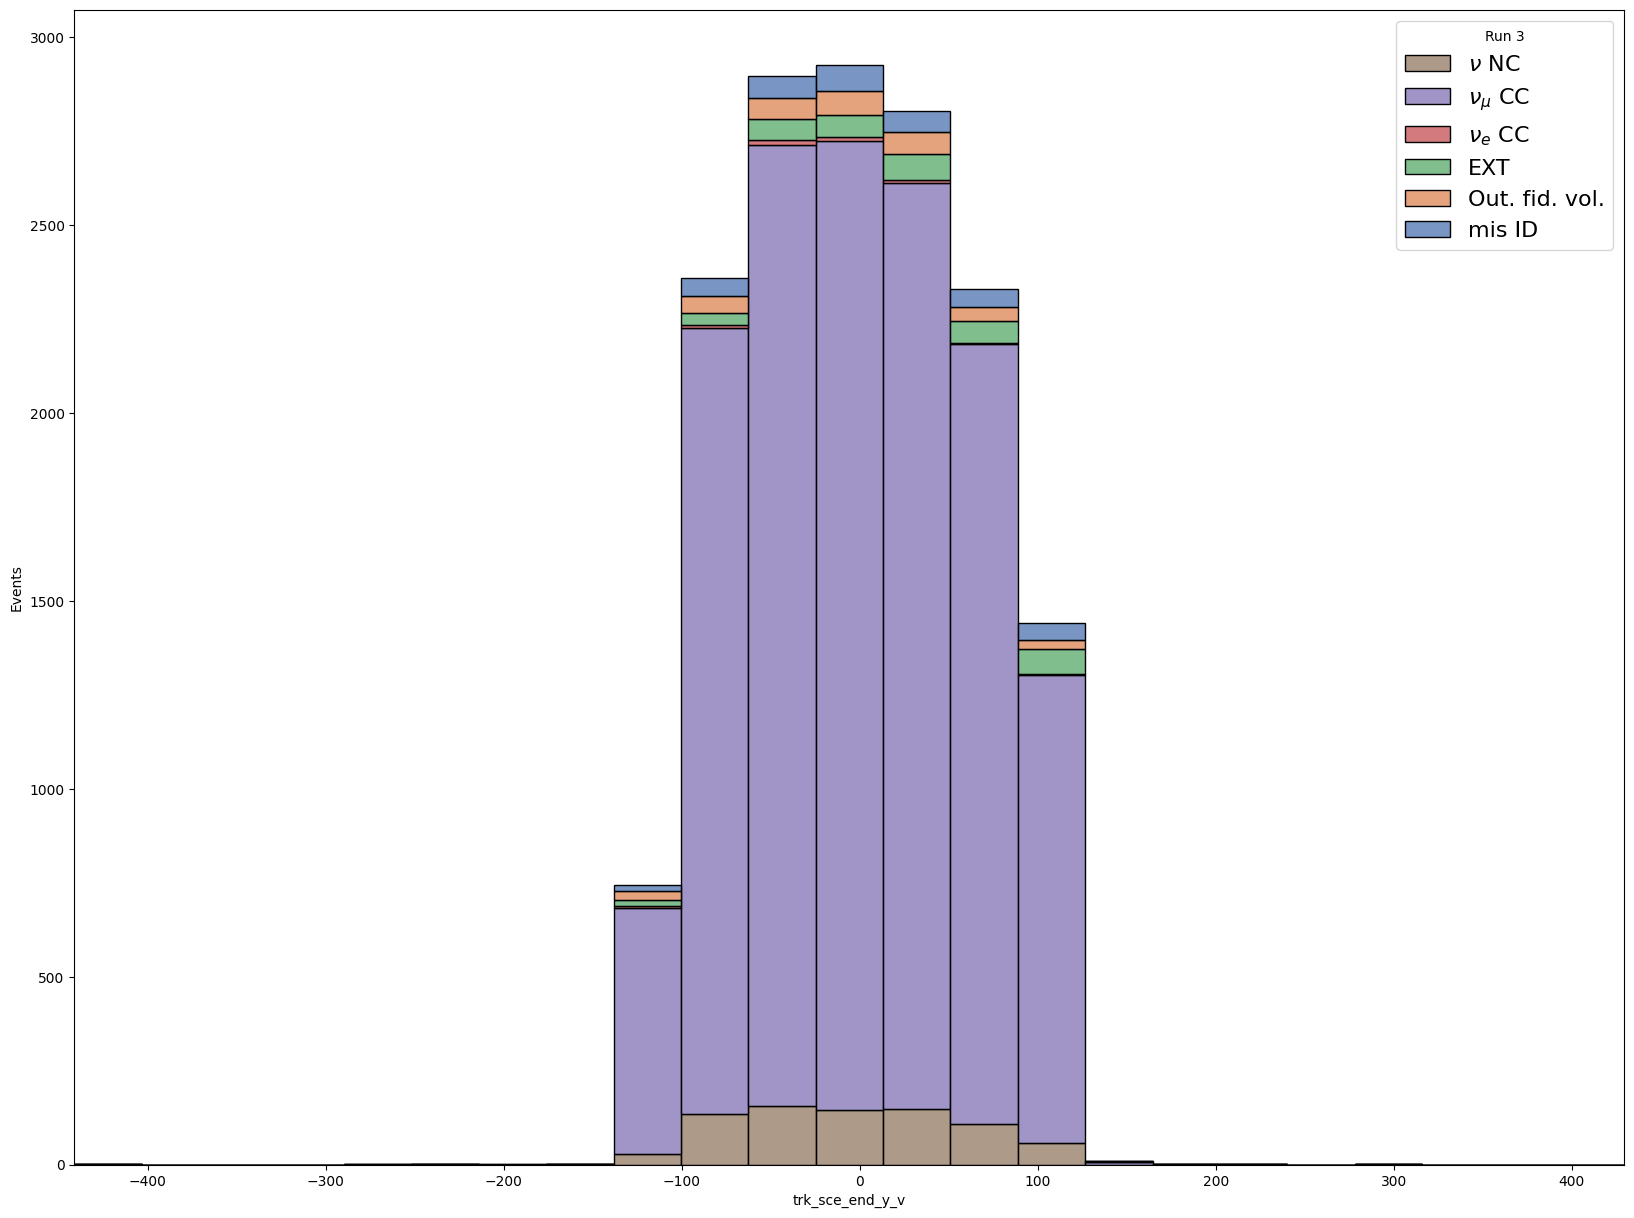

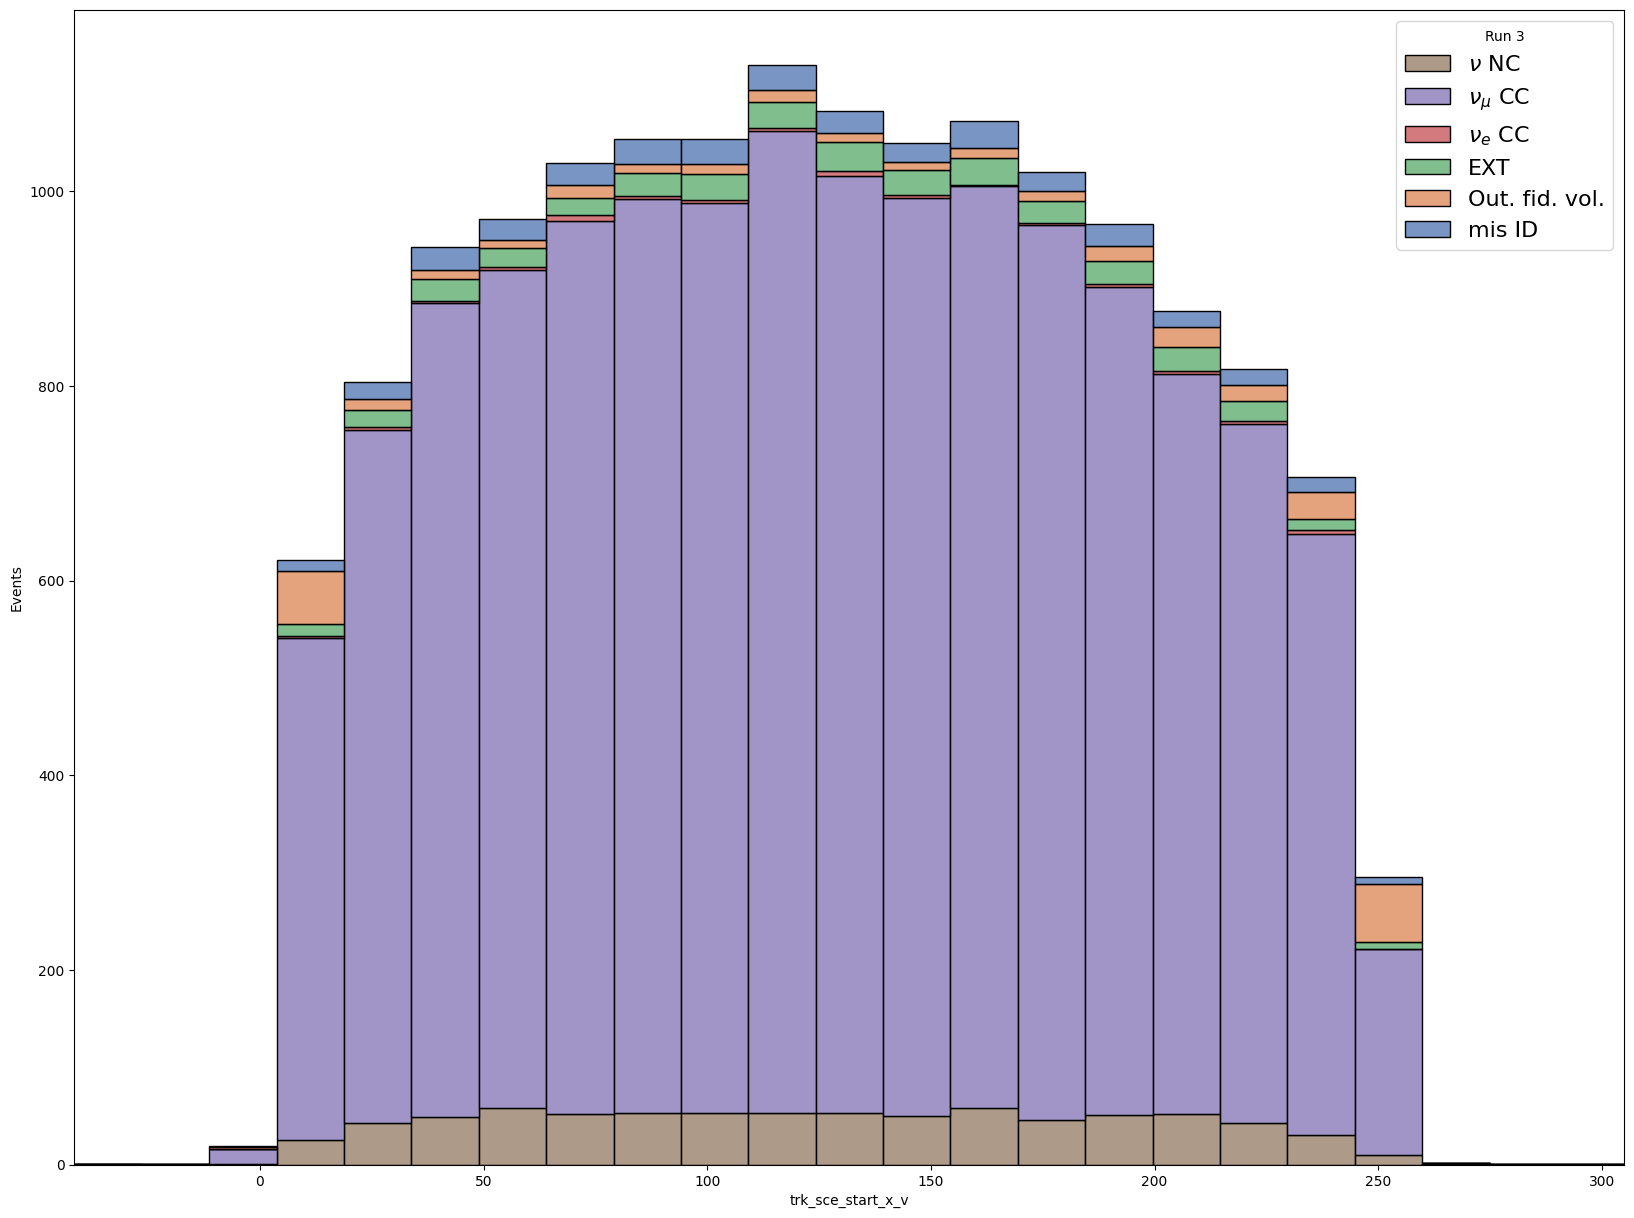

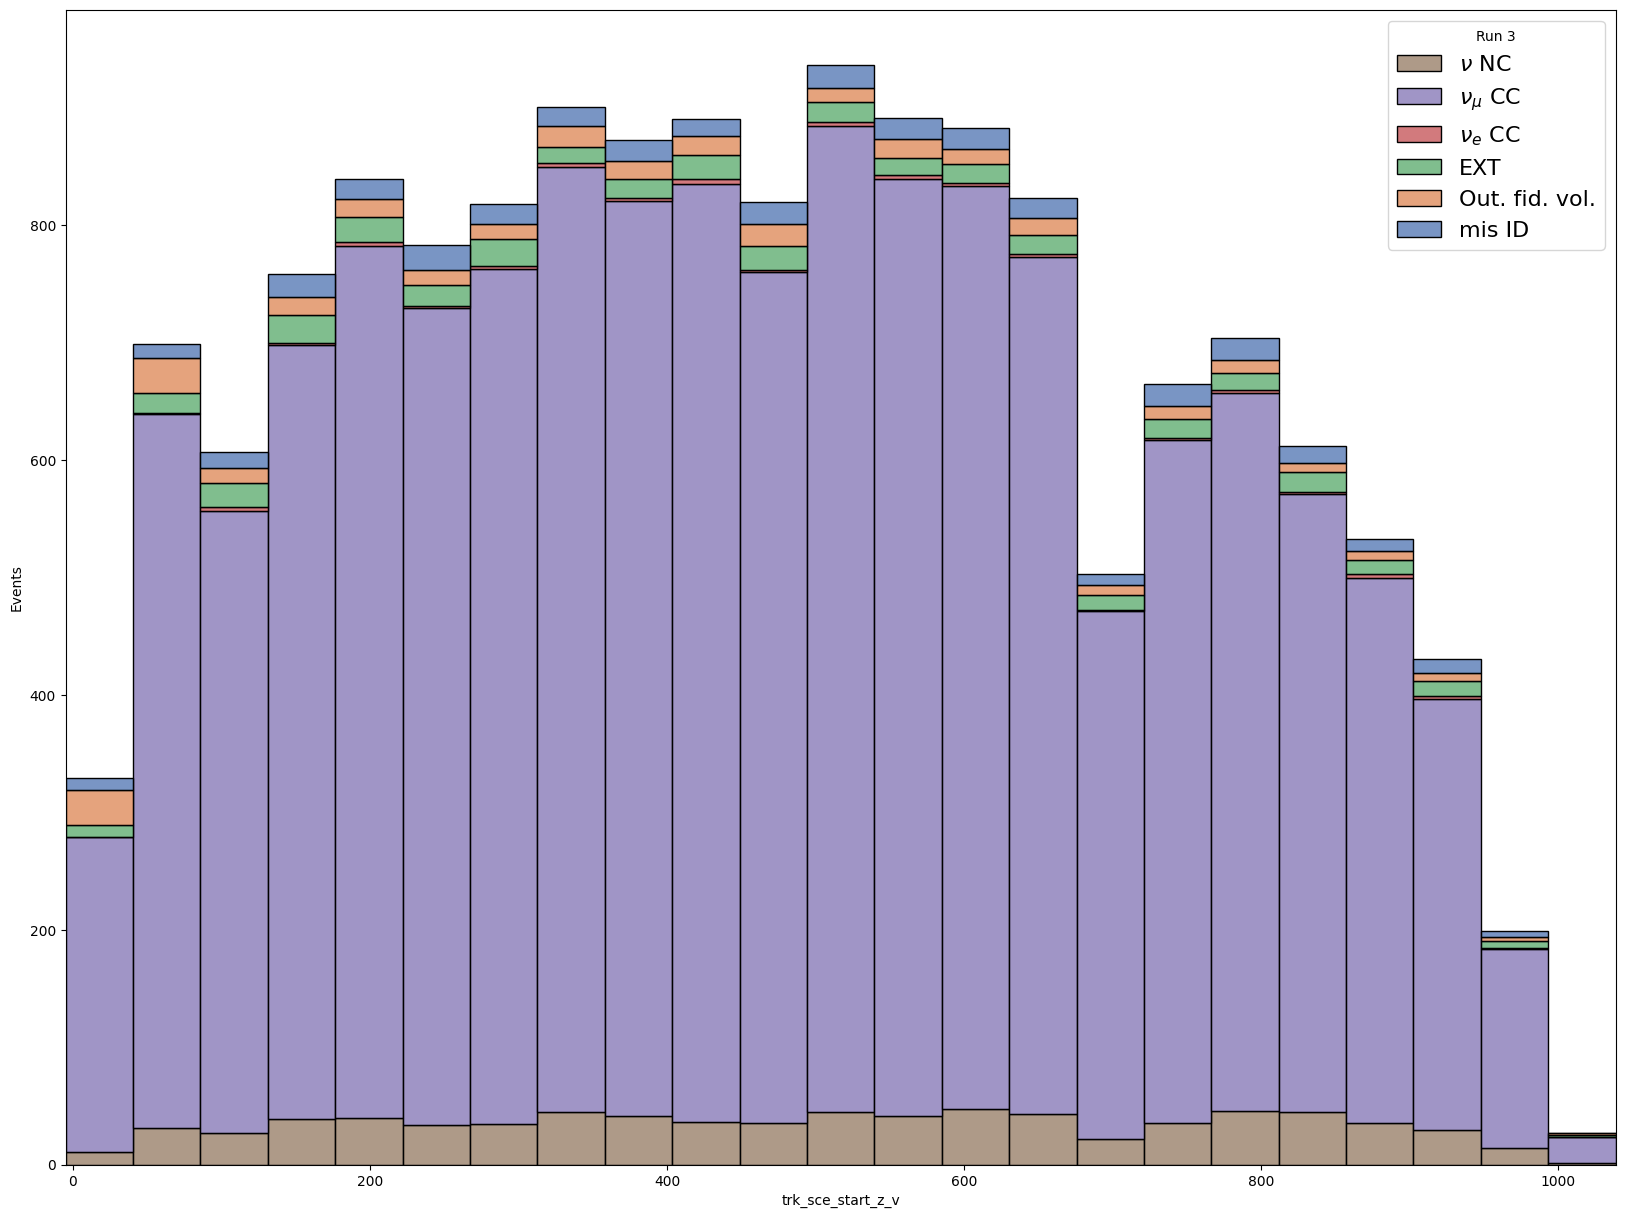

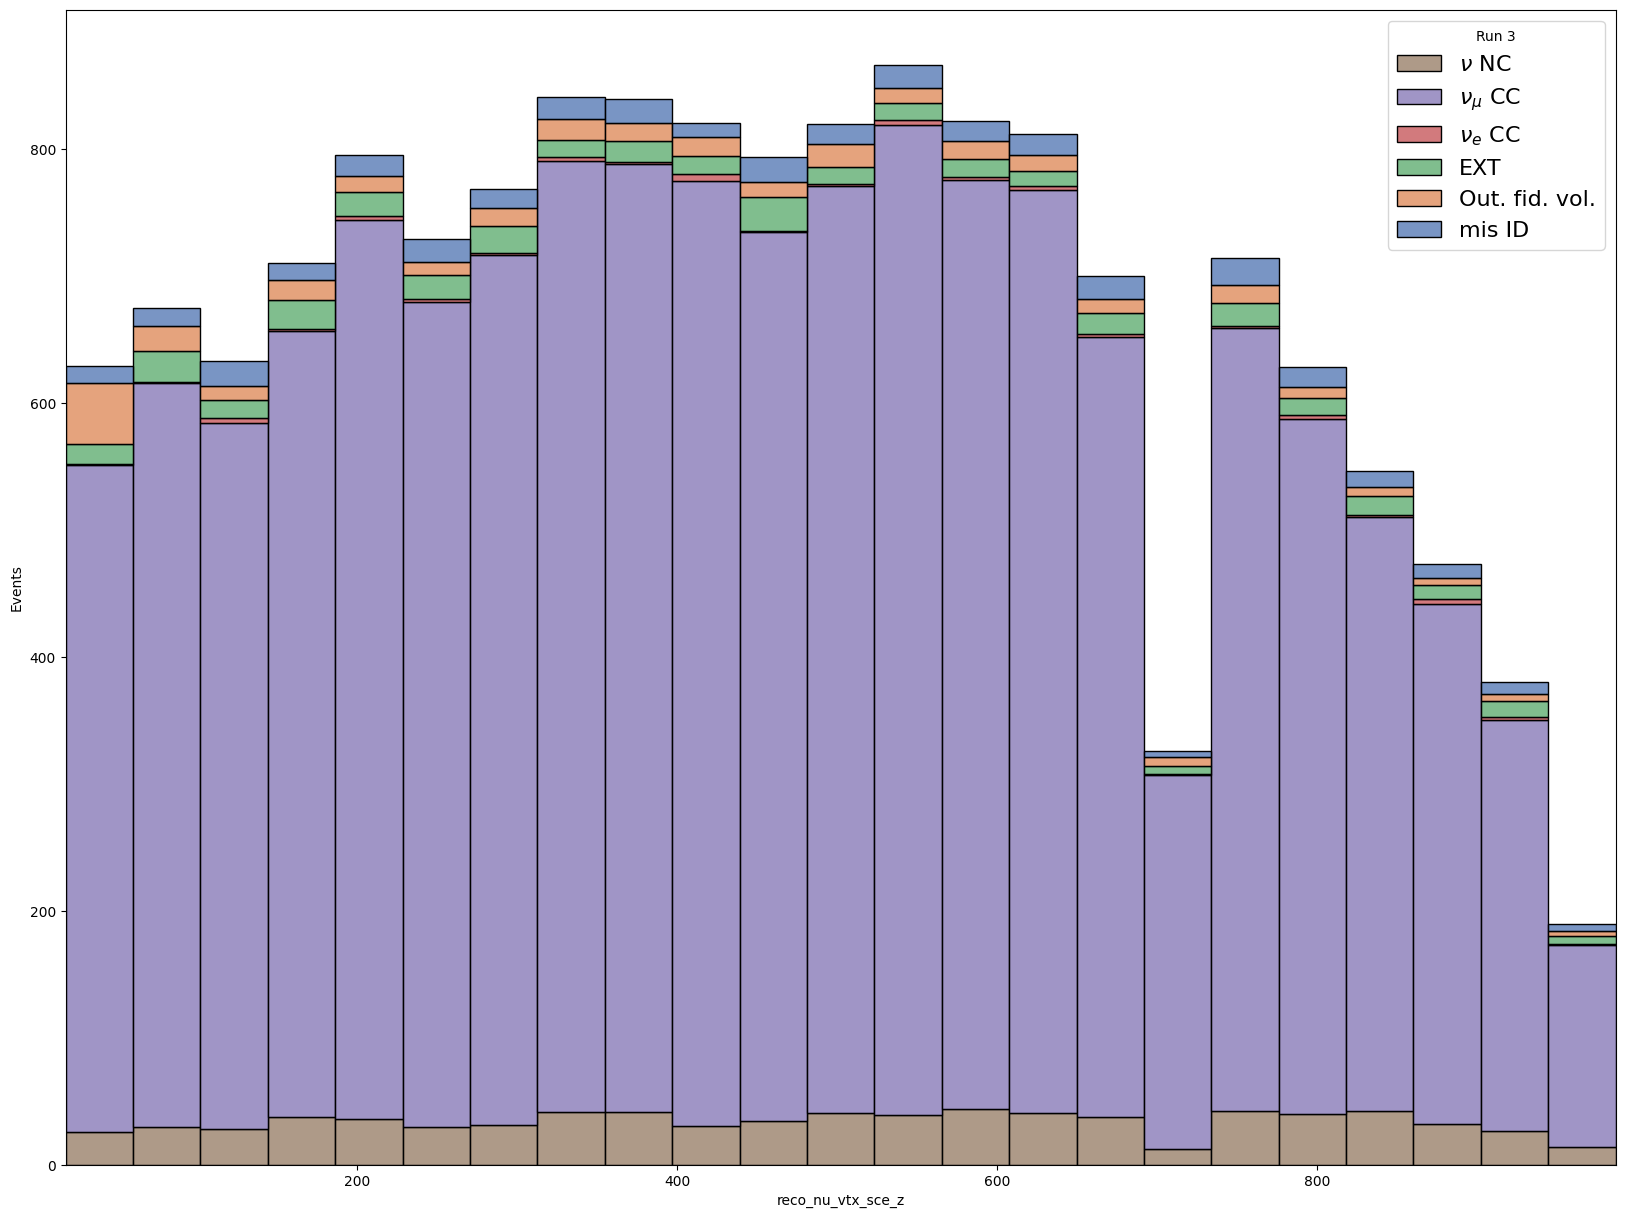

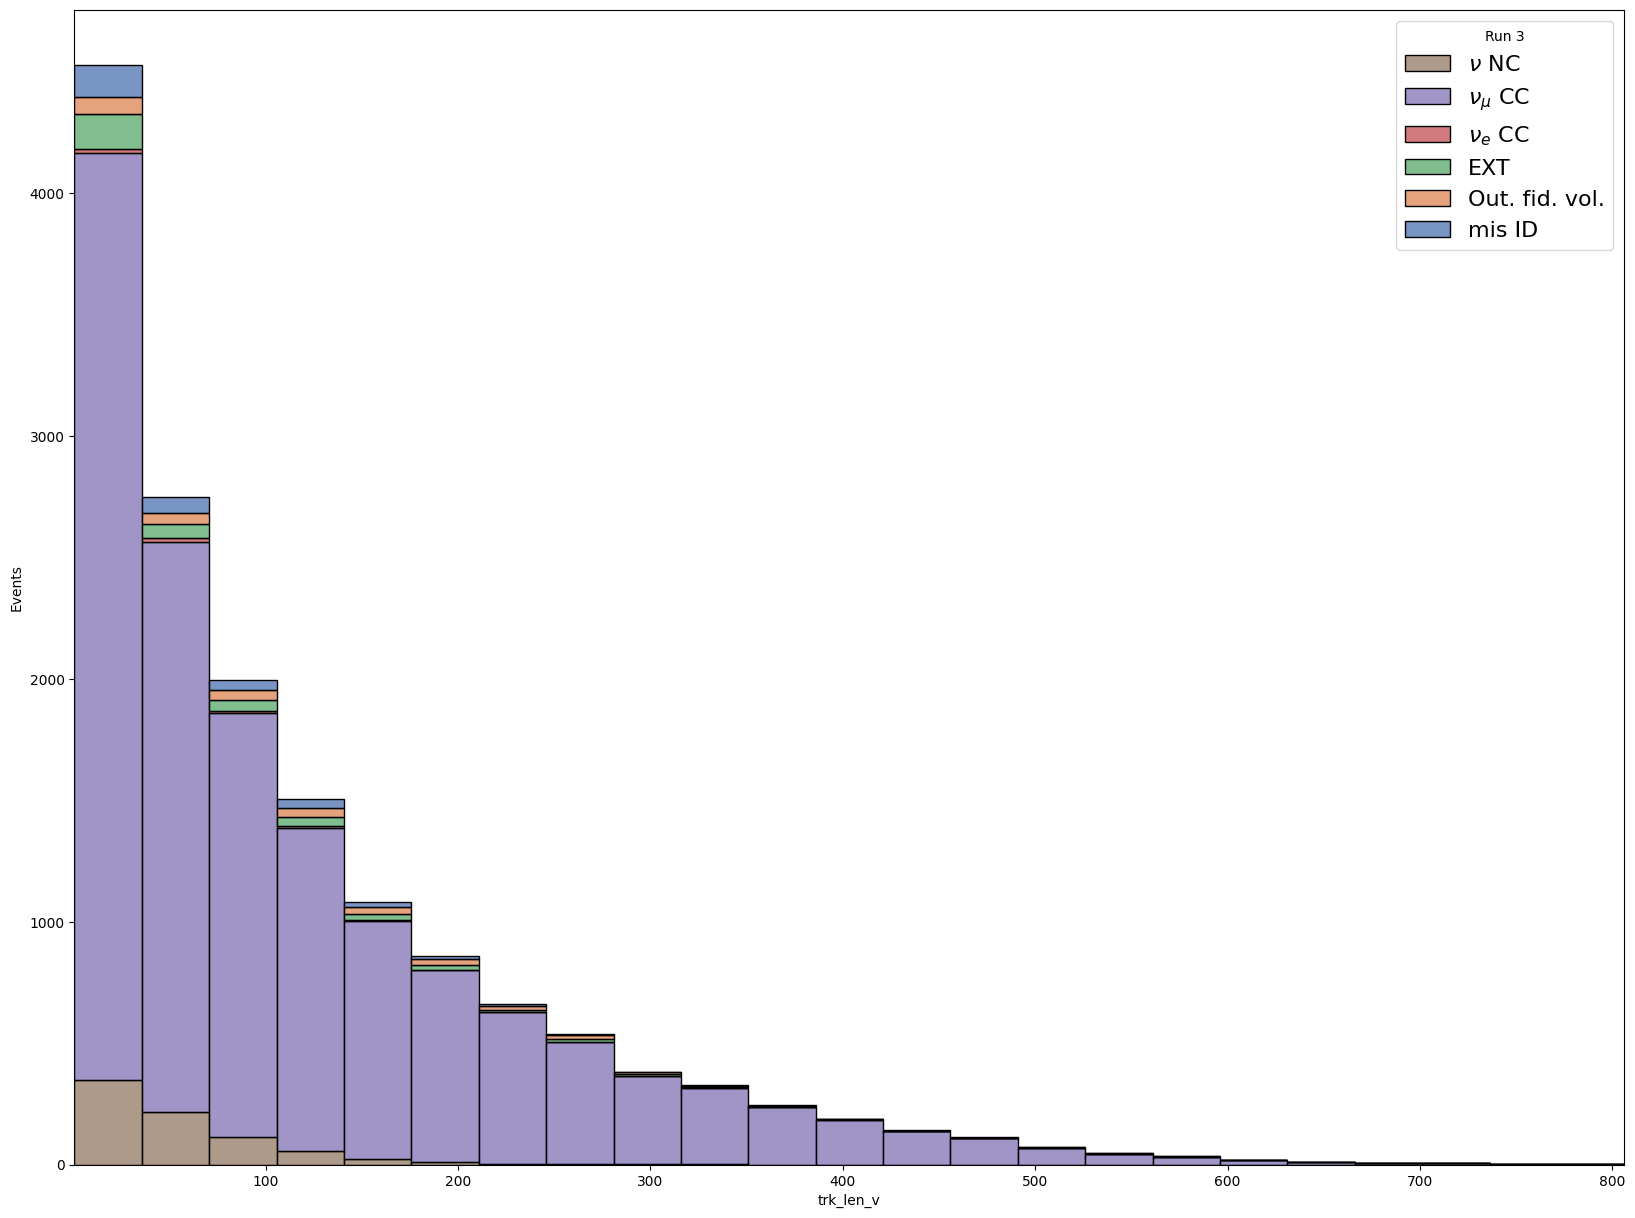

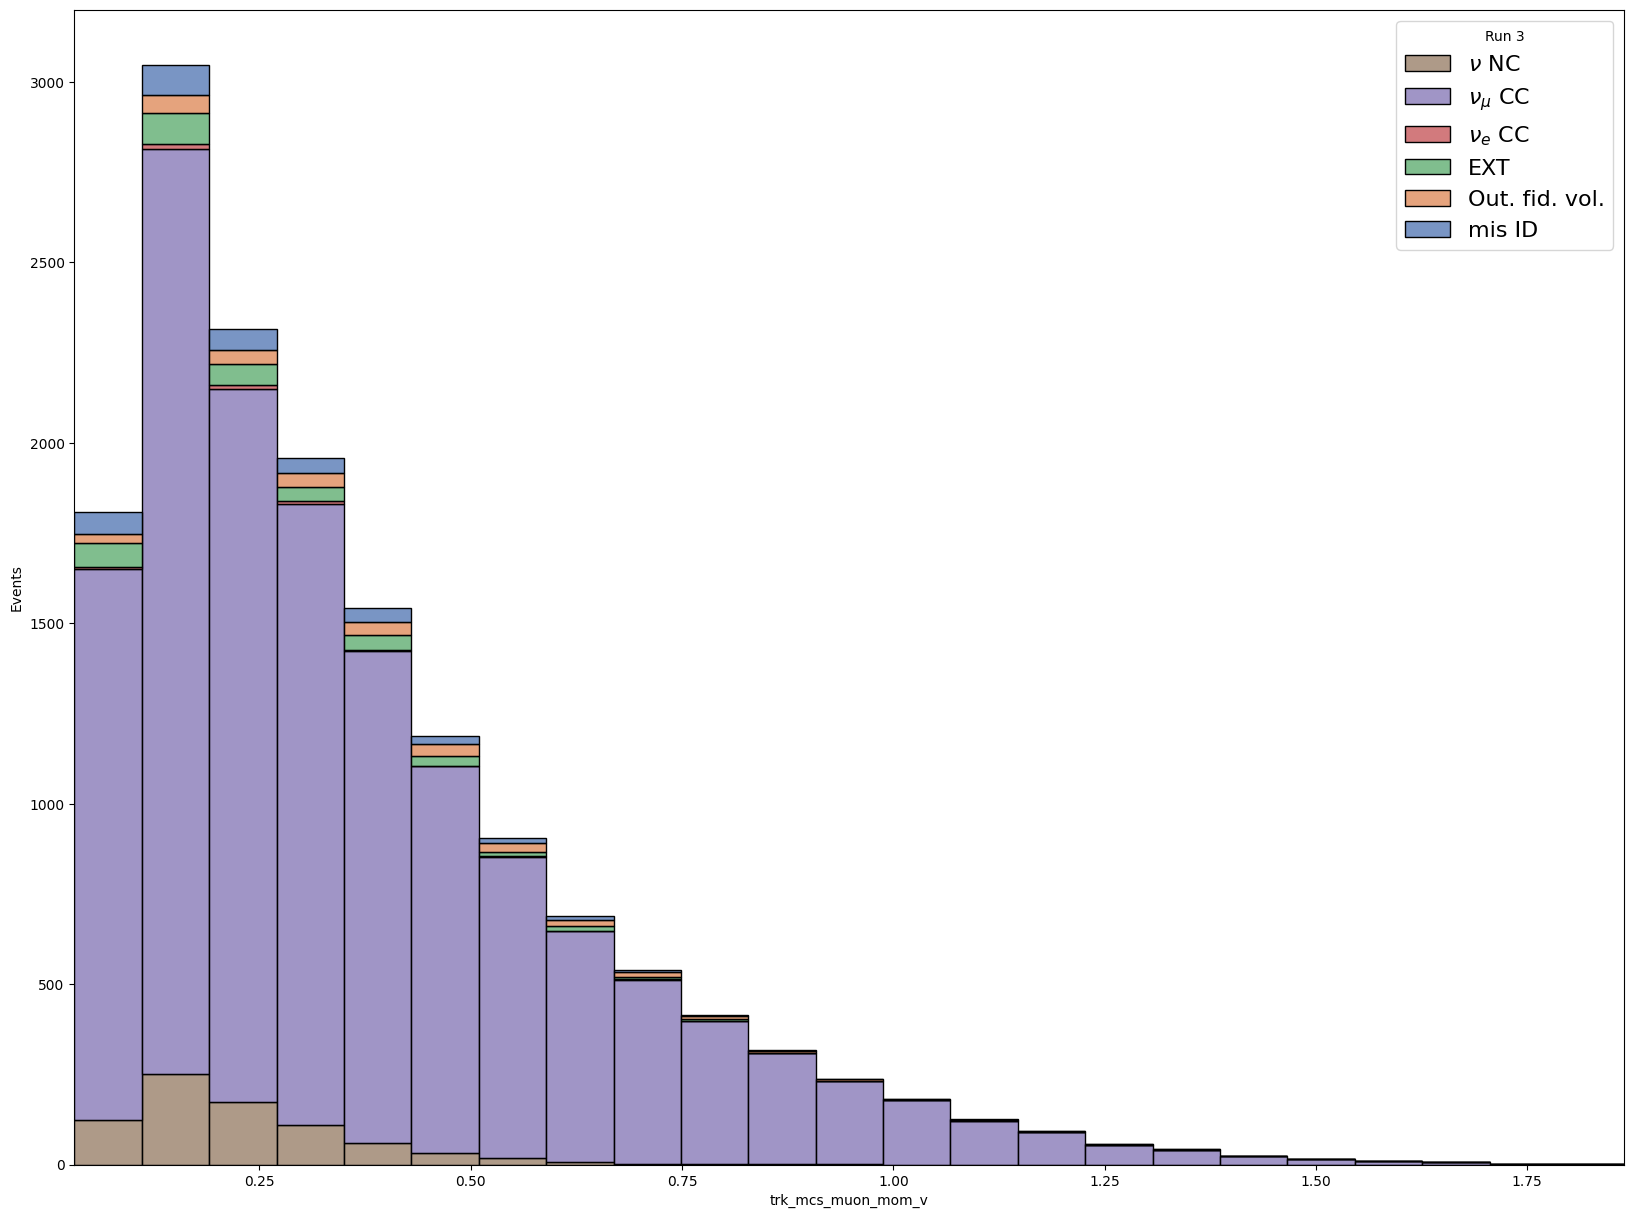

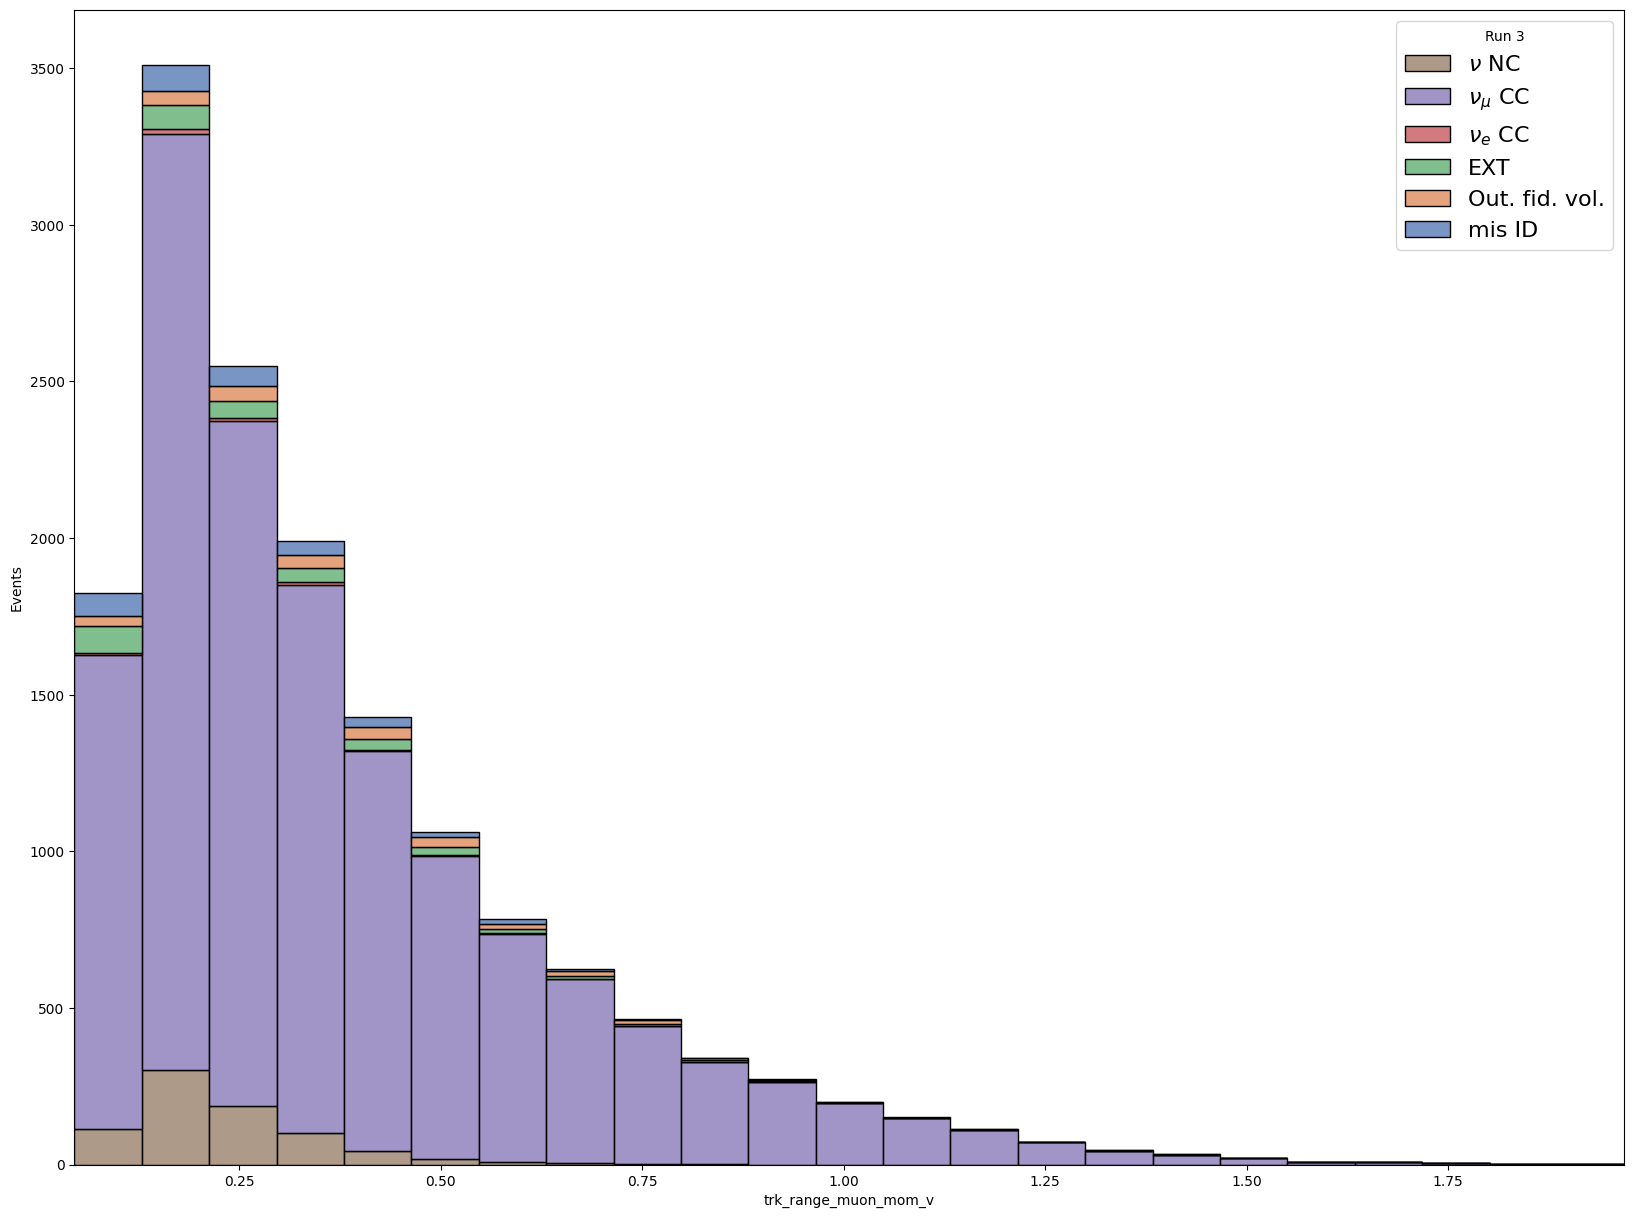

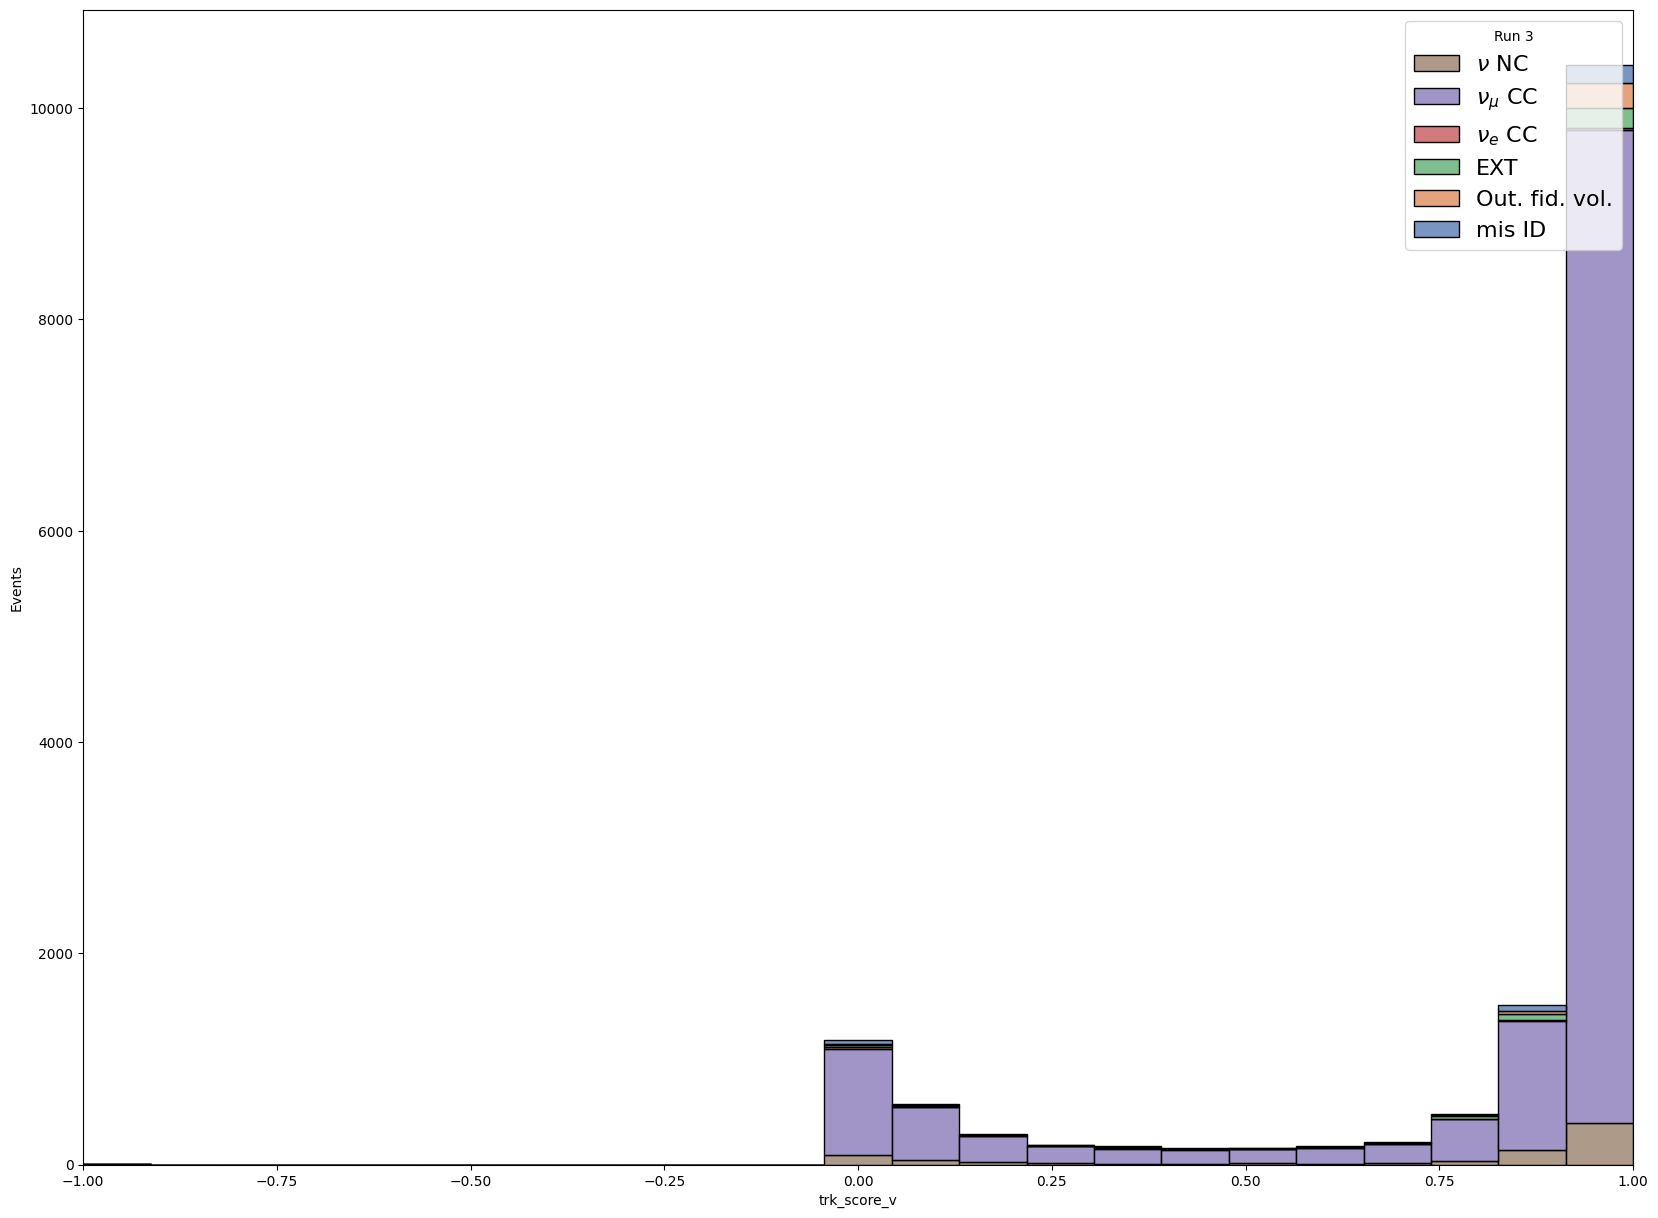

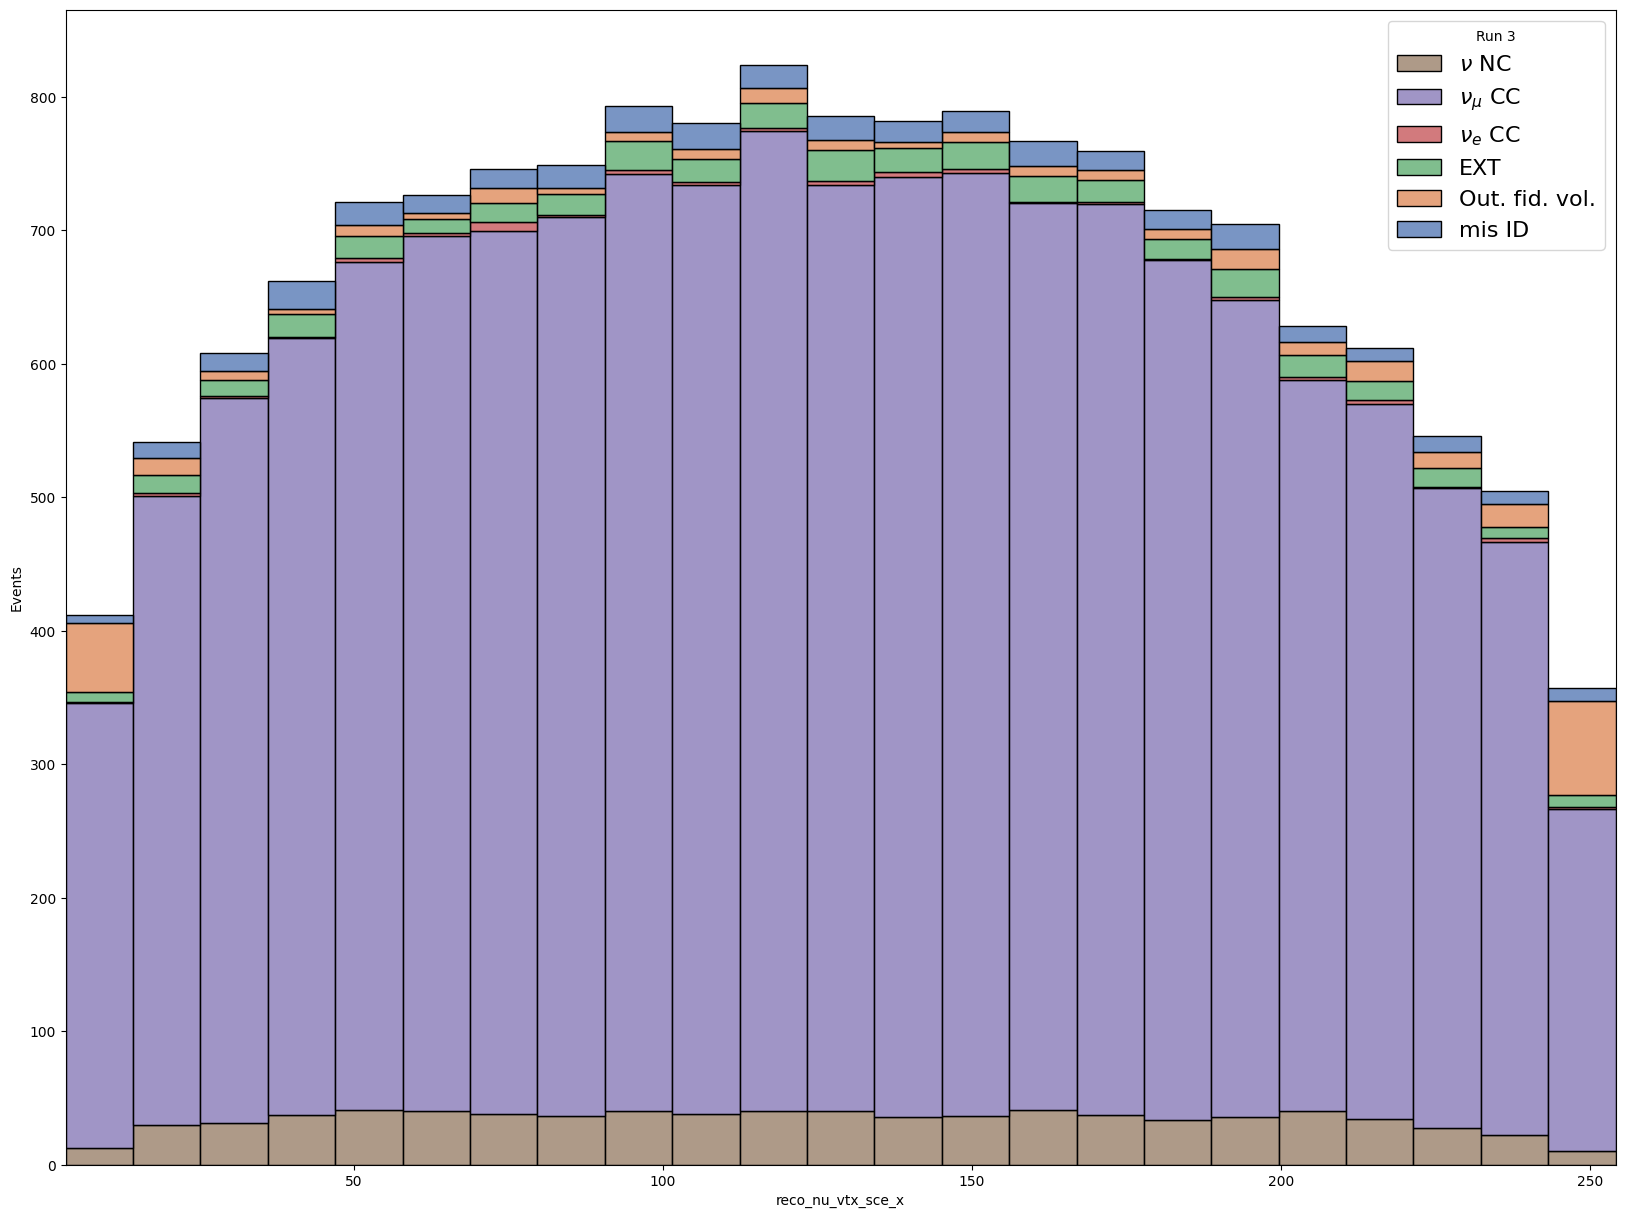

In [ ]:
# Simple histogram plot of one variable.
#BIN = 23
#plt.figure(figsize=(20,15))
#i = sns.histplot(data=MC_EXT, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
#i.set(xlabel='trk_energy_tot', ylabel = "Events")

#plt.yscale('log')
#plt.xlim([np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])])
#plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
#plt.show(i)

for variable in all_variables_to_plot:
    BIN = 23
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT_cuts, x=variable, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cuts['weight'], bins = BIN, legend = False)
    i.set(xlabel=variable, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT_cuts[variable]), np.max(MC_EXT_cuts[variable])])
    #plt.xticks(np.arange(np.min(MC_EXT[variable]), np.max(MC_EXT[variable]), 0.1))
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    plt.show(i)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

[1.         0.60736005]
[0.72869615 0.88307759]


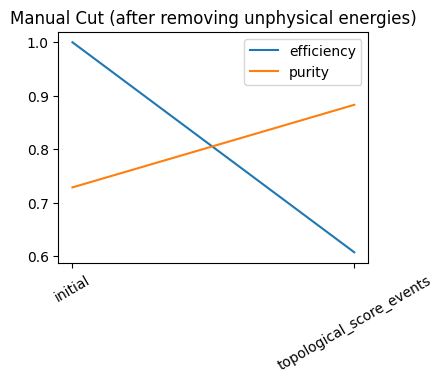

In [31]:
events = np.array(selections[1])
muon_events = np.array(selections[2])
#print(events)
efficiency = events/events[0]
purity = muon_events/events
print(efficiency)
print(purity)

cuts = np.array(['initial','topological_score_events'])
           #      'trk_sce_start_x_v_events', 'trk_sce_start_y_v_events', 'trk_sce_start_z_v_events', 'trk_sce_end_x_v_events', 
            #  'trk_sce_end_y_v_events', 'trk_sce_end_z_v_events', 'trk_distance_v_events', 'reco_nu_vtx_sce_x_events', 'reco_nu_vtx_sce_y_events',
             # 'reco_nu_vtx_sce_z_events', 'trk_len_v_events', 'trk_score_v_events', 'trk_llr_pid_score_v_events'])

plt.figure(figsize=(4,3))
plt.title("Manual Cut (after removing unphysical energies)")
plt.plot(np.linspace(1,2,2),efficiency,label="efficiency")
plt.plot(np.linspace(1,2,2),purity,label="purity")
plt.xticks(np.linspace(1,2,2), labels = cuts, rotation = 30)
plt.legend()
plt.show()

In [39]:
def Individual_Selections(frame):
    
    # Basic variables present in dataframe 
    trk_sce_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_sce_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_sce_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_sce_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_sce_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_sce_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_nu_vtx_sce_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_nu_vtx_sce_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_nu_vtx_sce_z = frame['reco_nu_vtx_sce_z']               # cm
    topological_score = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_distance_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    trk_llr_pid_score_v = frame['trk_llr_pid_score_v']
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    trk_sce_start_x_v_selection = ((trk_sce_start_x_v > 5) & (trk_sce_start_x_v < 250))
    trk_sce_start_y_v_selection = ((trk_sce_start_y_v > -110) & (trk_sce_start_y_v < 110))
    trk_sce_start_z_v_selection = ((trk_sce_start_z_v > 30) & (trk_sce_start_z_v < 990))
    trk_sce_end_x_v_selection = ((trk_sce_end_x_v > 0) & (trk_sce_end_x_v < 250))
    trk_sce_end_y_v_selection = ((trk_sce_end_y_v > -120) & (trk_sce_end_y_v < 110))
    trk_sce_end_z_v_selection = ((trk_sce_end_z_v > 10) & (trk_sce_end_z_v < 1030))
    trk_distance_v_selection = (trk_distance_v < 10)
    reco_nu_vtx_sce_x_selection = ((reco_nu_vtx_sce_x > 5) & (reco_nu_vtx_sce_x < 250))
    reco_nu_vtx_sce_y_selection = ((reco_nu_vtx_sce_y > -110) & (reco_nu_vtx_sce_y < 105))
    reco_nu_vtx_sce_z_selection = ((reco_nu_vtx_sce_z > 30) & (reco_nu_vtx_sce_z < 980))
    trk_len_v_selection =  ((trk_len_v > 0) & (trk_len_v < 1037))
    trk_score_v_selection = (trk_score_v > 0.9)
    topological_score_selection = (topological_score > 0.4)
    trk_llr_pid_score_v_selection = (trk_llr_pid_score_v > 0.9)
    trk_energy_tot_selection = (trk_energy_tot < 2)
    
    
    # Apply selection on dataframe
    total_events = len(frame.index)
    muon_total_events = len(frame[frame['category']==21].index)
    
    frame1 = frame[trk_sce_start_x_v_selection]
    trk_sce_start_x_v_events = len(frame1.index)
    muon_trk_sce_start_x_v_events = len(frame1[frame1['category']==21].index)
    
    frame2 = frame[trk_sce_start_y_v_selection]
    trk_sce_start_y_v_events = len(frame2.index)
    muon_trk_sce_start_y_v_events = len(frame2[frame2['category']==21].index)
    
    frame3 = frame[trk_sce_start_z_v_selection]
    trk_sce_start_z_v_events = len(frame3.index)
    muon_trk_sce_start_z_v_events = len(frame3[frame3['category']==21].index)
    
    frame4 = frame[trk_sce_end_x_v_selection]
    trk_sce_end_x_v_events = len(frame4.index)
    muon_trk_sce_end_x_v_events = len(frame4[frame4['category']==21].index)
    
    frame5 = frame[trk_sce_end_y_v_selection]
    trk_sce_end_y_v_events = len(frame5.index)
    muon_trk_sce_end_y_v_events = len(frame5[frame5['category']==21].index)
    
    frame6 = frame[trk_sce_end_z_v_selection]
    trk_sce_end_z_v_events = len(frame6.index)
    muon_trk_sce_end_z_v_events = len(frame6[frame6['category']==21].index)
    
    frame7 = frame[trk_distance_v_selection]
    trk_distance_v_events = len(frame7.index)
    muon_trk_distance_v_events = len(frame7[frame7['category']==21].index)
    
    frame8 = frame[reco_nu_vtx_sce_x_selection]
    reco_nu_vtx_sce_x_events = len(frame8.index)
    muon_reco_nu_vtx_sce_x_events = len(frame8[frame8['category']==21].index)
    
    frame9 = frame[reco_nu_vtx_sce_y_selection]
    reco_nu_vtx_sce_y_events = len(frame9.index)
    muon_reco_nu_vtx_sce_y_events = len(frame9[frame9['category']==21].index)
    
    frame10 = frame[reco_nu_vtx_sce_z_selection]
    reco_nu_vtx_sce_z_events = len(frame10.index)
    muon_reco_nu_vtx_sce_z_events = len(frame10[frame10['category']==21].index)
    
    frame11 = frame[trk_len_v_selection]
    trk_len_v_events = len(frame11.index)
    muon_trk_len_v_events = len(frame11[frame11['category']==21].index)
    
    frame12 = frame[trk_score_v_selection]
    trk_score_v_events = len(frame12.index)
    muon_trk_score_v_events = len(frame12[frame12['category']==21].index)
    
    frame13 = frame[topological_score_selection]
    topological_score_events = len(frame13.index)
    muon_topological_score_events = len(frame13[frame13['category']==21].index)
    
    frame14 = frame[trk_llr_pid_score_v_selection]
    trk_llr_pid_score_v_events = len(frame14.index)
    muon_trk_llr_pid_score_v_events = len(frame14[frame14['category']==21].index)
    
    frame15 = frame[trk_energy_tot_selection]
    trk_energy_tot_events = len(frame15.index)
    muon_trk_energy_tot_events = len(frame15[frame15['category']==21].index)

    events = [total_events, trk_sce_start_x_v_events, trk_sce_start_y_v_events, trk_sce_start_z_v_events, trk_sce_end_x_v_events, 
              trk_sce_end_y_v_events, trk_sce_end_z_v_events, trk_distance_v_events, reco_nu_vtx_sce_x_events, reco_nu_vtx_sce_y_events,
              reco_nu_vtx_sce_z_events, trk_len_v_events, trk_score_v_events, topological_score_events, trk_llr_pid_score_v_events,
              trk_energy_tot_events]
    muon_events = [muon_total_events, muon_trk_sce_start_x_v_events, muon_trk_sce_start_y_v_events, muon_trk_sce_start_z_v_events, muon_trk_sce_end_x_v_events, 
              muon_trk_sce_end_y_v_events, muon_trk_sce_end_z_v_events, muon_trk_distance_v_events, muon_reco_nu_vtx_sce_x_events, muon_reco_nu_vtx_sce_y_events,
              muon_reco_nu_vtx_sce_z_events, muon_trk_len_v_events, muon_trk_score_v_events, muon_topological_score_events, muon_trk_llr_pid_score_v_events,
              muon_trk_energy_tot_events]
    
    return events, muon_events

individual_selections = Individual_Selections(MC_EXT)

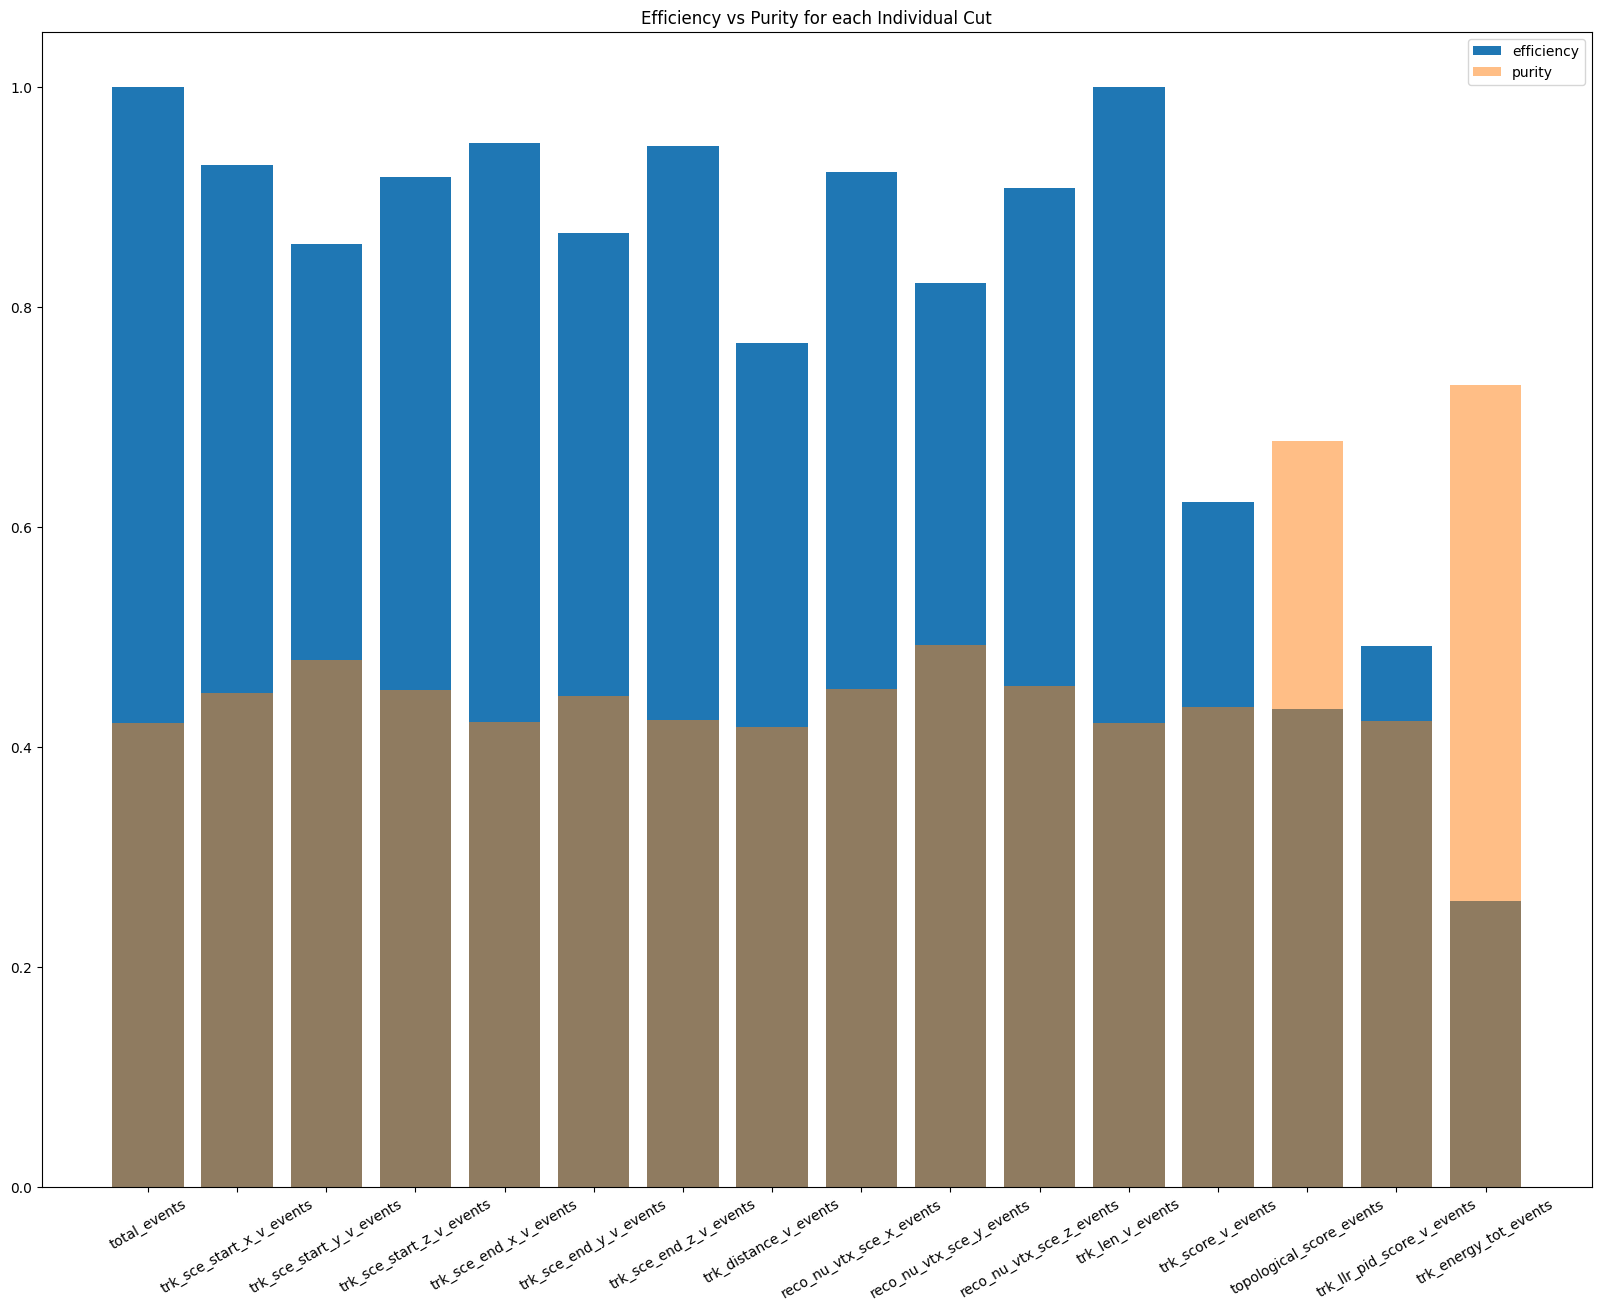

In [40]:
individual_events = np.array(individual_selections[0])
individual_muon_events = np.array(individual_selections[1])
#print(individual_events, individual_muon_events)
individual_efficiency = individual_events/individual_events[0]
individual_purity = individual_muon_events/individual_events

individual_cuts = np.array(['total_events', 'trk_sce_start_x_v_events', 'trk_sce_start_y_v_events', 'trk_sce_start_z_v_events', 'trk_sce_end_x_v_events', 
              'trk_sce_end_y_v_events', 'trk_sce_end_z_v_events', 'trk_distance_v_events', 'reco_nu_vtx_sce_x_events', 'reco_nu_vtx_sce_y_events',
              'reco_nu_vtx_sce_z_events', 'trk_len_v_events', 'trk_score_v_events', 'topological_score_events', 'trk_llr_pid_score_v_events',
              'trk_energy_tot_events'])

plt.figure(figsize=(20,15))
plt.title("Efficiency vs Purity for each Individual Cut")
plt.bar(np.linspace(1,16,16),individual_efficiency,label="efficiency")
plt.bar(np.linspace(1,16,16),individual_purity,label="purity",alpha=0.5)
plt.xticks(np.linspace(1,16,16), labels = individual_cuts, rotation = 30)
plt.legend()
plt.show()

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

In [41]:
def histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig = True, plot_data = False, logscale = None, dataFrame = None, Stat_func = None):
    """
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe
    """    
    #x = 0.5*(bins[1:]+ bins[:-1])
    if (isinstance(MC_frame,pd.core.frame.DataFrame) != True):
        
        print("\"MC_frame\" argument needs to be a pandas dataframe. Cannot plot.")
        
    
    else:
    
        
        fig_MC_temp = plt.figure(figsize=(15,10))

        temp_MC = sns.histplot(data=MC_frame, x= variable , weights = scaling, bins=bins, binrange=xlims, legend = False)
        bars = temp_MC.patches
        MC_heights = [patch.get_height() for patch in bars]
        x = [patch.get_x() for patch in bars]
        w = [patch.get_width() for patch in bars]
        new_bins = [start+w[0]/2 for start in x]
        plt.close(fig_MC_temp)
        
        if(Stat_func is None):
            UNC_frac = 0.15
            UNC = UNC_frac*np.array(MC_heights)  
            
        if(Stat_func is not None):
            UNC_stat = Stat_func(MC_heights)
            UNC_frac = np.sqrt((0.15**2)+(UNC_stat**2))
            UNC = UNC_frac*np.array(MC_heights)

        fig = plt.figure(figsize=(15,10))
        
        labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID", r"Uncertainty"]
        sns.histplot(data=MC_frame, x= variable , hue="category", multiple="stack", palette = 'deep', weights = scaling, bins=bins, binrange=xlims, legend = False)
        plt.bar(new_bins, 2*UNC, width = w, bottom = np.array(MC_heights)-UNC, color='grey', alpha=0.7, hatch='/')

        plt.legend(title='Run 3', loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID",  r"Uncertainty"])
    
        if (isinstance(dataFrame,pd.core.frame.DataFrame) and plot_data == True):
            fig_data = plt.figure(figsize=(15,10))
            Data_fig = sns.histplot(data=dataFrame, x=variable, bins=bins, binrange=xlims, legend = False)
            bars = Data_fig.patches
        
            heights = [patch.get_height() for patch in bars]
            x = [patch.get_x() for patch in bars]
            w = [patch.get_width() for patch in bars]
            plt.close(fig_data)
            
            ## If these variables are deleted than data has 1 less bin than MC
            #del x[-1]
            #del heights[-1]
            
            new_bins = [start+w[0]/2 for start in x]
            #y_real = np.array(y_real)
            plt.errorbar(new_bins, heights , xerr=w[0]/2, fmt='.k')
            plt.legend(title='Run 3', loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID",  r"Uncertainty", r"Data"])

    
        elif(isinstance(dataFrame,pd.core.frame.DataFrame) != True and plot_data == True):
            print("\"dataFrame\" argument needs to be a pandas dataframe." + "\n" + "Just plotting Monte Carlo.")
    
        if variable == 'trk_energy_tot':
            variable = r"Reconstructed $\nu_{\mu}$ energy (Gev)"
    
        if (logscale == True):
            plt.yscale('log')
            
        plt.xlabel(variable,fontsize = 20)
        plt.ylabel("Events",fontsize = 20)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        if (plot_fig == True):
            
            plt.savefig(name+'.jpg', dpi=300) 
            plt.show()
        else:
            plt.close()
        # return the heights of each bin for data and MC
        data_heights = heights

        return np.array(MC_heights), np.array(data_heights), np.array(UNC)

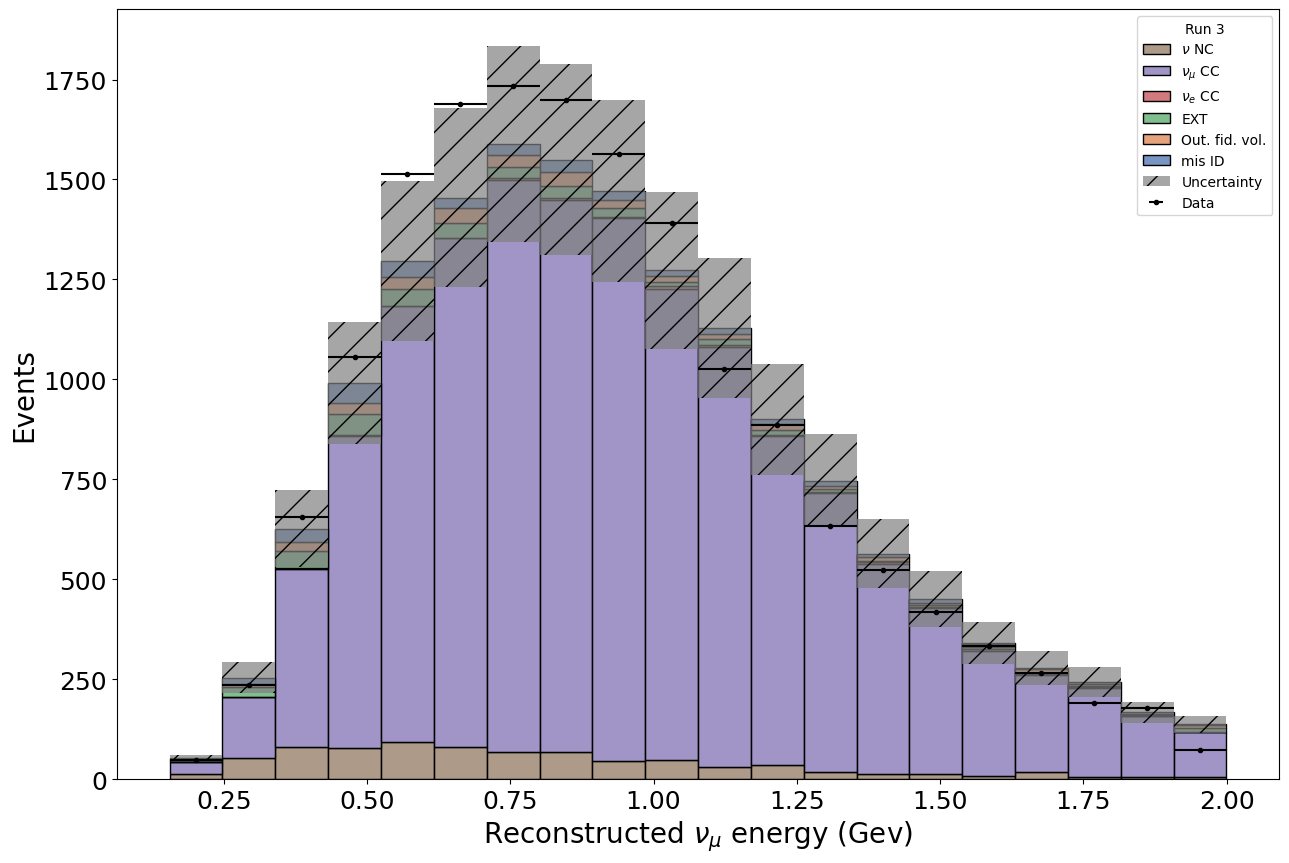

In [42]:
def poisson_error(x):
    return np.sqrt(np.mean(x))/np.mean(x)

energy_hist = Neutrino_functions.histogram_plot(MC_EXT_cuts, 'trk_energy_tot', 20, 'saved_figure_name', MC_EXT_cuts['weight'],xlims=[np.min(MC_EXT_cuts['trk_energy_tot']), np.max(MC_EXT_cuts['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame, Stat_func=poisson_error)

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [43]:
# 2-flavor oscillation probability function
def oscillation_probability(theta, delta, L, E):
    return theta * (np.sin((1.27*delta*L)/E))**2

print(oscillation_probability(0,0,MC_EXT_cuts['true_L'],MC_EXT_cuts['true_E']))

0         0.0
1         0.0
13        0.0
14        0.0
25        0.0
         ... 
555447    0.0
555508    0.0
555513    0.0
555514    0.0
555540    0.0
Length: 87588, dtype: float64


0         1.0
1         1.0
13        1.0
14        1.0
25        1.0
         ... 
555447    1.0
555508    1.0
555513    1.0
555514    1.0
555540    1.0
Length: 87588, dtype: float64


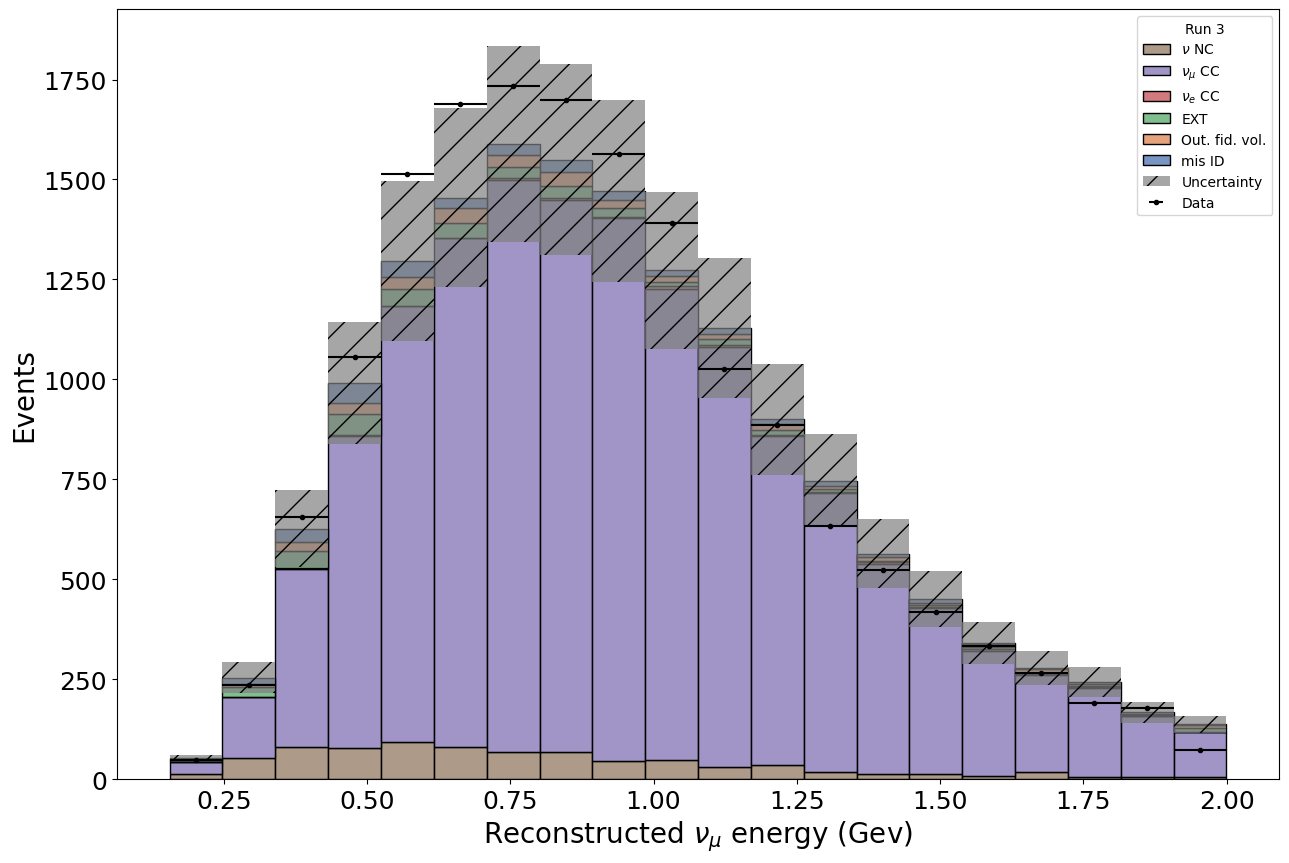

In [45]:
# muon disappearance application to reconstructed neutrino energy
disappearance = 1 - oscillation_probability(0,0,MC_EXT_cuts['true_L'],MC_EXT_cuts['true_E'])
print(disappearance)


disappearance_energy_hist = histogram_plot(MC_EXT_cuts, 'trk_energy_tot', 20, 'saved_figure_name', disappearance*MC_EXT_cuts['weight'],xlims=[np.min(MC_EXT_cuts['trk_energy_tot']), np.max(MC_EXT_cuts['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame, Stat_func=poisson_error)

In [49]:
# chi squared function. mu is the observed datapoint. M is the predicted datapoint. sigma is the uncertainty of each datapoint associated 
def chi_squared(mu,M,sigma):
    return np.sum((mu-M)**2 / sigma**2)

print(chi_squared(disappearance_energy_hist[0],disappearance_energy_hist[1],disappearance_energy_hist[2]))

17.326001183371915


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

C:\Users\louis\AppData\Local\Temp\ipykernel_11008\2357477364.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[topological_score_selection]


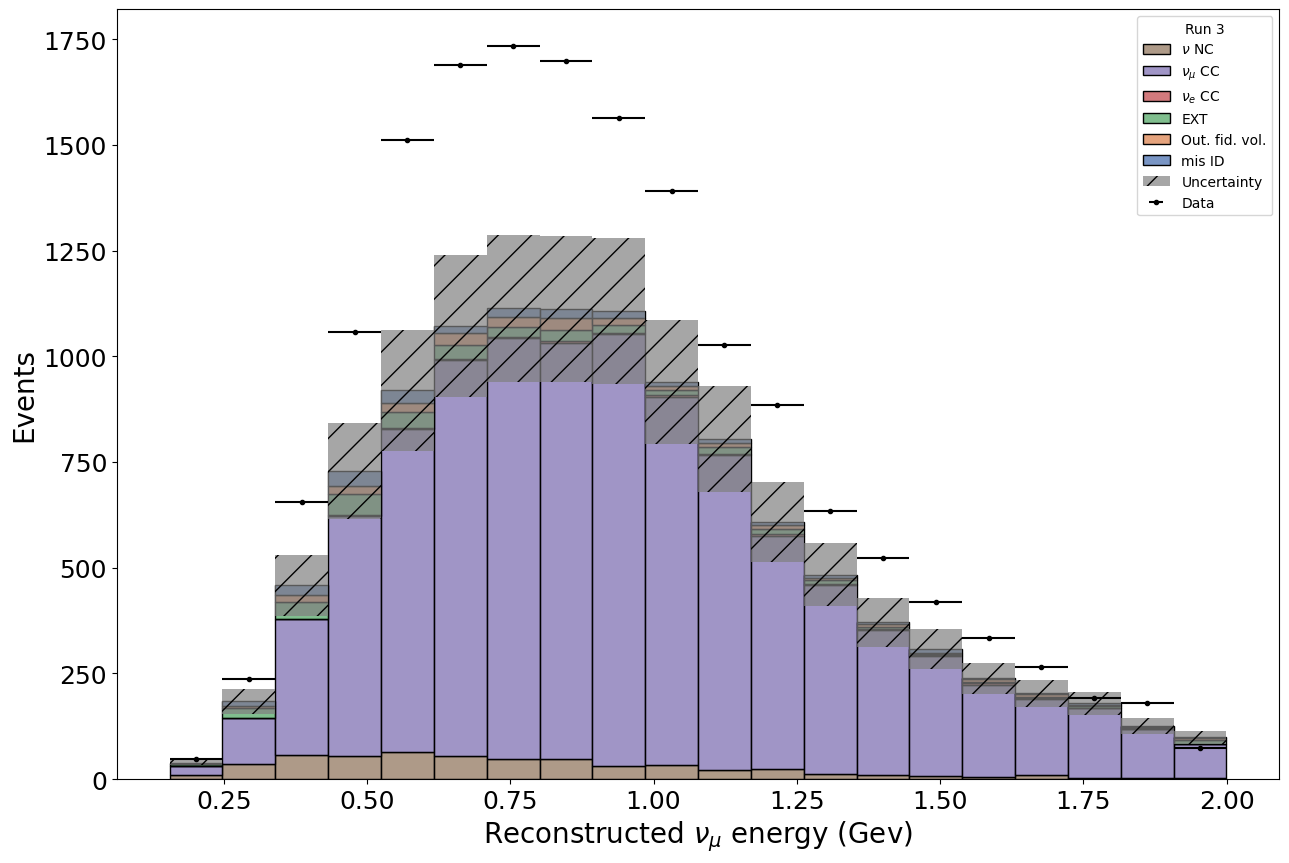

In [50]:
# Selection cuts on oscillated data. The dataset does not have oscillated data
oscillated_data_file = './true_data/oscillated_data.pkl'
oscillated_data = pd.read_pickle(oscillated_data_file)

oscillated_cuts = Selections(oscillated_data)[0]

oscillated_hist = histogram_plot(oscillated_cuts, 'trk_energy_tot', 20, 'saved_figure_name', oscillated_cuts['weight'],xlims=[np.min(oscillated_cuts['trk_energy_tot']), np.max(oscillated_cuts['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame, Stat_func=poisson_error)

In [51]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)
def oscillate_and_chi(delta,theta,L,E,oscillated_data):
    disappearance = 1 - oscillation_probability(theta,delta,L,E)
    #print(oscillation_probability(delta,theta,L,E))
    disappearance_hist = np.histogram(MC_EXT_cuts['trk_energy_tot'], bins=30, density=False, weights=disappearance*MC_EXT_cuts['weight'])
    
    oscillation_hist = np.histogram(oscillated_data['trk_energy_tot'], bins=30, density=False, weights=oscillated_data['weight'])

    # UNC is the uncertainty of the histogram bins. 15% Uncertinanty
    UNC = 0.15*np.array(disappearance_hist[0])
    #np.sqrt((0.15**2)+(poisson_error(disappearance_hist[0])**2))*np.array(disappearance_hist[0])
    #print(disappearance_hist[0])
    #print(oscillation_hist[0])

    return chi_squared(disappearance_hist[0],oscillation_hist[0],UNC)

print(oscillate_and_chi(11.111, 0.6, MC_EXT_cuts['true_L'], MC_EXT_cuts['true_E'], oscillated_cuts))

#print(chi_squared(disappearance_energy_hist[0],oscillated_hist[0],disappearance_energy_hist[2]))

2.456195216409412


In [77]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)
def mesh(deltamin, deltamax, thetamin, thetamax, L,E,oscillated_data):
    delta_values = np.linspace(deltamin,deltamax,100)
    theta_values = np.linspace(thetamin,thetamax,100)
    chi_values = np.zeros((100,100))
    for delta in range(100):
        for theta in range(100):
            #print(oscillate_and_chi(delta_values[delta],theta_values[theta],L,E))
            chi_values[theta,delta] = oscillate_and_chi(delta_values[delta],theta_values[theta],L,E,oscillated_data)

    return chi_values

def contour_plot(deltamin, deltamax, thetamin, thetamax, chi_values):
    plt.figure(figsize=(8, 6))
    #ax2.set_title(r'A contour plot of $\chi^2$ values for varying $\lambda_{79Rb}$ and $\lambda_{79Sr}$')
    plt.xlabel(r'sin$^2 2\theta$')
    plt.ylabel(r'$\Delta$m$_{21}^2$')

    min_chi = np.min(chi_values)
    levels1 = np.linspace(0,10,20) + min_chi
    levels2 = [min_chi+2.30, min_chi+4.605, min_chi+5.991, min_chi+9.210]
    
    XMESH, YMESH = np.meshgrid(np.linspace(thetamin,thetamax,100), np.linspace(deltamin,deltamax,100), copy=True, sparse=False, indexing='ij')
    contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels1, cmap='jet')
    plt.colorbar()
    confidence_lines = plt.contour(XMESH, YMESH, chi_values, levels2)
    plt.clabel(confidence_lines, confidence_lines.levels[:1], fmt=r'$\chi^2_{min}$ + 2.300')
    plt.clabel(confidence_lines, confidence_lines.levels[1:2], fmt=r'$\chi^2_{min}$ + 4.605')
    plt.clabel(confidence_lines, confidence_lines.levels[2:3], fmt=r'$\chi^2_{min}$ + 5.991')
    plt.clabel(confidence_lines, confidence_lines.levels[3:4], fmt=r'$\chi^2_{min}$ + 9.210')
    #plt.xscale('log')
    #plt.yscale('log')

    minx, miny = np.where(chi_values == np.min(chi_values))
    print(np.linspace(thetamin,thetamax,100)[minx], np.linspace(deltamin,deltamax,100)[miny])
    #plt.plot(np.linspace(thetamin,thetamax,100)[minx], np.linspace(deltamin,deltamax,100)[miny], 'ro')
    plt.plot(0.55555556,11.12626263, 'ro')
    plt.title("Closure Test for Manual Cut")

    plt.show()

[0.55454545] [11.12626263]


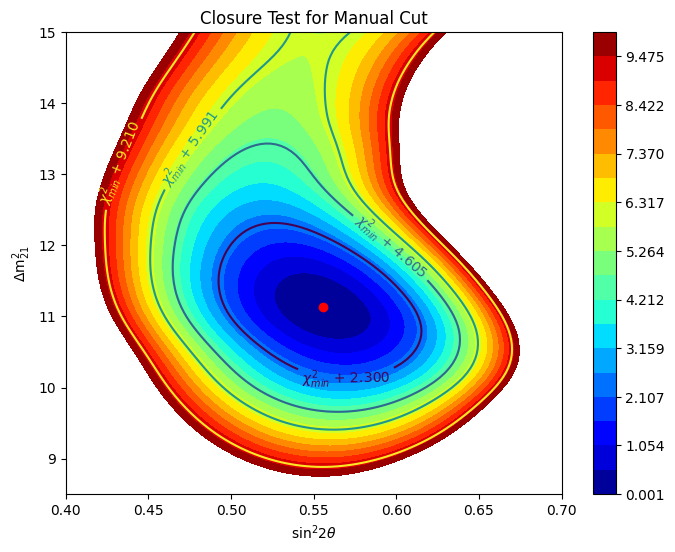

In [78]:
deltamin = 8.5
deltamax = 15
thetamin = 0.4
thetamax = 0.7

#del chi_values

#0.47km is length of neutrino travel

chi_values = mesh(deltamin, deltamax, thetamin, thetamax, 0.47, MC_EXT_cuts['true_E'], oscillated_cuts)
#print(chi_values)

#recommended values to use 10, 15, 0.5, 0.6

contour_plot(deltamin, deltamax, thetamin, thetamax, chi_values)

In [74]:
def mesh_data(deltamin, deltamax, thetamin, thetamax, L,E,oscillated_data):
    delta_values = np.linspace(deltamin,deltamax,50)
    theta_values = np.linspace(thetamin,thetamax,50)
    chi_values = np.zeros((50,50))
    for delta in range(50):
        for theta in range(50):
            #print(oscillate_and_chi(delta_values[delta],theta_values[theta],L,E))
            chi_values[theta,delta] = oscillate_and_chi_data(delta_values[delta],theta_values[theta],L,E,oscillated_data)

    return chi_values

def oscillate_and_chi_data(delta,theta,L,E,oscillated_data):
    disappearance = 1 - oscillation_probability(theta,delta,L,E)
    #print(oscillation_probability(delta,theta,L,E))
    disappearance_hist = np.histogram(MC_EXT_cuts['trk_energy_tot'], bins=30, density=False, weights=disappearance*MC_EXT_cuts['weight'])
    
    oscillation_hist = np.histogram(oscillated_data['trk_energy_tot'], bins=30, density=False)

    # UNC is the uncertainty of the histogram bins. 15% Uncertinanty
    UNC = 0.15*np.array(disappearance_hist[0])
    #np.sqrt((0.15**2)+(poisson_error(disappearance_hist[0])**2))*np.array(disappearance_hist[0])
    #print(disappearance_hist[0])
    #print(oscillation_hist[0])

    return chi_squared(disappearance_hist[0],oscillation_hist[0],UNC)

def contour_plot_data(deltamin, deltamax, thetamin, thetamax, chi_values):
    plt.figure(figsize=(8, 6))
    #ax2.set_title(r'A contour plot of $\chi^2$ values for varying $\lambda_{79Rb}$ and $\lambda_{79Sr}$')
    plt.xlabel('sin^2 2theta')
    plt.ylabel('delta')

    min_chi = np.min(chi_values)
    #levels1 = np.linspace(0,5,20) + min_chi
    levels2 = [min_chi+4.605, min_chi+5.991, min_chi+9.210]
    
    XMESH, YMESH = np.meshgrid(np.linspace(thetamin,thetamax,50), np.linspace(deltamin,deltamax,50), copy=True, sparse=False, indexing='ij')
    contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels=20, cmap='jet')
    plt.colorbar()
    confidence_lines = plt.contour(XMESH, YMESH, chi_values, levels2)
    plt.clabel(confidence_lines, confidence_lines.levels[:1], fmt=r'$\chi^2_{min}$ + 4.605')
    plt.clabel(confidence_lines, confidence_lines.levels[1:2], fmt=r'$\chi^2_{min}$ + 5.991')
    plt.clabel(confidence_lines, confidence_lines.levels[2:3], fmt=r'$\chi^2_{min}$ + 9.210')
    plt.xscale('log')
    plt.yscale('log')

    minx, miny = np.where(chi_values == np.min(chi_values))
    print(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny])
    #plt.plot(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny], 'ro')

    plt.show()

[0.001] [4.09122449]


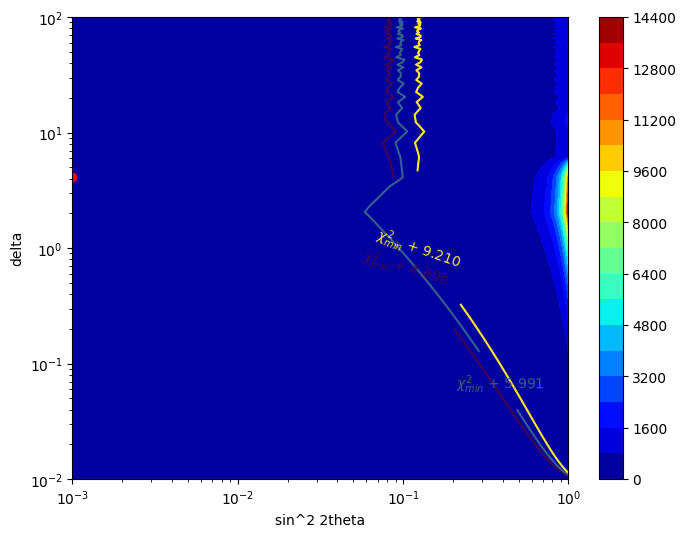

In [92]:
deltamin = 0.01
deltamax = 100
thetamin = 0.001
thetamax = 1

#del chi_values

#0.47km is length of neutrino travel

chi_values_data = mesh_data(deltamin, deltamax, thetamin, thetamax, 0.47, MC_EXT_cuts['true_E'], data_frame)
#print(chi_values)

#recommended values to use 10, 15, 0.5, 0.6

contour_plot_data(deltamin, deltamax, thetamin, thetamax, chi_values_data)

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [ ]:
# contour application, with correct confidence levels.

In [ ]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [93]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

theta_ue = ((5-np.sqrt(19))/5)*(1-np.sqrt(1-np.linspace(thetamin,thetamax,50)))

# Compare your result with MiniBooNE



In [94]:
def contour_plot_mini(deltamin, deltamax, theta_ue, chi_values):
    plt.figure(figsize=(8, 6))
    #ax2.set_title(r'A contour plot of $\chi^2$ values for varying $\lambda_{79Rb}$ and $\lambda_{79Sr}$')
    plt.xlabel('sin^2 2theta_ue')
    plt.ylabel('delta')

    min_chi = np.min(chi_values)
    #levels1 = np.linspace(0,5,20) + min_chi
    levels2 = [min_chi+1, min_chi+2.3, min_chi+5.99]
    
    XMESH, YMESH = np.meshgrid(theta_ue, np.linspace(deltamin,deltamax,50), copy=True, sparse=False, indexing='ij')
    contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels=20, cmap='jet')
    plt.colorbar()
    confidence_lines = plt.contour(XMESH, YMESH, chi_values, levels2)
    plt.clabel(confidence_lines, confidence_lines.levels[:1], fmt=r'$\chi^2_{min}$ + 1')
    plt.clabel(confidence_lines, confidence_lines.levels[1:2], fmt=r'$\chi^2_{min}$ + 2.3')
    plt.clabel(confidence_lines, confidence_lines.levels[2:3], fmt=r'$\chi^2_{min}$ + 5.99')
    plt.xscale('log')
    plt.yscale('log')

    minx, miny = np.where(chi_values == np.min(chi_values))
    print(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny])
    plt.plot(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny], 'ro')

    plt.show()

Results are extracted from MiniBooNE (orange) and LSND (blue)

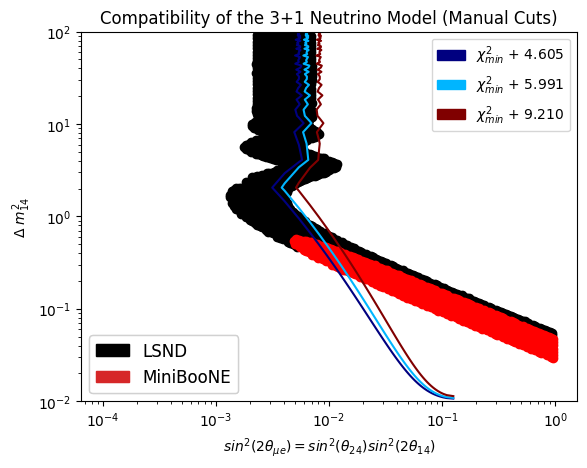

In [97]:
# Load data
LSND_data = pd.read_csv('./true_data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./true_data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'ko')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'ro')

min_chi = np.min(chi_values_data)
#levels1 = np.linspace(0,5,20) + min_chi
levels2 = [min_chi+4.605, min_chi+5.991, min_chi+9.210]
    
XMESH, YMESH = np.meshgrid(theta_ue, np.linspace(deltamin,deltamax,50), copy=True, sparse=False, indexing='ij')
#contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels=20, cmap='jet')
#plt.colorbar()
confidence_lines = plt.contour(XMESH, YMESH, chi_values_data, levels2, cmap="jet")
#plt.clabel(confidence_lines, confidence_lines.levels[:1], inline=1, fmt=r'$\chi^2_{min}$ + 1')
#plt.clabel(confidence_lines, confidence_lines.levels[1:2], inline=1, fmt=r'$\chi^2_{min}$ + 2.3')
#plt.clabel(confidence_lines, confidence_lines.levels[2:3], inline=1, fmt=r'$\chi^2_{min}$ + 5.99')
#plt.xscale('log')
#plt.yscale('log')

legend_labels = [r'$\chi^2_{min}$ + 4.605', r'$\chi^2_{min}$ + 5.991', r'$\chi^2_{min}$ + 9.210']
legend_handles = []
for i, level in enumerate(levels2):
    legend_handles.append(mpatches.Patch(color=confidence_lines.collections[i].get_edgecolor(), label=legend_labels[i]))
legend = plt.legend(handles=legend_handles, loc='upper right')

minx, miny = np.where(chi_values_data == np.min(chi_values_data))
#print(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny])
#plt.plot(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny], 'ro')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='black', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:red', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)
plt.gca().add_artist(legend)

plt.title("Compatibility of the 3+1 Neutrino Model (Manual Cuts)")
plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$')
plt.ylabel(r'$\Delta$ $m_{14}^2$')
plt.xticks()
plt.yticks()
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
def replace_values(array):
    replacements = {4: 0, 5: 0, 7: 0, 10: 0, 21: 1, 31: 0}
    return [replacements.get(num, num) for num in array]

In [ ]:
y_train = replace_values(y_train)
y_test = replace_values(y_test)

boosted_model = XGBClassifier(booster="dart", learning_rate=0.1)
boosted_model.fit(x_train._get_numeric_data(),y_train)

y_pred = boosted_model.predict(x_train._get_numeric_data())
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = boosted_model.predict(x_test._get_numeric_data(), iteration_range=(0, 100))
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 1.0
Accuracy on testing dataset: 1.0


In [ ]:
MC_EXT_BOOST = MC_EXT.copy(deep=True)

for feature in features:
    MC_EXT_BOOST[feature] = MC_EXT_BOOST[feature].astype(float)

trk_energy_tot = MC_EXT_BOOST['trk_energy_tot']
trk_energy_tot_selection = (trk_energy_tot < 2)
MC_EXT_BOOST = MC_EXT_BOOST[trk_energy_tot_selection]
#MC_EXT_BOOST = MC_EXT_BOOST.drop(MC_EXT_BOOST[MC_EXT_BOOST.category == 10].index, inplace = False)
#MC_EXT_BOOST.reset_index(drop=True, inplace=True)
#MC_EXT_BOOST = MC_EXT_BOOST.drop(MC_EXT_BOOST[MC_EXT_BOOST.category == 31].index, inplace = False)
#MC_EXT_BOOST.reset_index(drop=True, inplace=True)
x_boost = MC_EXT_BOOST[features]
y_boost = np.array(MC_EXT_BOOST['category'])

y_boost = replace_values(y_boost)

x_boost_train, x_boost_test, y_boost_train, y_boost_test = train_test_split(x_boost, y_boost, train_size=0.8, random_state=1) # 80/20 training/test split

In [ ]:
boosted_model = XGBClassifier(booster="dart", learning_rate=0.1)
boosted_model.fit(x_boost_train,y_boost_train)

y_boost_pred = boosted_model.predict(x_boost_train)
print("Accuracy on training dataset:",metrics.accuracy_score(y_boost_train, y_boost_pred))
rf_acc_train = metrics.accuracy_score(y_boost_train, y_boost_pred)
y_boost_pred = boosted_model.predict(x_boost_test, iteration_range=(0, 100))
print("Accuracy on testing dataset:",metrics.accuracy_score(y_boost_test, y_boost_pred))
rf_acc_test = metrics.accuracy_score(y_boost_test, y_boost_pred)

Accuracy on training dataset: 0.844124887317107
Accuracy on testing dataset: 0.8263356793676109


In [ ]:
def boosted_selections(frame,y_pred):

    total_events = len(frame.index)
    muon_total_events = len(frame[frame['category']==21].index)

    frame = frame.iloc[np.where(y_pred==1)]
    final_events = len(frame.index)
    muon_final_events = len(frame[frame['category']==21].index)

    events = [total_events, final_events]
    muon_events = [muon_total_events, muon_final_events]

    return frame, events, muon_events

In [ ]:
ypred = boosted_model.predict(x_boost)

print(len(np.where(ypred==1)))

1


In [ ]:
##frame = MC_EXT_BOOST

##print(len(frame.index))
##total_events = len(frame.index)
##muon_total_events = len(frame[frame['category']==21].index)

##frame = frame.iloc[np.where(ypred==1)]
##final_events = len(frame.index)
##muon_final_events = len(frame[frame['category']==21].index)

##events = [total_events, final_events]
##muon_events = [muon_total_events, muon_final_events]

In [ ]:
boosted_selections = boosted_selections(MC_EXT_BOOST, ypred)

events = np.array(boosted_selections[1])
print(events)
muon_events = np.array(boosted_selections[2])
efficiency = events/events[0]
purity = muon_events/events
print(efficiency)
print(purity)

MC_EXT_XGB_CUTS = boosted_selections[0]

[144211 114030]
[1.         0.79071638]
[0.72869615 0.85996668]


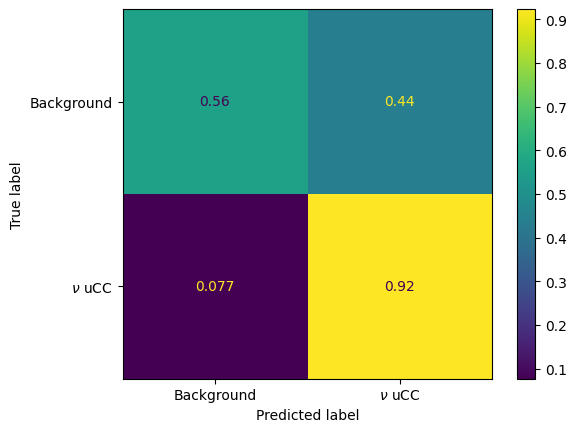

In [ ]:
# For labelling your confusion matrix
ptype = [r"Background", r"$\nu$ uCC"]

# plot your confusion matrix
cmxgb = confusion_matrix( y_boost_test, y_boost_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=ptype)
disp.plot()
plt.show()

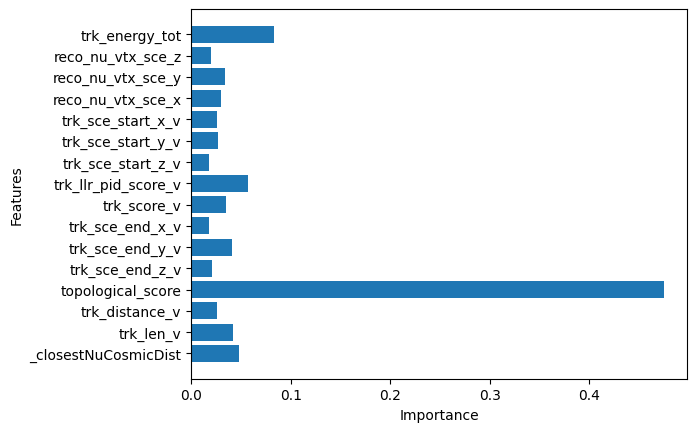

In [ ]:
# Plot importance
importance_xgb = boosted_model.feature_importances_

plt.barh(range(16), importance_xgb)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
data = pd.read_pickle(data_file)
data = data.drop('Subevent', axis = 1)

for feature in features:
    data[feature] = data[feature].astype(float)

trk_energy_tot = data['trk_energy_tot']
trk_energy_tot_selection = (trk_energy_tot < 2)
data = data[trk_energy_tot_selection]

data_x_boost = data[features]
data_ypred = boosted_model.predict(data_x_boost)
boosted_data_frame = boosted_selections(data, data_ypred)[0]

print(len(data),len(boosted_data_frame))

28808 22001


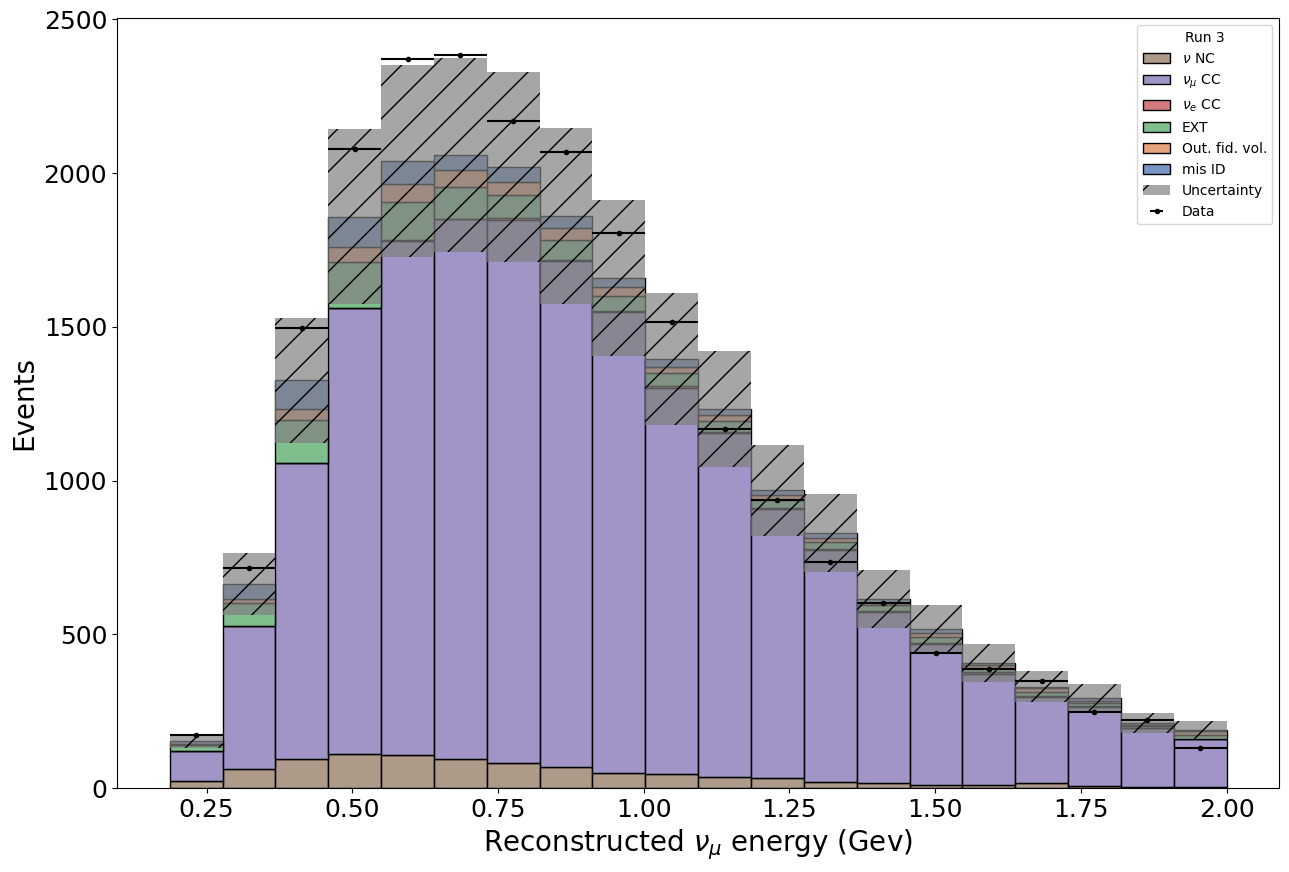

In [ ]:
energy_hist_boosted = Neutrino_functions.histogram_plot(MC_EXT_XGB_CUTS, 'trk_energy_tot', 20, 'saved_figure_name', MC_EXT_XGB_CUTS['weight'],xlims=[np.min(MC_EXT_XGB_CUTS['trk_energy_tot']), np.max(MC_EXT_XGB_CUTS['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = boosted_data_frame, Stat_func=poisson_error)

In [ ]:
oscillated_data_file = './true_data/oscillated_data.pkl'
oscillated_data = pd.read_pickle(oscillated_data_file)

for feature in features:
    oscillated_data[feature] = oscillated_data[feature].astype(float)

trk_energy_tot = oscillated_data['trk_energy_tot']
trk_energy_tot_selection = (trk_energy_tot < 2)
oscillated_data = oscillated_data[trk_energy_tot_selection]

oscillated_data_x_boost = oscillated_data[features]
oscillated_data_ypred = boosted_model.predict(oscillated_data_x_boost)
boosted_oscillated_data_frame = boosted_selections(oscillated_data, oscillated_data_ypred)[0]

print(len(oscillated_data),len(boosted_oscillated_data_frame))

144211 114030


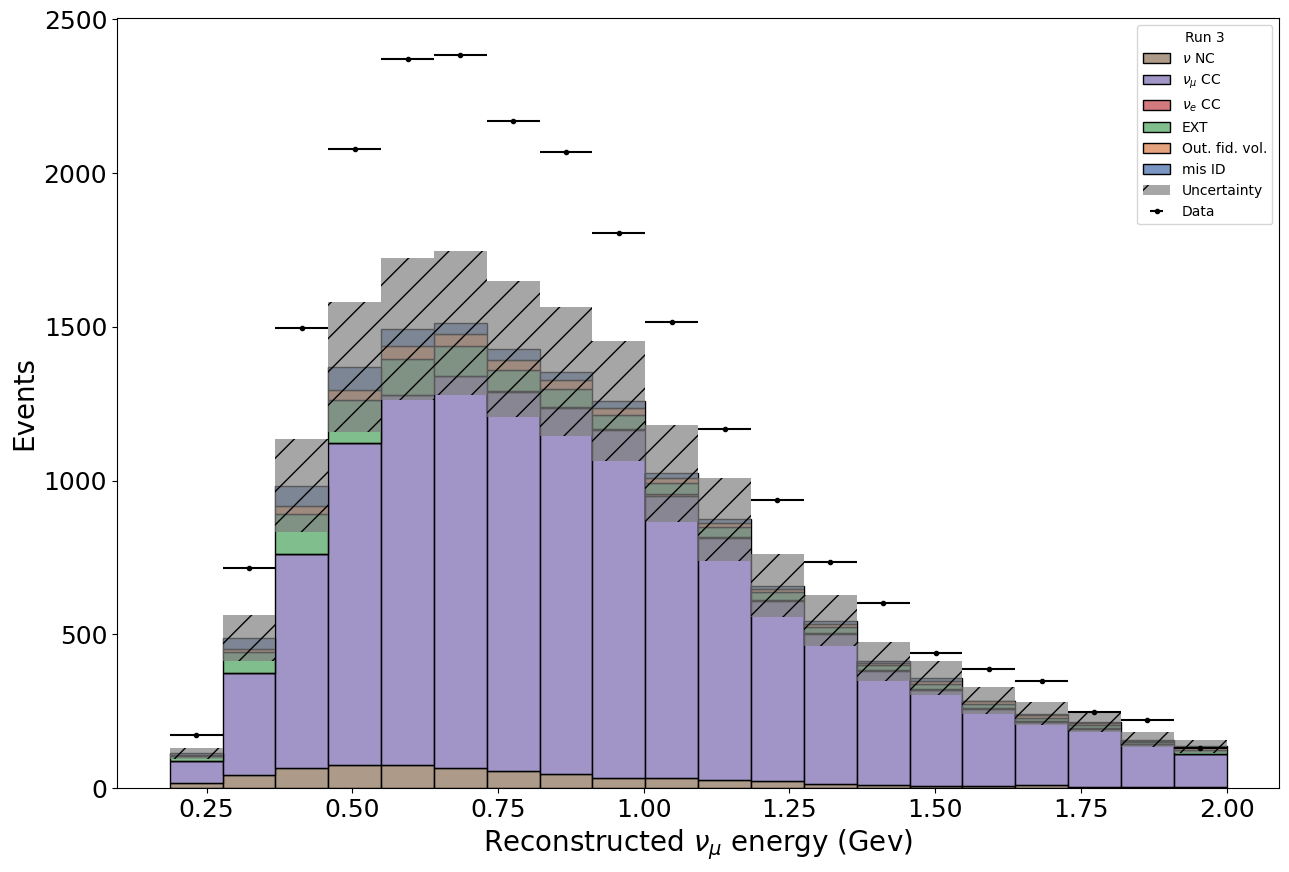

In [ ]:
boosted_oscillated_hist = Neutrino_functions.histogram_plot(boosted_oscillated_data_frame, 'trk_energy_tot', 20, 'saved_figure_name', boosted_oscillated_data_frame['weight'],xlims=[np.min(boosted_oscillated_data_frame['trk_energy_tot']), np.max(boosted_oscillated_data_frame['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = boosted_data_frame, Stat_func=poisson_error)

In [ ]:
def oscillate_and_chi_xgb(delta,theta,L,E,oscillated_data):
    disappearance = 1 - oscillation_probability(theta,delta,L,E)
    disappearance_hist = np.histogram(MC_EXT_XGB_CUTS['trk_energy_tot'], bins=30, density=False, weights=disappearance*MC_EXT_XGB_CUTS['weight'])
    
    oscillation_hist = np.histogram(oscillated_data['trk_energy_tot'], bins=30, density=False, weights=oscillated_data['weight'])

    # UNC is the uncertainty of the histogram bins. 15% Uncertinanty
    UNC = 0.15*np.array(disappearance_hist[0])

    return chi_squared(disappearance_hist[0],oscillation_hist[0],UNC)

# Function that loops the above function across range of values of delM21 and sin^2(2theta)
def mesh_xgb(deltamin, deltamax, thetamin, thetamax, L,E,oscillated_data):
    delta_values = np.linspace(deltamin,deltamax,100)
    theta_values = np.linspace(thetamin,thetamax,100)
    chi_values = np.zeros((100,100))
    for delta in range(100):
        for theta in range(100):
            #print(oscillate_and_chi(delta_values[delta],theta_values[theta],L,E))
            chi_values[theta,delta] = oscillate_and_chi_xgb(delta_values[delta],theta_values[theta],L,E,oscillated_data)

    return chi_values

def contour_plot_xgb(deltamin, deltamax, thetamin, thetamax, chi_values):
    plt.figure(figsize=(8, 6))
    #ax2.set_title(r'A contour plot of $\chi^2$ values for varying $\lambda_{79Rb}$ and $\lambda_{79Sr}$')
    plt.xlabel('sin^2 2theta')
    plt.ylabel('delta')

    min_chi = np.min(chi_values)
    levels1 = np.linspace(0,5,20) + min_chi
    levels2 = [min_chi+1, min_chi+2.3, min_chi+5.99]
    
    XMESH, YMESH = np.meshgrid(np.linspace(thetamin,thetamax,100), np.linspace(deltamin,deltamax,100), copy=True, sparse=False, indexing='ij')
    contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels1, cmap='jet')
    plt.colorbar()
    confidence_lines = plt.contour(XMESH, YMESH, chi_values, levels2)
    plt.clabel(confidence_lines, confidence_lines.levels[:1], fmt=r'$\chi^2_{min}$ + 1')
    plt.clabel(confidence_lines, confidence_lines.levels[1:2], fmt=r'$\chi^2_{min}$ + 2.3')
    plt.clabel(confidence_lines, confidence_lines.levels[2:3], fmt=r'$\chi^2_{min}$ + 5.99')
    #plt.xscale('log')
    #plt.yscale('log')

    minx, miny = np.where(chi_values == np.min(chi_values))
    print(np.linspace(thetamin,thetamax,100)[minx], np.linspace(deltamin,deltamax,100)[miny])
    plt.plot(np.linspace(thetamin,thetamax,100)[minx], np.linspace(deltamin,deltamax,100)[miny], 'ro')

    plt.show()

[0.55555556] [11.12626263]


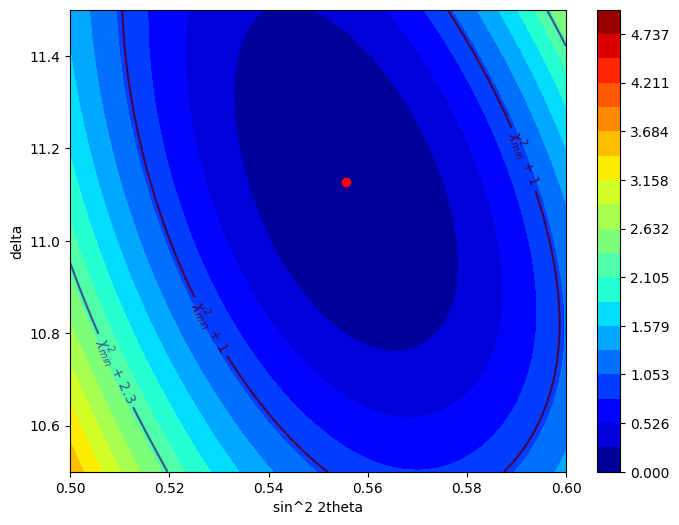

In [ ]:
deltamin = 10.5
deltamax = 11.5
thetamin = 0.5
thetamax = 0.6

#del chi_values

#0.47km is length of neutrino travel

chi_values_xgb = mesh_xgb(deltamin, deltamax, thetamin, thetamax, 0.47, MC_EXT_XGB_CUTS['true_E'], boosted_oscillated_data_frame)
#print(chi_values)

#recommended values to use 10, 15, 0.5, 0.6

contour_plot_xgb(deltamin, deltamax, thetamin, thetamax, chi_values_xgb)

In [ ]:
def mesh_data_xgb(deltamin, deltamax, thetamin, thetamax, L,E,oscillated_data):
    delta_values = np.linspace(deltamin,deltamax,50)
    theta_values = np.linspace(thetamin,thetamax,50)
    chi_values = np.zeros((50,50))
    for delta in range(50):
        for theta in range(50):
            #print(oscillate_and_chi(delta_values[delta],theta_values[theta],L,E))
            chi_values[theta,delta] = oscillate_and_chi_data_xgb(delta_values[delta],theta_values[theta],L,E,oscillated_data)

    return chi_values

def oscillate_and_chi_data_xgb(delta,theta,L,E,oscillated_data):
    disappearance = 1 - oscillation_probability(theta,delta,L,E)
    #print(oscillation_probability(delta,theta,L,E))
    disappearance_hist = np.histogram(MC_EXT_XGB_CUTS['trk_energy_tot'], bins=30, density=False, weights=disappearance*MC_EXT_XGB_CUTS['weight'])
    
    oscillation_hist = np.histogram(oscillated_data['trk_energy_tot'], bins=30, density=False)

    # UNC is the uncertainty of the histogram bins. 15% Uncertinanty
    UNC = 0.15*np.array(disappearance_hist[0])
    #np.sqrt((0.15**2)+(poisson_error(disappearance_hist[0])**2))*np.array(disappearance_hist[0])
    #print(disappearance_hist[0])
    #print(oscillation_hist[0])

    return chi_squared(disappearance_hist[0],oscillation_hist[0],UNC)

def contour_plot_data_xgb(deltamin, deltamax, thetamin, thetamax, chi_values):
    plt.figure(figsize=(8, 6))
    #ax2.set_title(r'A contour plot of $\chi^2$ values for varying $\lambda_{79Rb}$ and $\lambda_{79Sr}$')
    plt.xlabel('sin^2 2theta')
    plt.ylabel('delta')

    min_chi = np.min(chi_values)
    #levels1 = np.linspace(0,5,20) + min_chi
    levels2 = [min_chi+1, min_chi+2.3, min_chi+5.99]
    
    XMESH, YMESH = np.meshgrid(np.linspace(thetamin,thetamax,50), np.linspace(deltamin,deltamax,50), copy=True, sparse=False, indexing='ij')
    contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels=20, cmap='jet')
    plt.colorbar()
    confidence_lines = plt.contour(XMESH, YMESH, chi_values, levels2)
    plt.clabel(confidence_lines, confidence_lines.levels[:1], fmt=r'$\chi^2_{min}$ + 1')
    plt.clabel(confidence_lines, confidence_lines.levels[1:2], fmt=r'$\chi^2_{min}$ + 2.3')
    plt.clabel(confidence_lines, confidence_lines.levels[2:3], fmt=r'$\chi^2_{min}$ + 5.99')
    plt.xscale('log')
    plt.yscale('log')

    minx, miny = np.where(chi_values == np.min(chi_values))
    print(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny])
    plt.plot(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny], 'ro')

    plt.show()

[0.001] [0.01]


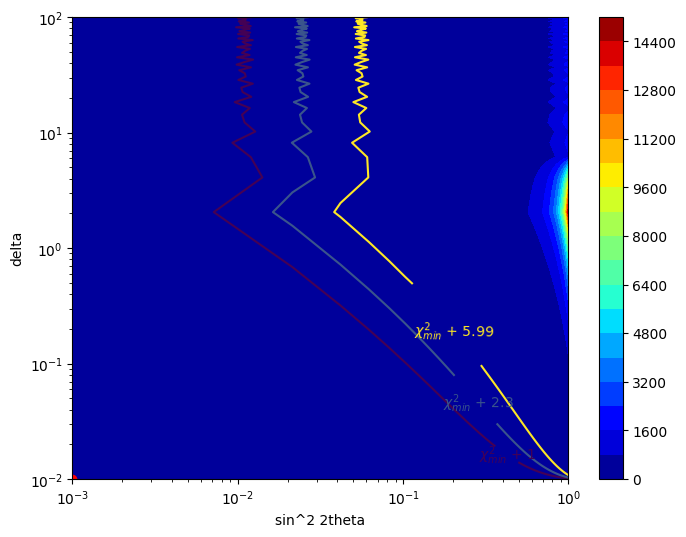

In [ ]:
deltamin = 0.01
deltamax = 100
thetamin = 0.001
thetamax = 1

#del chi_values

#0.47km is length of neutrino travel

chi_values_data_xgb = mesh_data_xgb(deltamin, deltamax, thetamin, thetamax, 0.47, MC_EXT_XGB_CUTS['true_E'], boosted_data_frame)
#print(chi_values)

#recommended values to use 10, 15, 0.5, 0.6

contour_plot_data_xgb(deltamin, deltamax, thetamin, thetamax, chi_values_data_xgb)

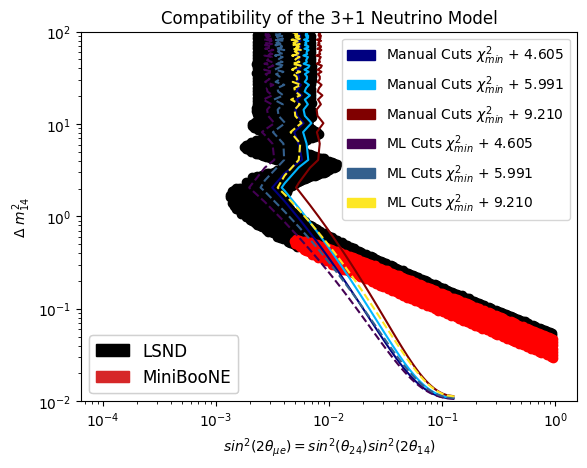

In [ ]:
# Load data
LSND_data = pd.read_csv('./true_data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./true_data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'ko')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'ro')

min_chi = np.min(chi_values_data)
min_chi_boost = np.min(chi_values_data_xgb)
#levels1 = np.linspace(0,5,20) + min_chi
levels2 = [min_chi+4.605, min_chi+5.991, min_chi+9.210]
levels3 = [min_chi_boost+4.605, min_chi_boost+5.991, min_chi_boost+9.210]
    
XMESH, YMESH = np.meshgrid(theta_ue, np.linspace(deltamin,deltamax,50), copy=True, sparse=False, indexing='ij')
#contour_plot = plt.contourf(XMESH, YMESH, chi_values, levels=20, cmap='jet')
#plt.colorbar()
confidence_lines = plt.contour(XMESH, YMESH, chi_values_data, levels2, cmap="jet")
confidence_lines2 = plt.contour(XMESH, YMESH, chi_values_data_xgb, levels3, cmap="viridis", linestyles="dashed")
#plt.clabel(confidence_lines, confidence_lines.levels[:1], inline=1, fmt=r'$\chi^2_{min}$ + 1')
#plt.clabel(confidence_lines, confidence_lines.levels[1:2], inline=1, fmt=r'$\chi^2_{min}$ + 2.3')
#plt.clabel(confidence_lines, confidence_lines.levels[2:3], inline=1, fmt=r'$\chi^2_{min}$ + 5.99')
#plt.xscale('log')
#plt.yscale('log')

legend_labels = [r'Manual Cuts $\chi^2_{min}$ + 4.605', r'Manual Cuts $\chi^2_{min}$ + 5.991', r'Manual Cuts $\chi^2_{min}$ + 9.210']
legend_handles = []
for i, level in enumerate(levels2):
    legend_handles.append(mpatches.Patch(color=confidence_lines.collections[i].get_edgecolor(), label=legend_labels[i]))
legend_labels2 = [r'ML Cuts $\chi^2_{min}$ + 4.605', r'ML Cuts $\chi^2_{min}$ + 5.991', r'ML Cuts $\chi^2_{min}$ + 9.210']
for i, level in enumerate(levels3):
    legend_handles.append(mpatches.Patch(color=confidence_lines2.collections[i].get_edgecolor(), label=legend_labels2[i]))
legend = plt.legend(handles=legend_handles, loc='upper right')

minx, miny = np.where(chi_values_data == np.min(chi_values_data))
#print(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny])
#plt.plot(np.linspace(thetamin,thetamax,50)[minx], np.linspace(deltamin,deltamax,50)[miny], 'ro')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='black', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:red', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)
plt.gca().add_artist(legend)

plt.title("Compatibility of the 3+1 Neutrino Model")
plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$')
plt.ylabel(r'$\Delta$ $m_{14}^2$')
plt.xticks()
plt.yticks()
plt.yscale('log')
plt.xscale('log')
plt.show()